In [1]:
import sys
import scipy.stats
from scipy.signal import coherence
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from trajectory_process import traj_process

import numpy as np
from scipy.cluster import hierarchy
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook
import glob
import re  # Regular expression operations
import pandas as pd
from scipy import signal
import mne
from tqdm import tqdm
import os
from os.path import exists
import pickle
import statsmodels.stats.api as sms

sys.path.append('D:\ephys')

import utils
import ephys
import plotting

plt.rcParams["axes.labelsize"] = 12
plt.rcParams["font.size"] = 7
plt.rcParams["font.family"] = "Arial"

mBWfus009 = {
    'arena_0219': '2021-02-19_mBWfus009_arena_ephys',
    'ezm_0219': '2021-02-19_mBWfus009_EZM_ephys',
    'oft_0219': '2021-02-19_mBWfus009_OF_ephys',

    'arena_0226': '2021-02-26_mBWfus009_arena_ephys',
    'ezm_0226': '2021-02-26_mBWfus009_EZM_ephys',
    'oft_0226': '2021-02-26_mBWfus009_OF_ephys',

    'arena_0305_bef': '2021-03-05_mBWfus009_before_arena_ephys',
    'cage_0305': '2021-03-05_mBWfus009_cage_arena_ephys',
    'arena_0305_aft': '2021-03-05_mBWfus009_after_arena_ephys',
    'ezm_0305': '2021-03-05_mBWfus009_EZM_ephys',
    'oft_0305': '2021-03-05_mBWfus009_OF_ephys',

    'arena_0325': '2021-03-25_mBWfus009_arena_ephys',
    'epm_0325': '2021-03-25_mBWfus009_EPM_ephys'
}

mBWfus008 = {
    'arena_0219': '2021-02-19_mBWfus008_arena_ephys',
    'ezm_0219': '2021-02-19_mBWfus008_EZM_ephys',
    'oft_0219': '2021-02-19_mBWfus008_OF_ephys',

    'arena_0226': '2021-02-26_mBWfus008_arena_ephys',
    'ezm_0226': '2021-02-26_mBWfus008_EZM_ephys',
    'oft_0226': '2021-02-26_mBWfus008_OF_ephys',

    'arena_0305_bef': '2021-03-05_mBWfus008_before_arena_ephys',
    'cage_0305': '2021-03-05_mBWfus008_cage_arena_ephys',
    'arena_0305_aft': '2021-03-05_mBWfus008_after_arena_ephys',
    'ezm_0305': '2021-03-05_mBWfus008_EZM_ephys',
    'oft_0305': '2021-03-05_mBWfus008_OF_ephys',
}

mBWfus010 = {
    'arena_0219': '2021-02-19_mBWfus010_arena_ephys',
    'ezm_0219': '2021-02-19_mBWfus010_EZM_ephys',
    'oft_0219': '2021-02-19_mBWfus010_OF_ephys',

    'arena_0301_aft': '2021-03-01_mBWfus010_arena_ephys_after',
    'arena_0301_bef': '2021-03-01_mBWfus010_arena_ephys_before',
    'cage_0301': '2021-03-01_mBWfus010_cage_ephys',
    'oft_0301': '2021-03-01_mBWfus010_OF_ephys',
    'ezm_0301': '2021-03-01_mBWfus010_EZM_ephys',

    'arena_0307_bef': '2021-03-07_mBWfus010_after_arena_ephys',
    'cage_0307': '2021-03-07_mBWfus010_cage_arena_ephys',
    'arena_0307_aft': '2021-03-07_mBWfus010_after_arena_ephys',
    'ezm_0307': '2021-03-07_mBWfus010_EZM_ephys',
    'oft_0307': '2021-03-07_mBWfus010_OF_ephys',
}

mBWfus011 = {
    'arena_0226': '2021-02-26_mBWfus011_arena_ephys',
    'ezm_0226': '2021-02-26_mBWfus011_EZM_ephys',
    'oft_0226': '2021-02-26_mBWfus011_OF_ephys',

    'arena_0305_aft': '2021-03-05_mBWfus011_after_arena_ephys',
    'cage_0305': '2021-03-05_mBWfus011_cage_arena_ephys',
    'arena_0305_bef': '2021-03-05_mBWfus011_before_arena_ephys',
    'oft_0305': '2021-03-05_mBWfus011_OF_ephys',
    'ezm_0305': '2021-03-05_mBWfus011_EZM_ephys',

    'arena_0313_bef': '2021-03-13_mBWfus011_before_arena_ephys',
    'cage_0313': '2021-03-13_mBWfus011_cage_arena_ephys',
    'arena_0313_aft': '2021-03-13_mBWfus011_after_arena_ephys',
    'ezm_0313': '2021-03-13_mBWfus011_EZM_ephys',
    'oft_0313': '2021-03-13_mBWfus011_OF_ephys',
}

mBWfus012 = {
    'arena_0226': '2021-02-26_mBWfus012_arena_ephys',
    'ezm_0226': '2021-02-26_mBWfus012_EZM_ephys',
    'oft_0226': '2021-02-26_mBWfus012_OF_ephys',
}

In [2]:
np.random.seed(42)
animal = mBWfus009
session = 'ezm_0219'
behavior_trigger = 14.24

D:\ephys\2021-02-19_mBWfus009_EZM_ephys\ephys_processed\
total number of frames: 72809
frames to process: 45000
edited 5938 data points


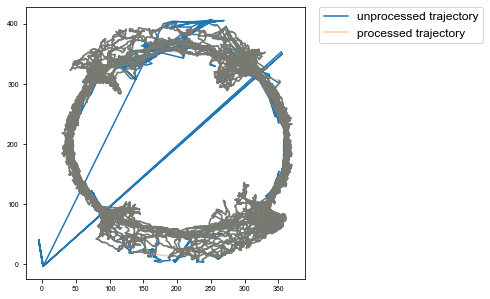

Number of open-to-closed crossings detected: 14
Number of closed-to-open crossings detected: 1
Number of lingerings in transition region detected: 81
Number of prolonged open to closed crossings detected: 25
Number of prolonged closed to open crossings detected: 37
Number of withdraws detected: 19
Number of nosedips detected: 110


In [3]:
events = traj_process(animal[session], behavior='ezm', start_time=0, duration=15)
# # events = pickle.load(open('D:\\ephys\\2021-02-19_mBWfus009_EZM_ephys\ephys_processed\\2021-02-19_mBWfus009_EZM_ephys_results_manually_annotated.pickle',
# #                           "rb"))
f_behavior = 50
f_ephys = 500
behavior_window_duration = 900
ephys_window_duration = 1000
#
# ### extract overall behavioral open/close frame indices
open_idx = [i for i, el in enumerate(
    events['rois_stats']['roi_at_each_frame'][
    int(f_behavior * behavior_trigger):int(f_behavior * behavior_trigger) + f_behavior * behavior_window_duration])
            if
            el == 'open']
close_idx = [i for i, el in enumerate(
    events['rois_stats']['roi_at_each_frame'][
    int(f_behavior * behavior_trigger):int(f_behavior * behavior_trigger) + f_behavior * behavior_window_duration])
             if
             el == 'closed']
open_to_close_idx = np.array(events['transitions']['open_closed_exittime']) - int(f_behavior * behavior_trigger)
prolonged_close_to_open_idx = np.array(events['transitions']['prolonged_open_closed_exittime']) - int(
    f_behavior * behavior_trigger)
prolonged_open_to_close_idx = np.array(events['transitions']['prolonged_closed_open_exittime']) - int(
    f_behavior * behavior_trigger)

In [4]:
dataset = ephys.load_data(animal[session])

2021-02-19_mBWfus009_EZM_ephys


In [5]:
pad_to_array, pad_to_array_text = ephys.pad_to_array()
sorted_array = [text.split(' ')[-1] for text in pad_to_array_text]
sorted_pads = [text.split('=')[0] for text in pad_to_array_text]

chlist_mpfc = ephys.get_ch(dataset, 'mpfc')
chlist_vhipp = ephys.get_ch(dataset, 'vhipp')

indx_vhipp = []
for ch in chlist_vhipp:
    if sorted_array.count(ch) > 0:
        indx_vhipp.append(sorted_array.index(ch))
    else:
        indx_vhipp.append('nan')
        
indx_mpfc = []
for ch in chlist_mpfc:
    if sorted_array.count(ch) > 0:
        indx_mpfc.append(sorted_array.index(ch))
    else:
        indx_mpfc.append('nan')
        
indx_vhipp = sorted(list(filter(lambda indx: indx != 'nan', indx_vhipp)))
indx_mpfc = sorted(list(filter(lambda indx: indx != 'nan', indx_mpfc)))

print("Plot order of " + str(len(indx_mpfc)) + " mPFC channels by depth (pad1=deepest)")
print([pad_to_array_text[i] for i in indx_mpfc])

print("Plot order of " + str(len(indx_vhipp)) + " vHipp channels by depth (pad1=deepest)")
print([pad_to_array_text[i] for i in indx_vhipp])

Plot order of 21 mPFC channels by depth (pad1=deepest)
['pad1== A-028', 'pad2== A-029', 'pad3== A-027', 'pad5== A-020', 'pad6== A-021', 'pad7== A-011', 'pad11== A-010', 'pad12== A-015', 'pad13== A-018', 'pad14== A-023', 'pad15== A-026', 'pad16== A-031', 'pad20== A-014', 'pad21== A-017', 'pad22== A-022', 'pad23== A-025', 'pad24== A-030', 'pad25== A-019', 'pad26== A-024', 'pad28== A-013', 'pad29== A-016']
Plot order of 30 vHipp channels by depth (pad1=deepest)
['pad33== A-032', 'pad34== A-045', 'pad35== A-043', 'pad36== A-056', 'pad37== A-035', 'pad38== A-040', 'pad39== A-060', 'pad41== A-033', 'pad42== A-038', 'pad43== A-041', 'pad44== A-046', 'pad45== A-049', 'pad46== A-054', 'pad47== A-057', 'pad48== A-062', 'pad49== A-034', 'pad50== A-039', 'pad51== A-042', 'pad52== A-047', 'pad53== A-050', 'pad54== A-055', 'pad55== A-058', 'pad56== A-063', 'pad57== A-044', 'pad58== A-036', 'pad59== A-059', 'pad60== A-061', 'pad61== A-037', 'pad62== A-048', 'pad63== A-053']


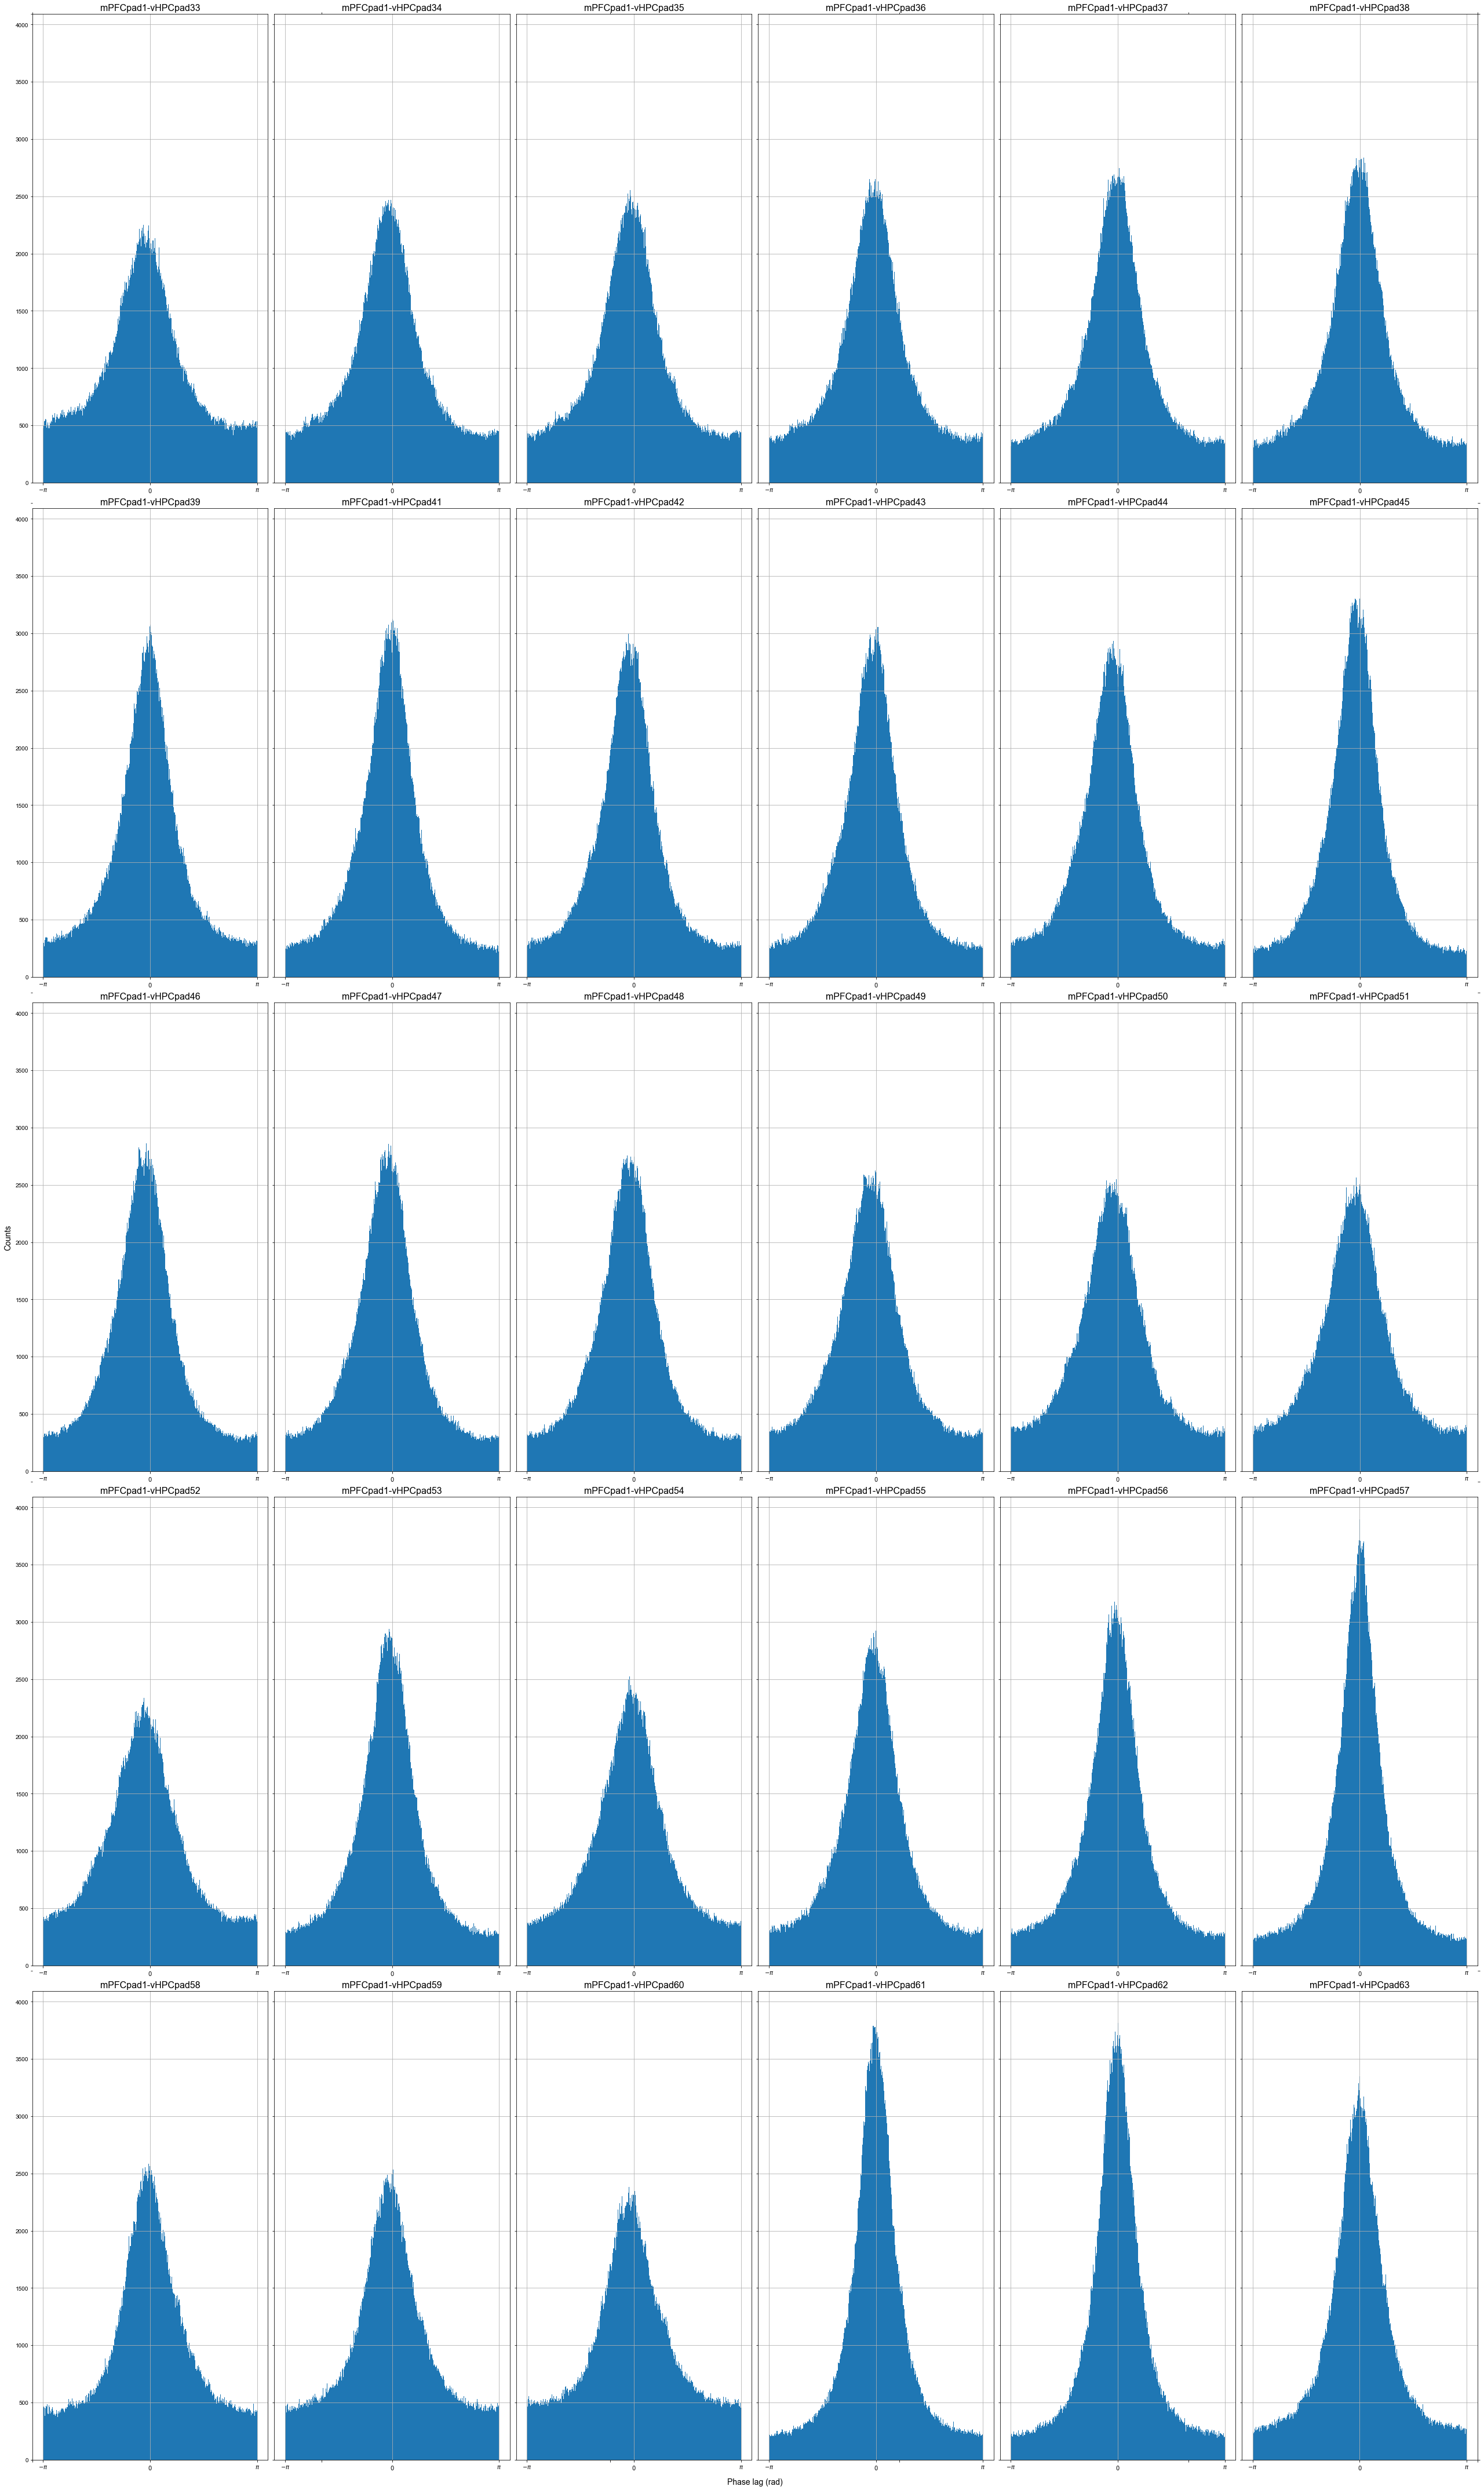

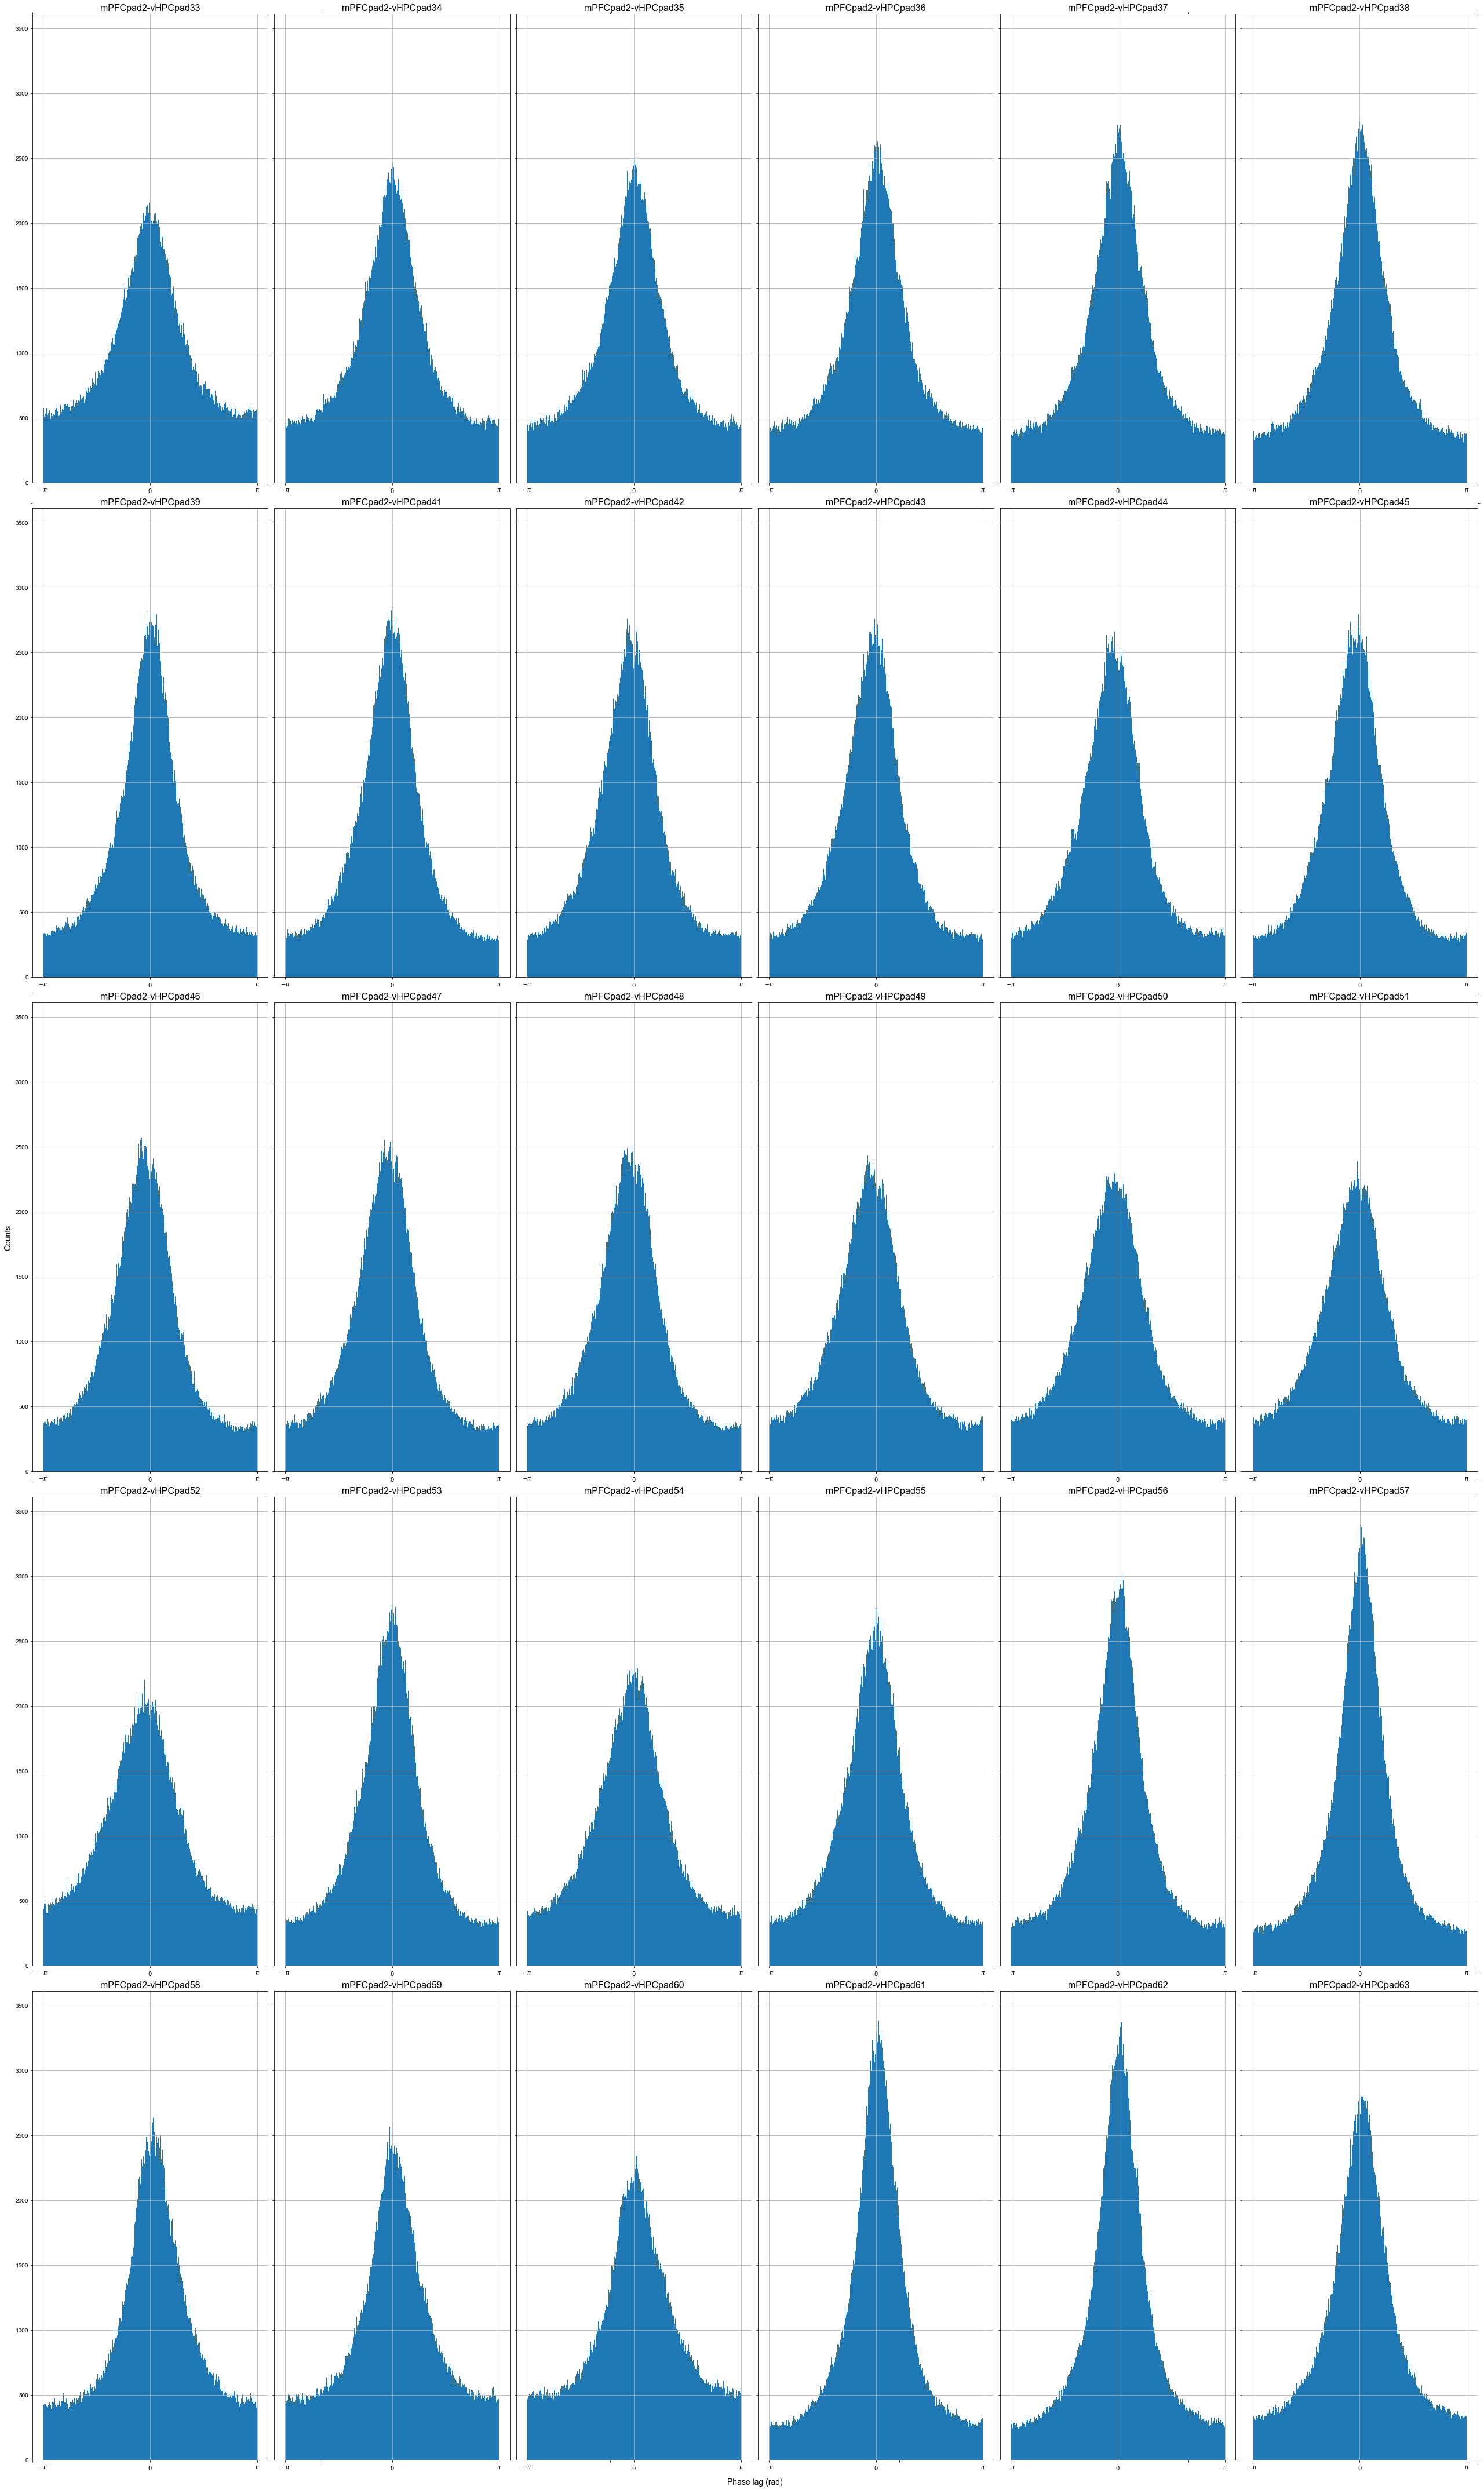

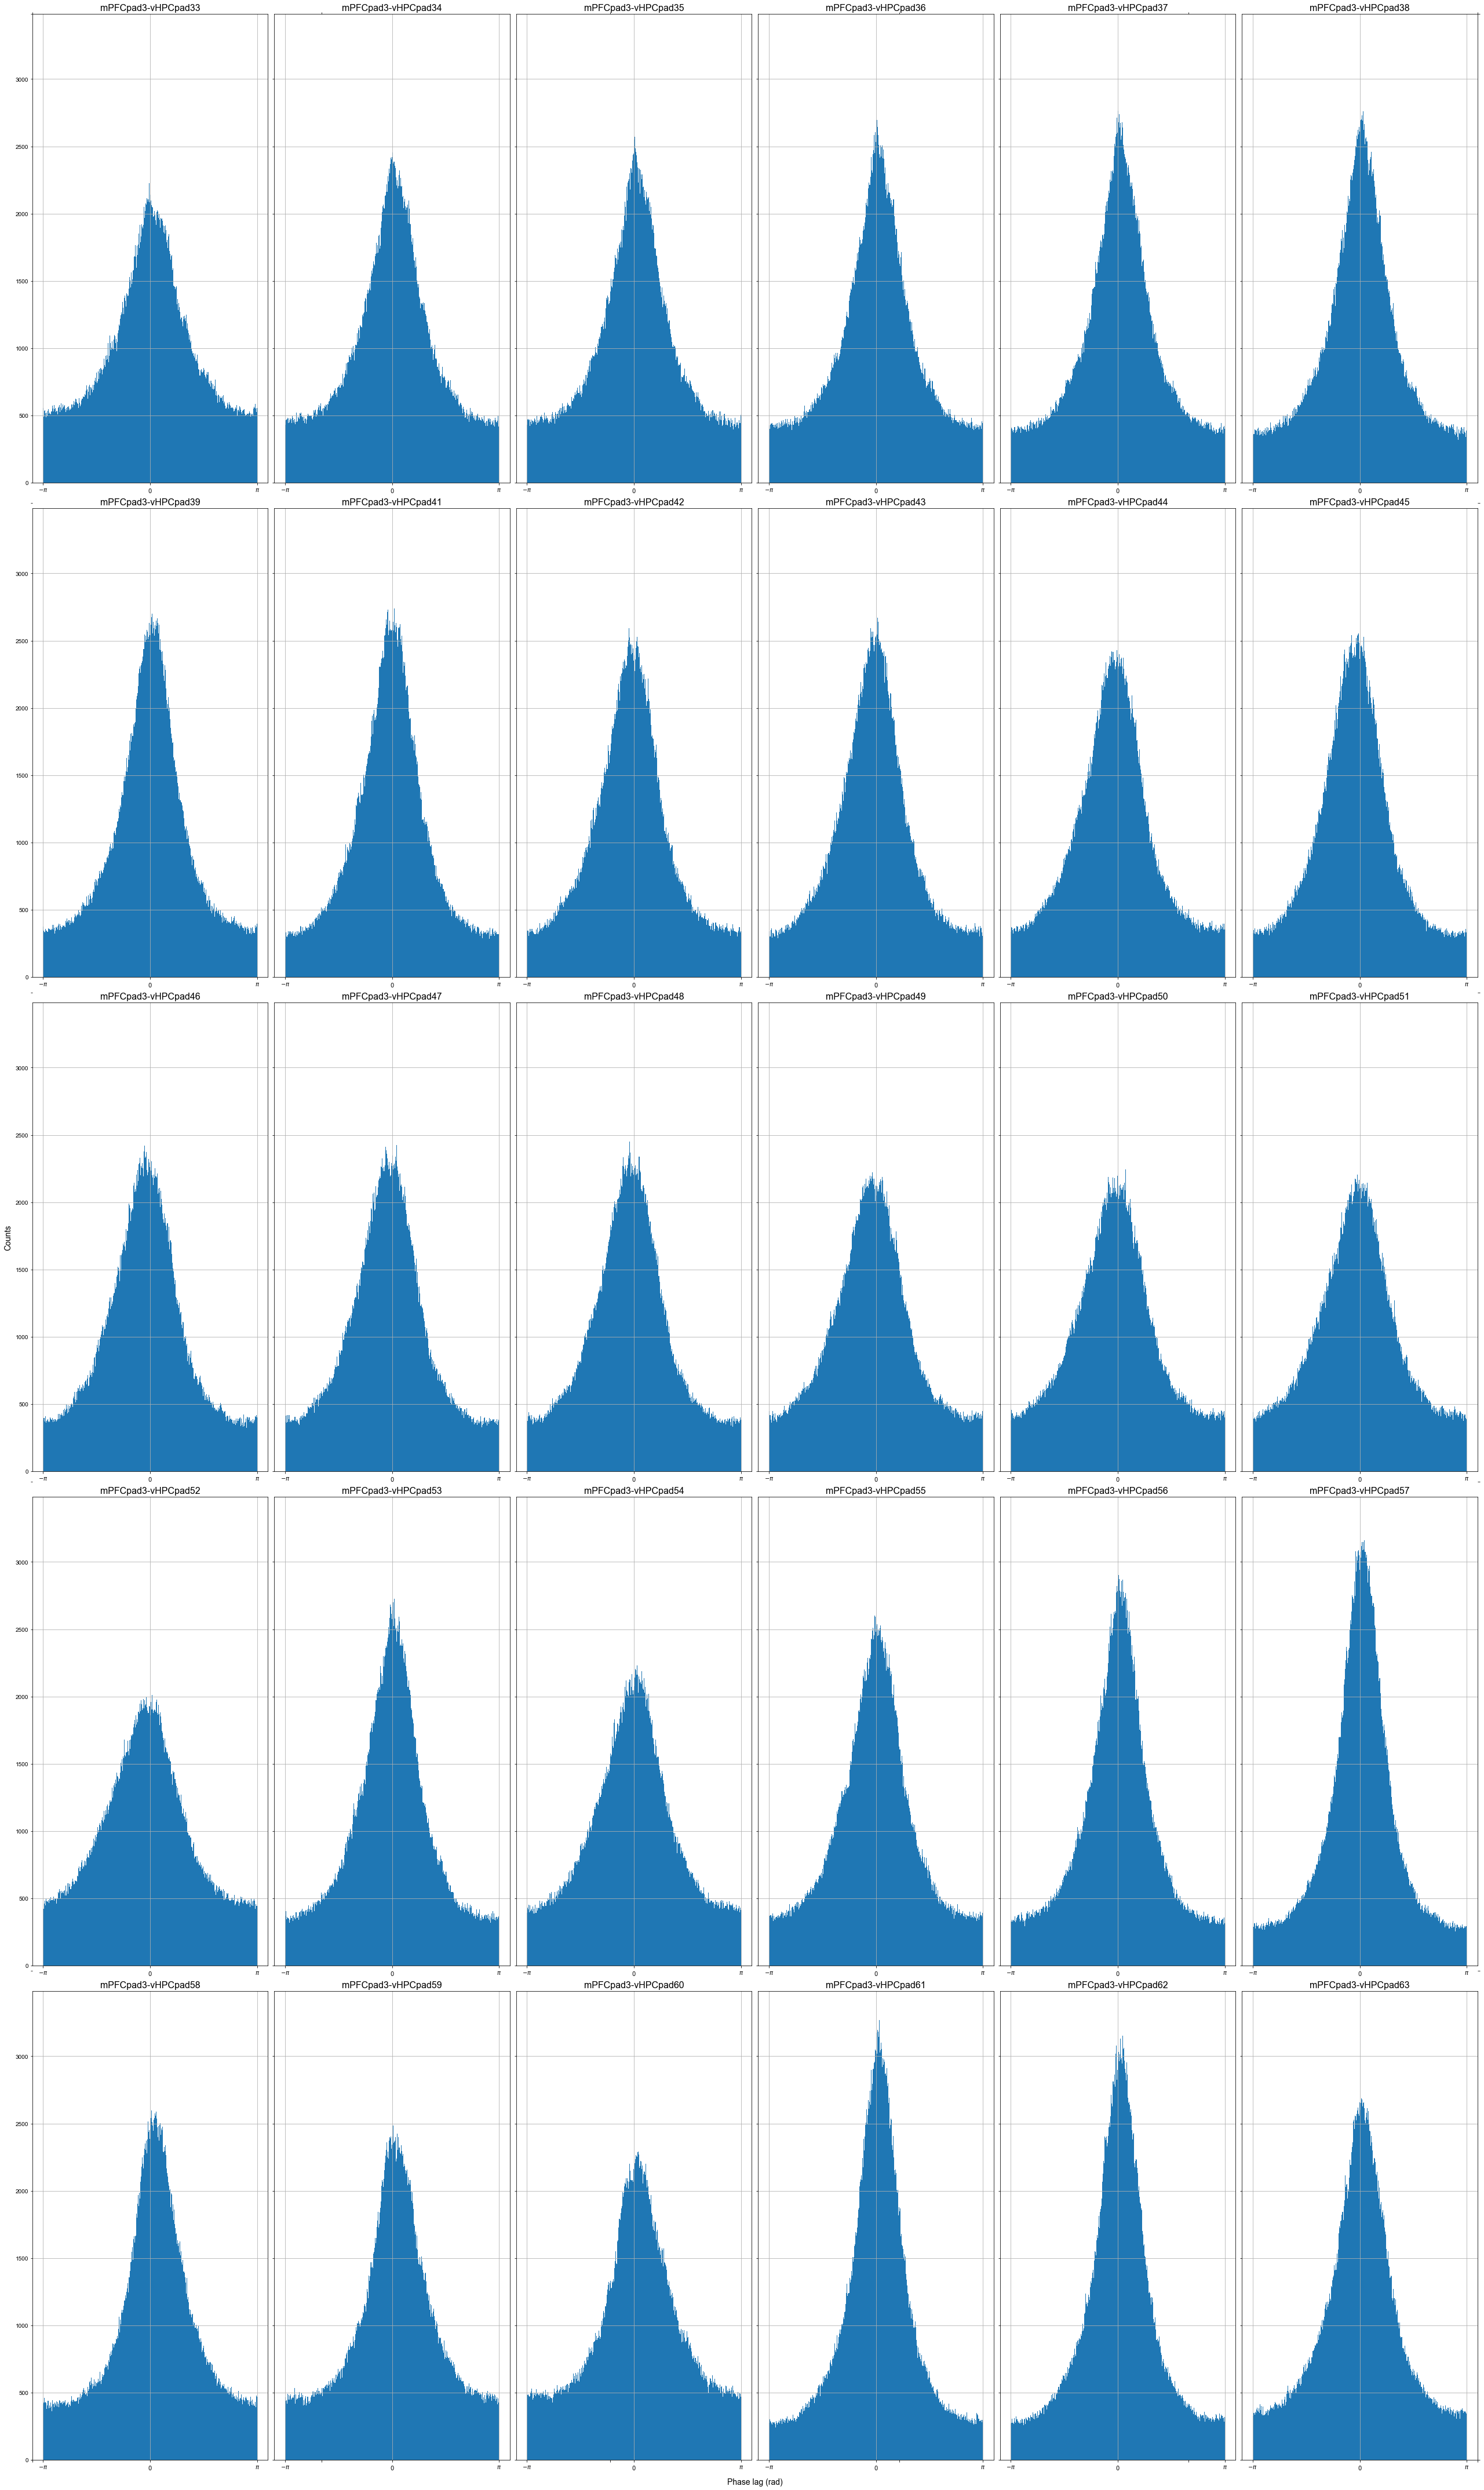

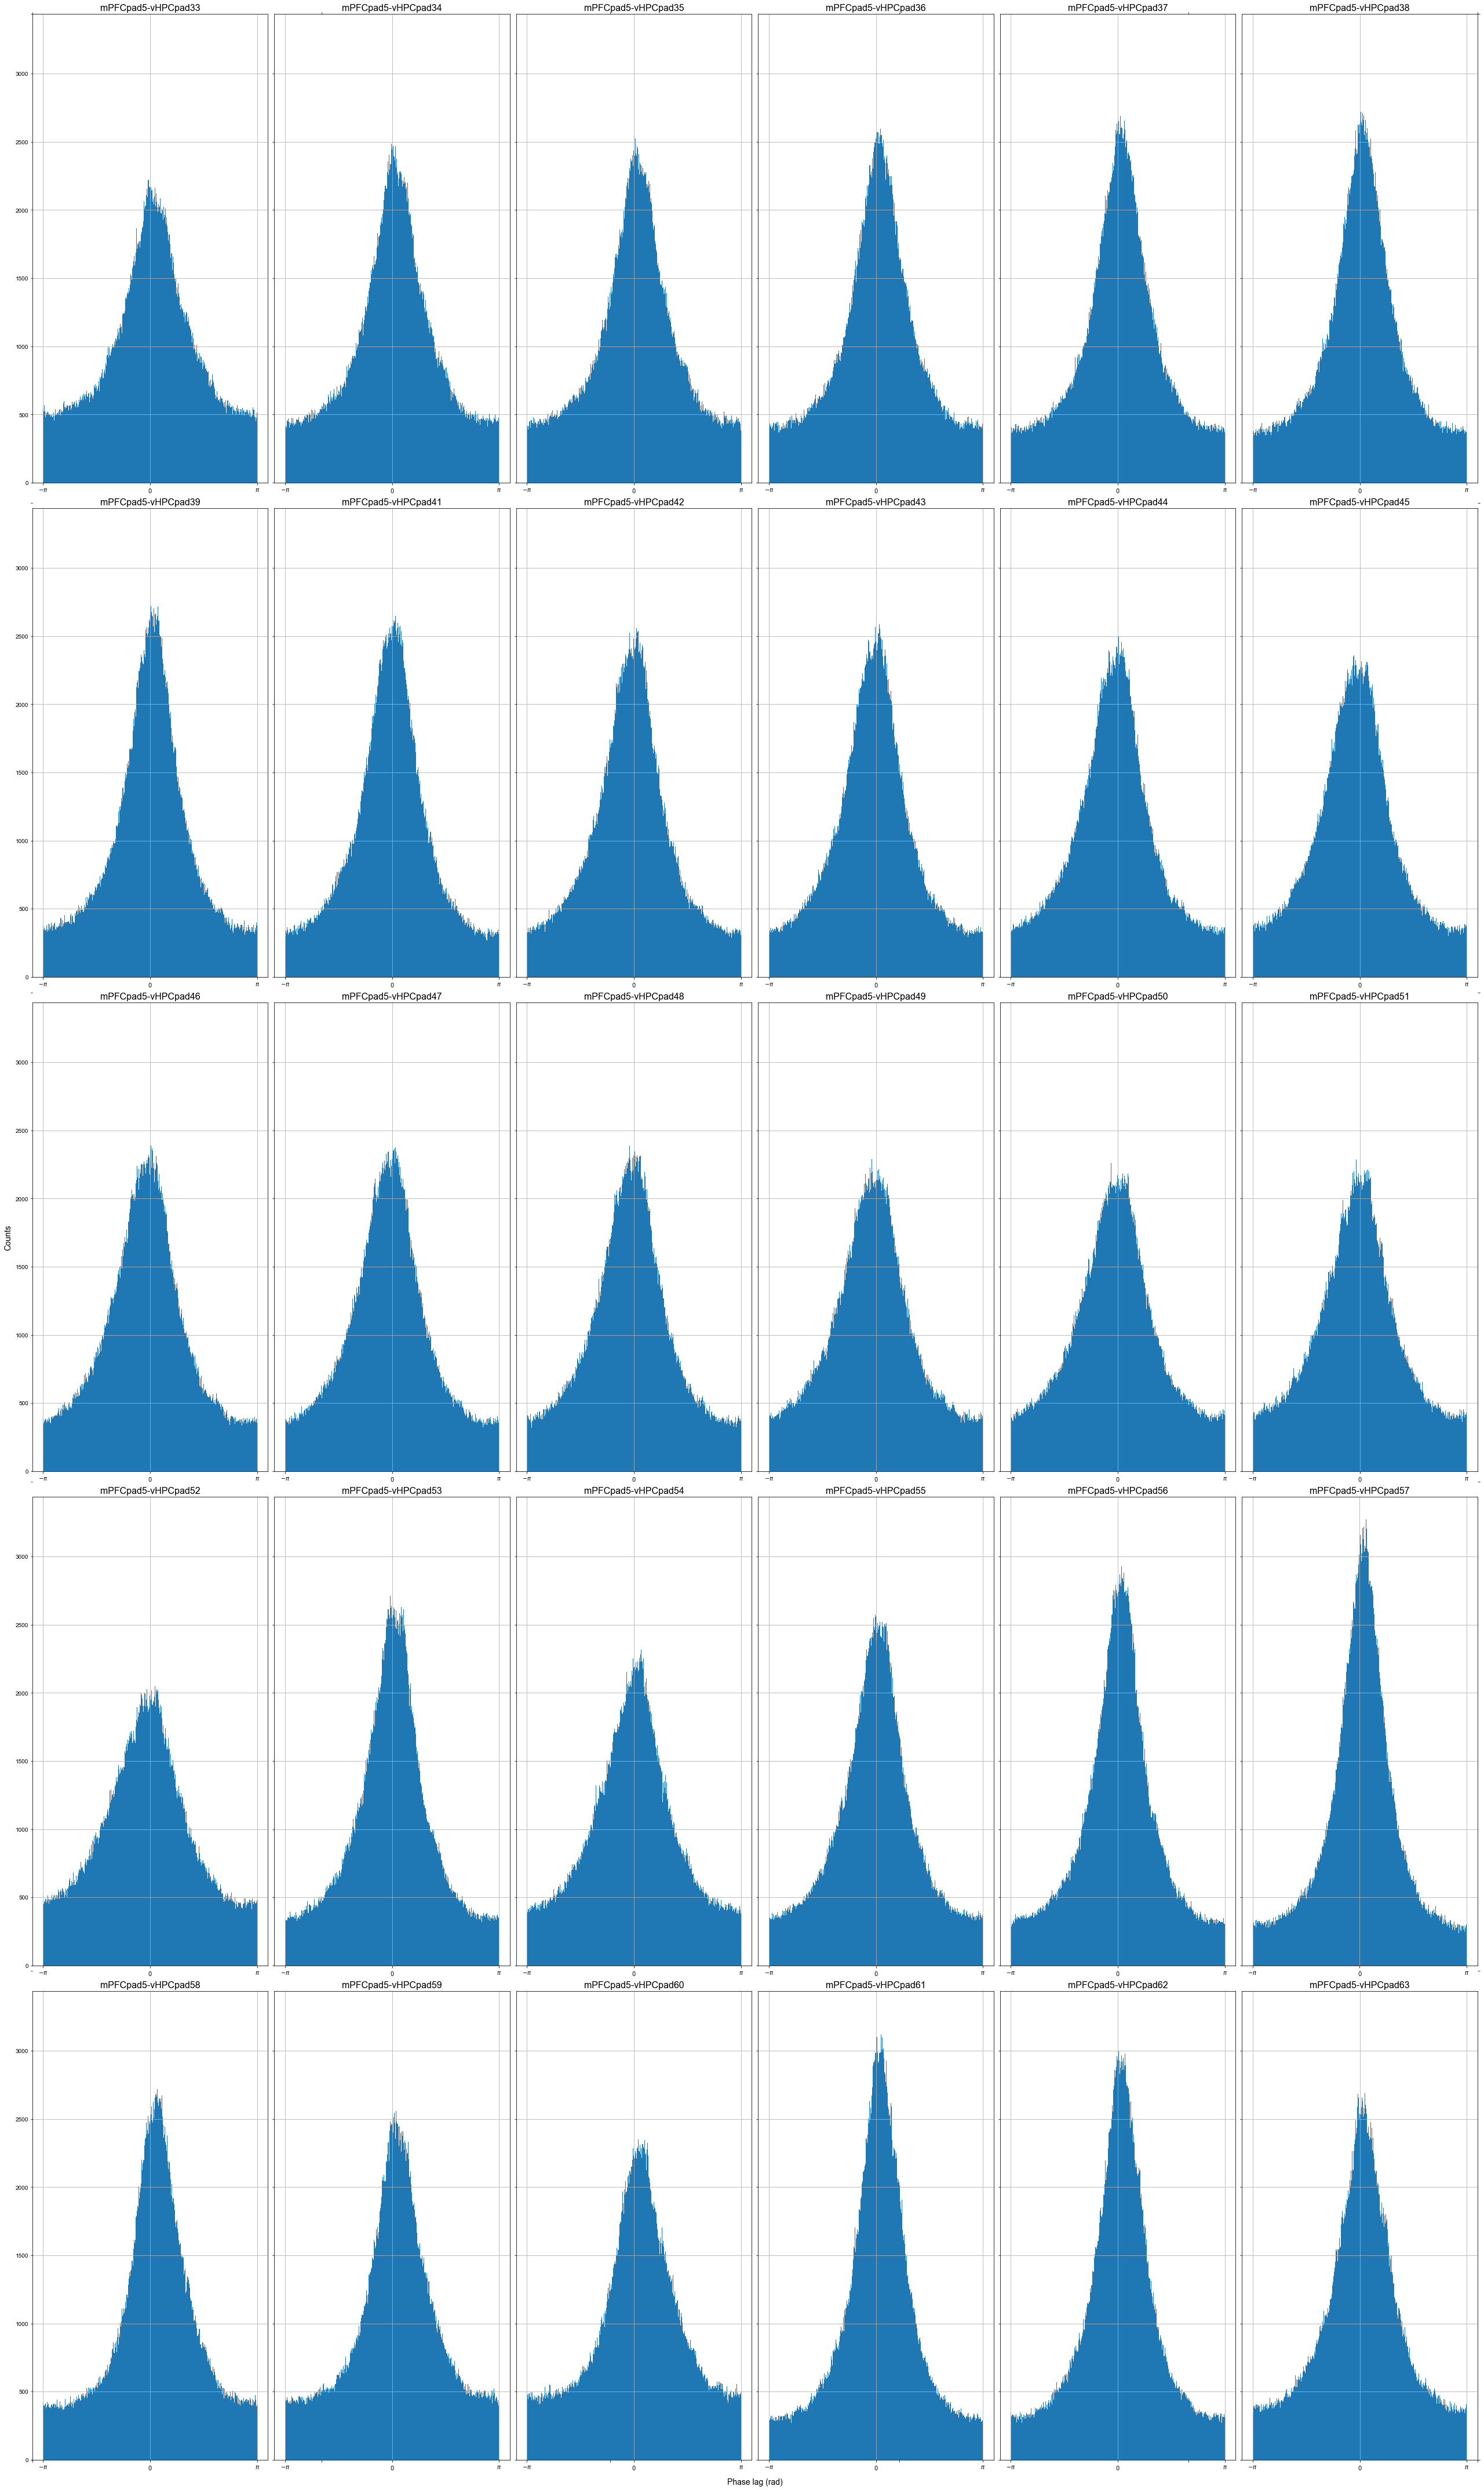

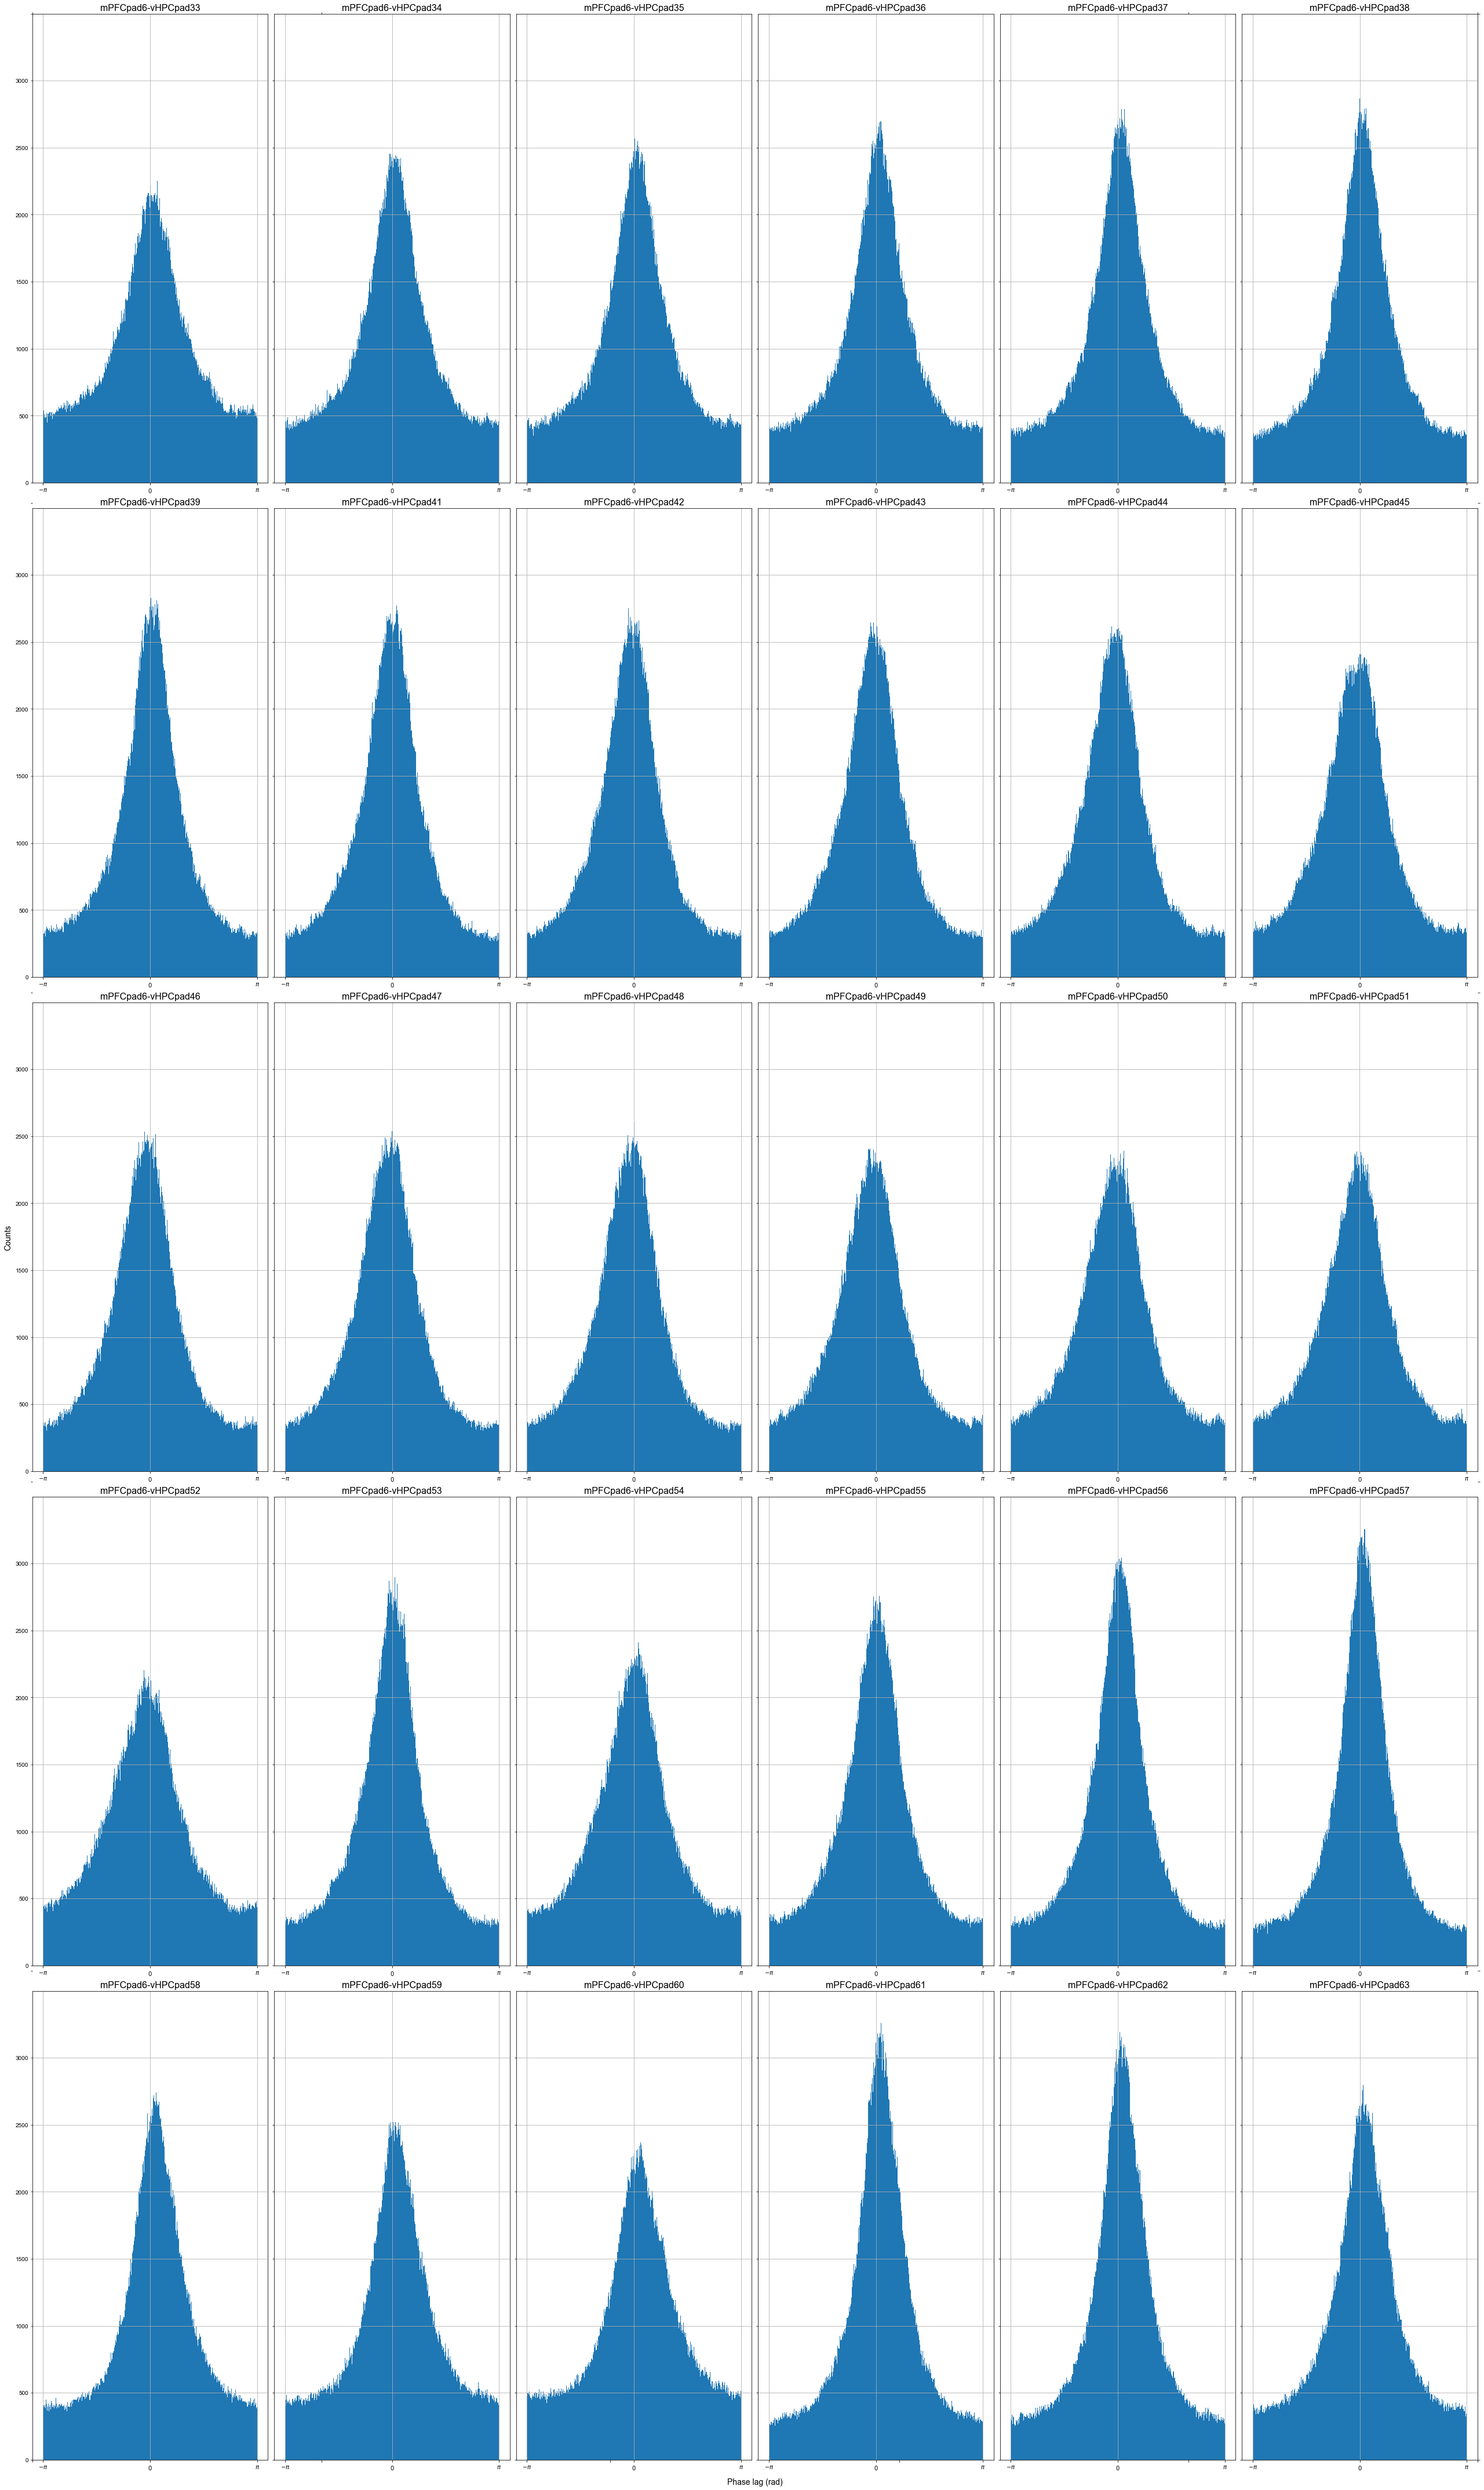

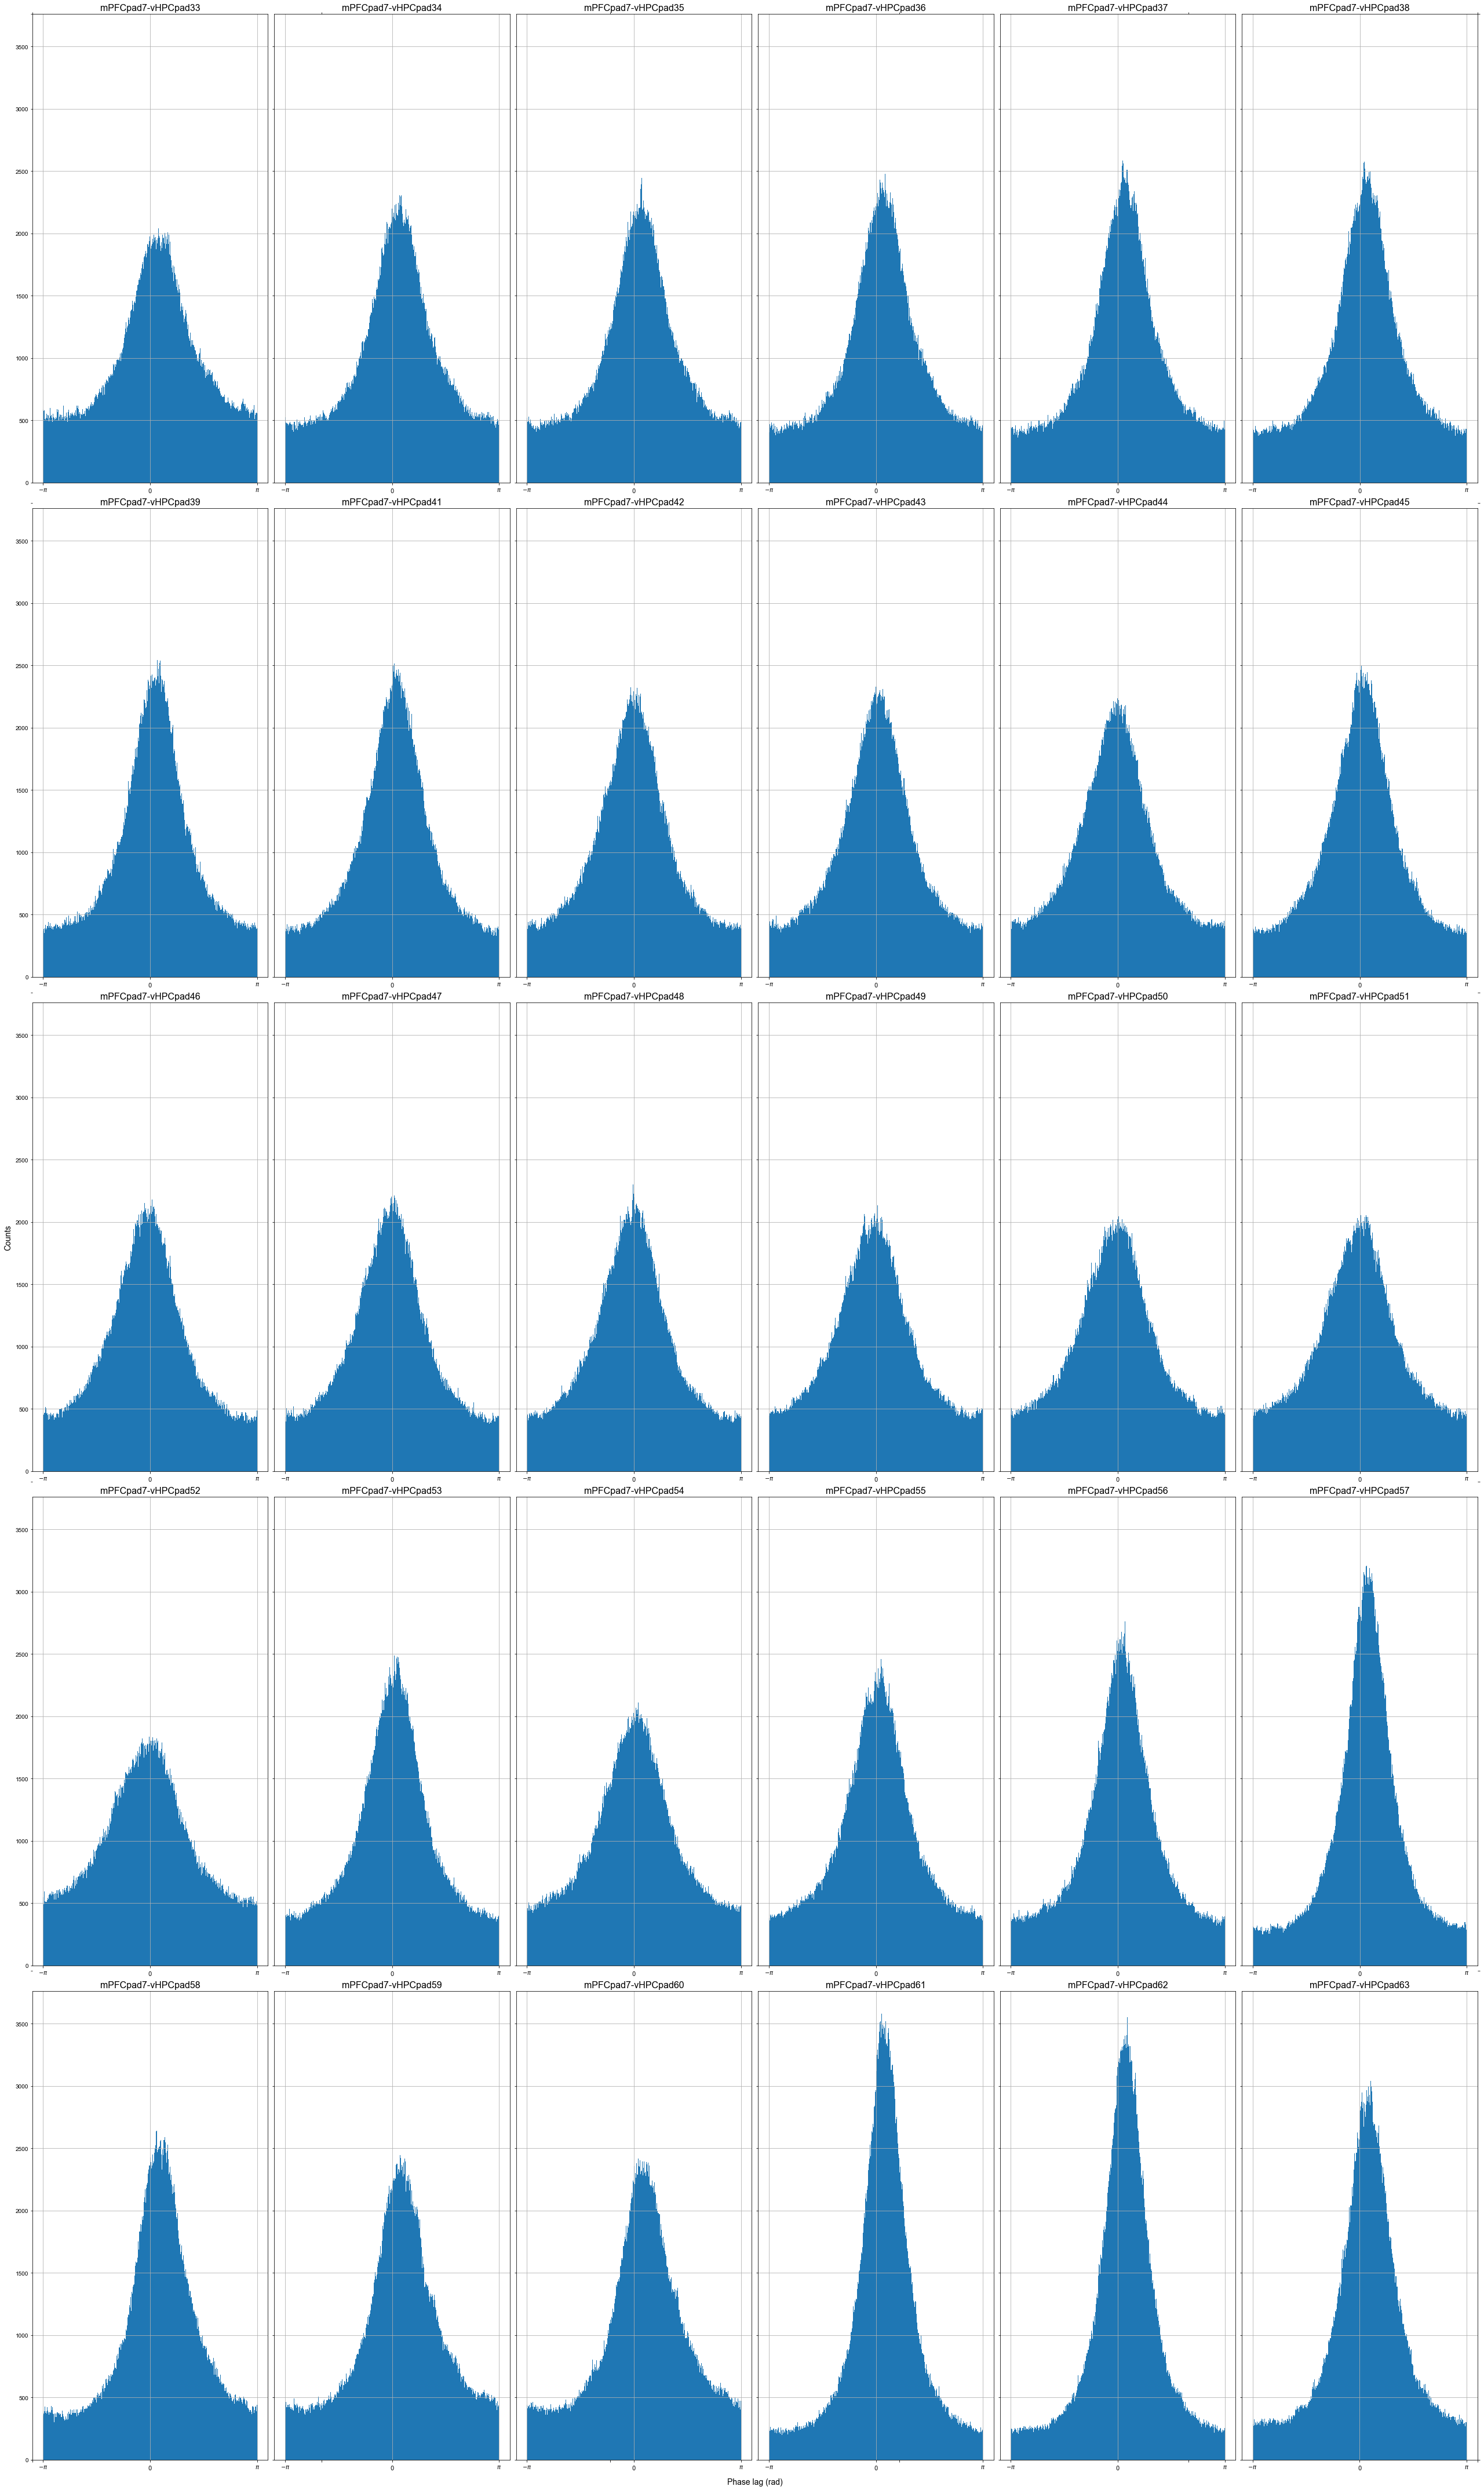

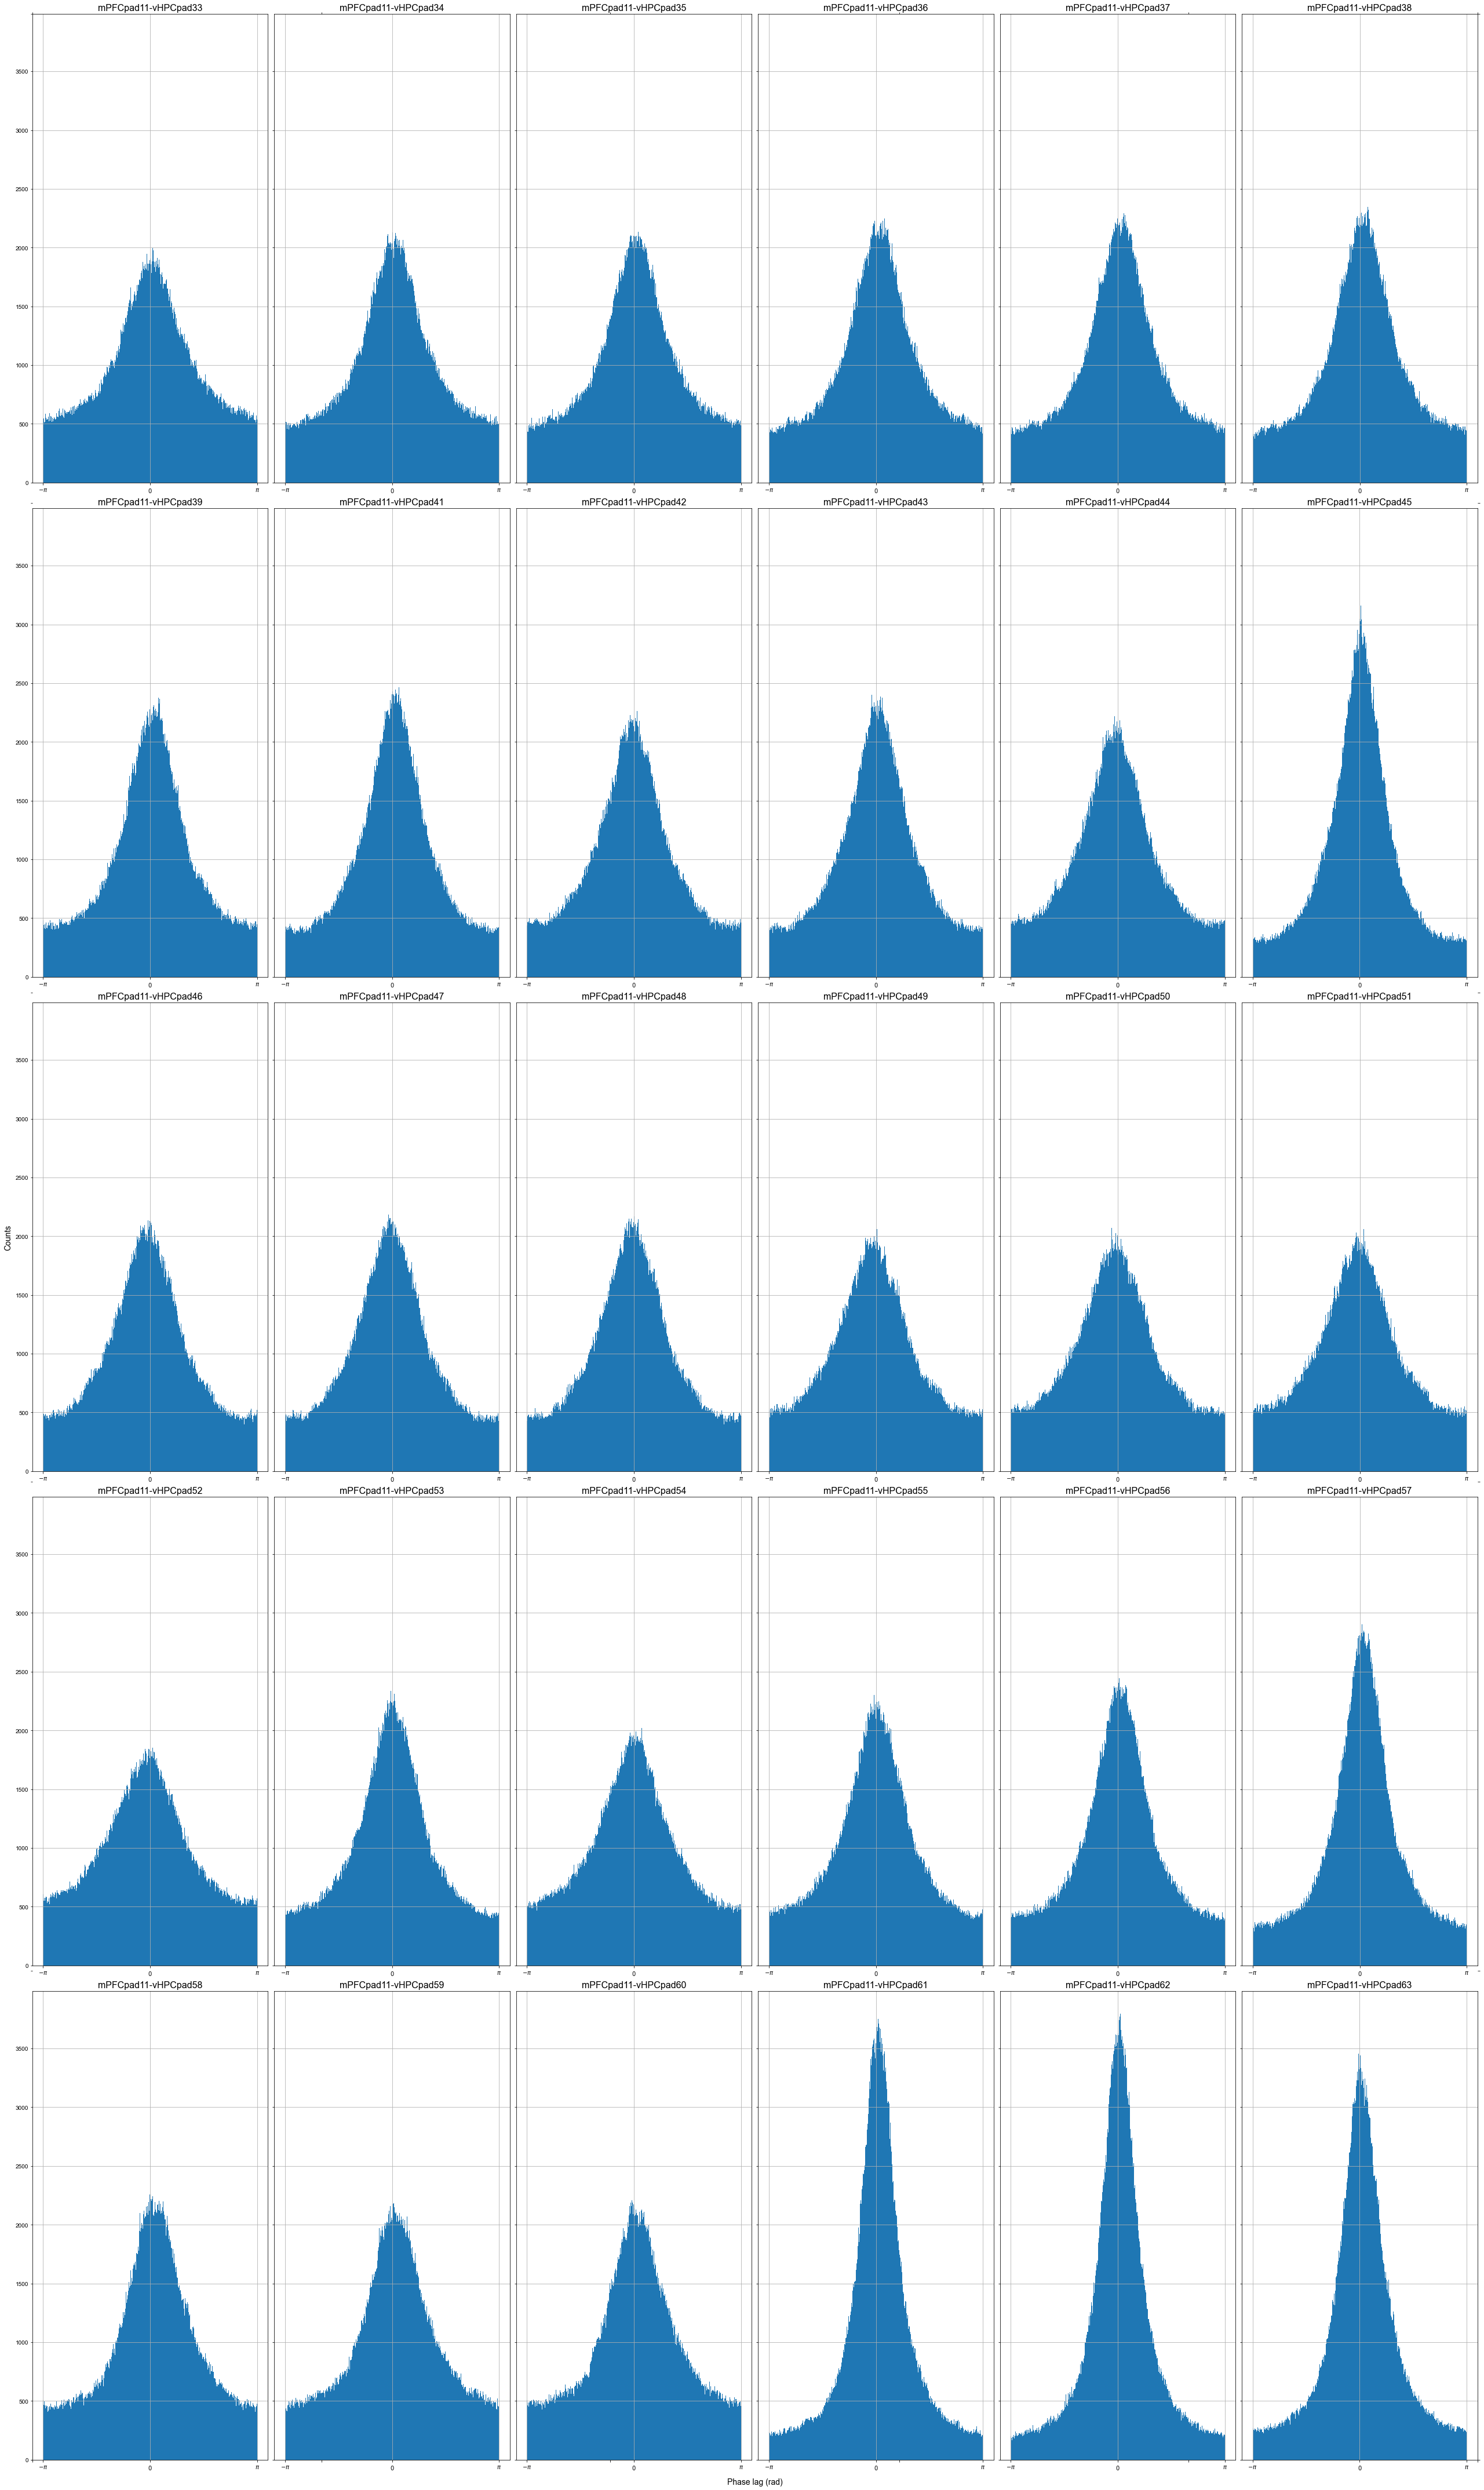

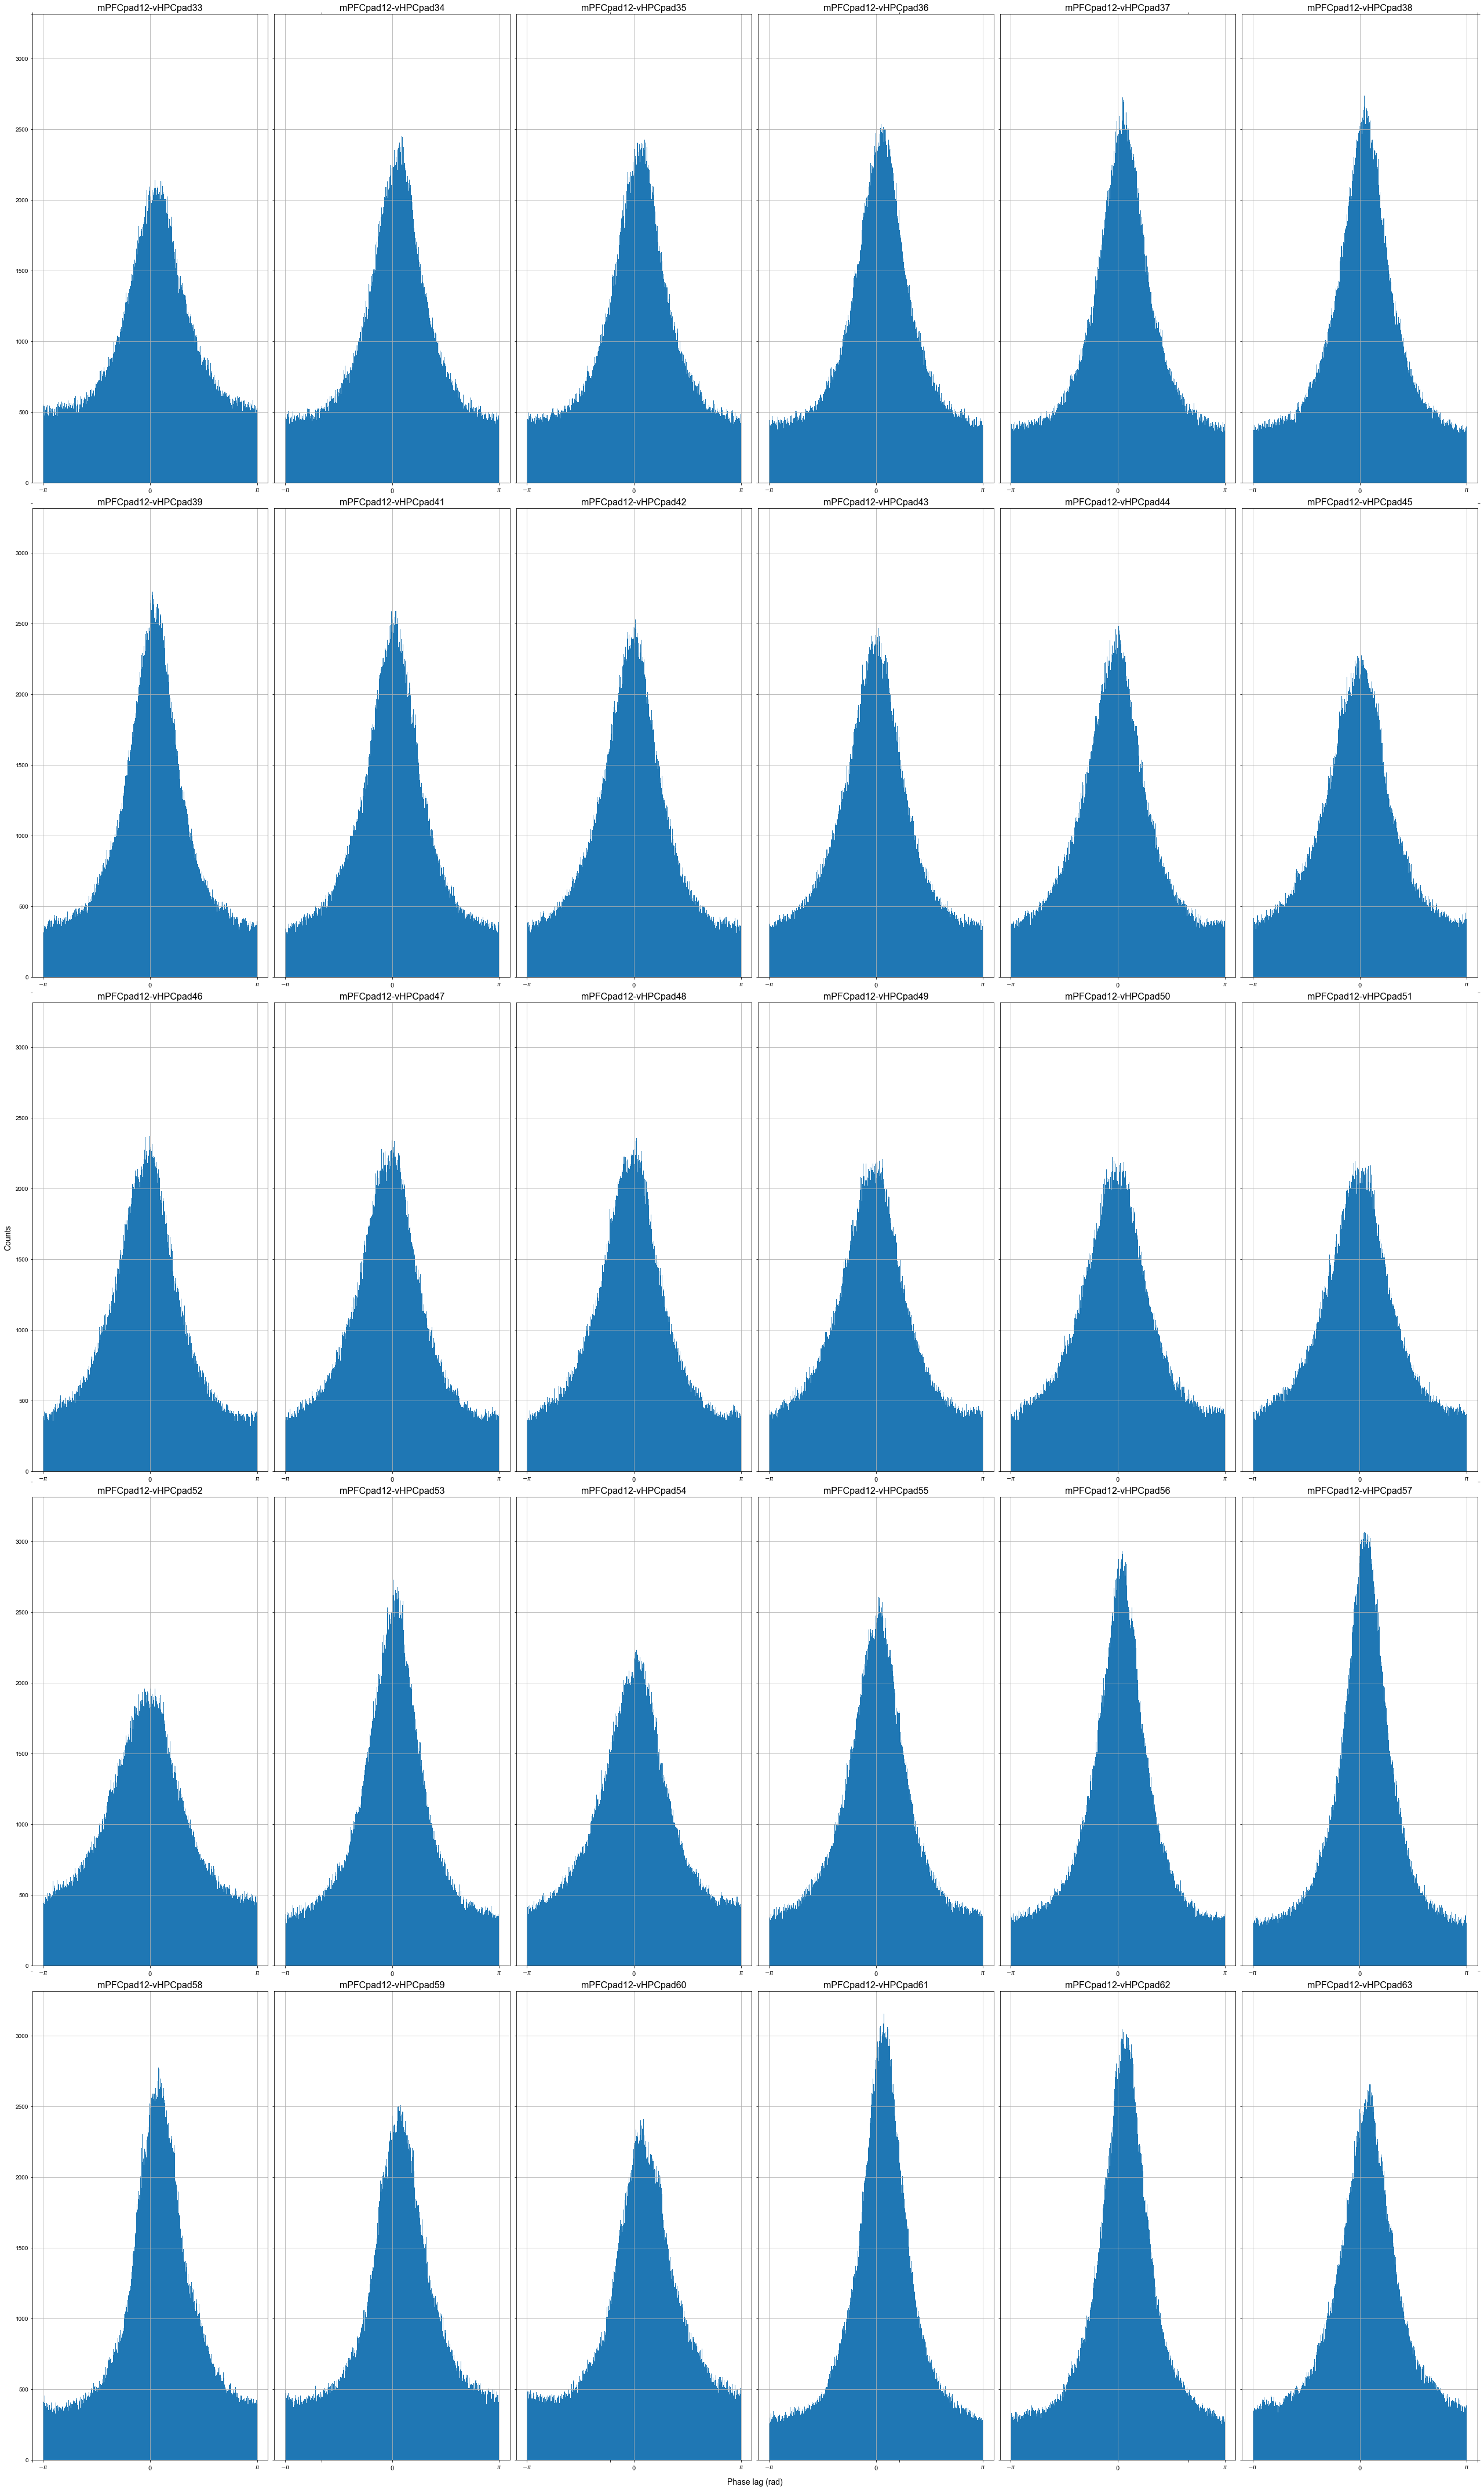

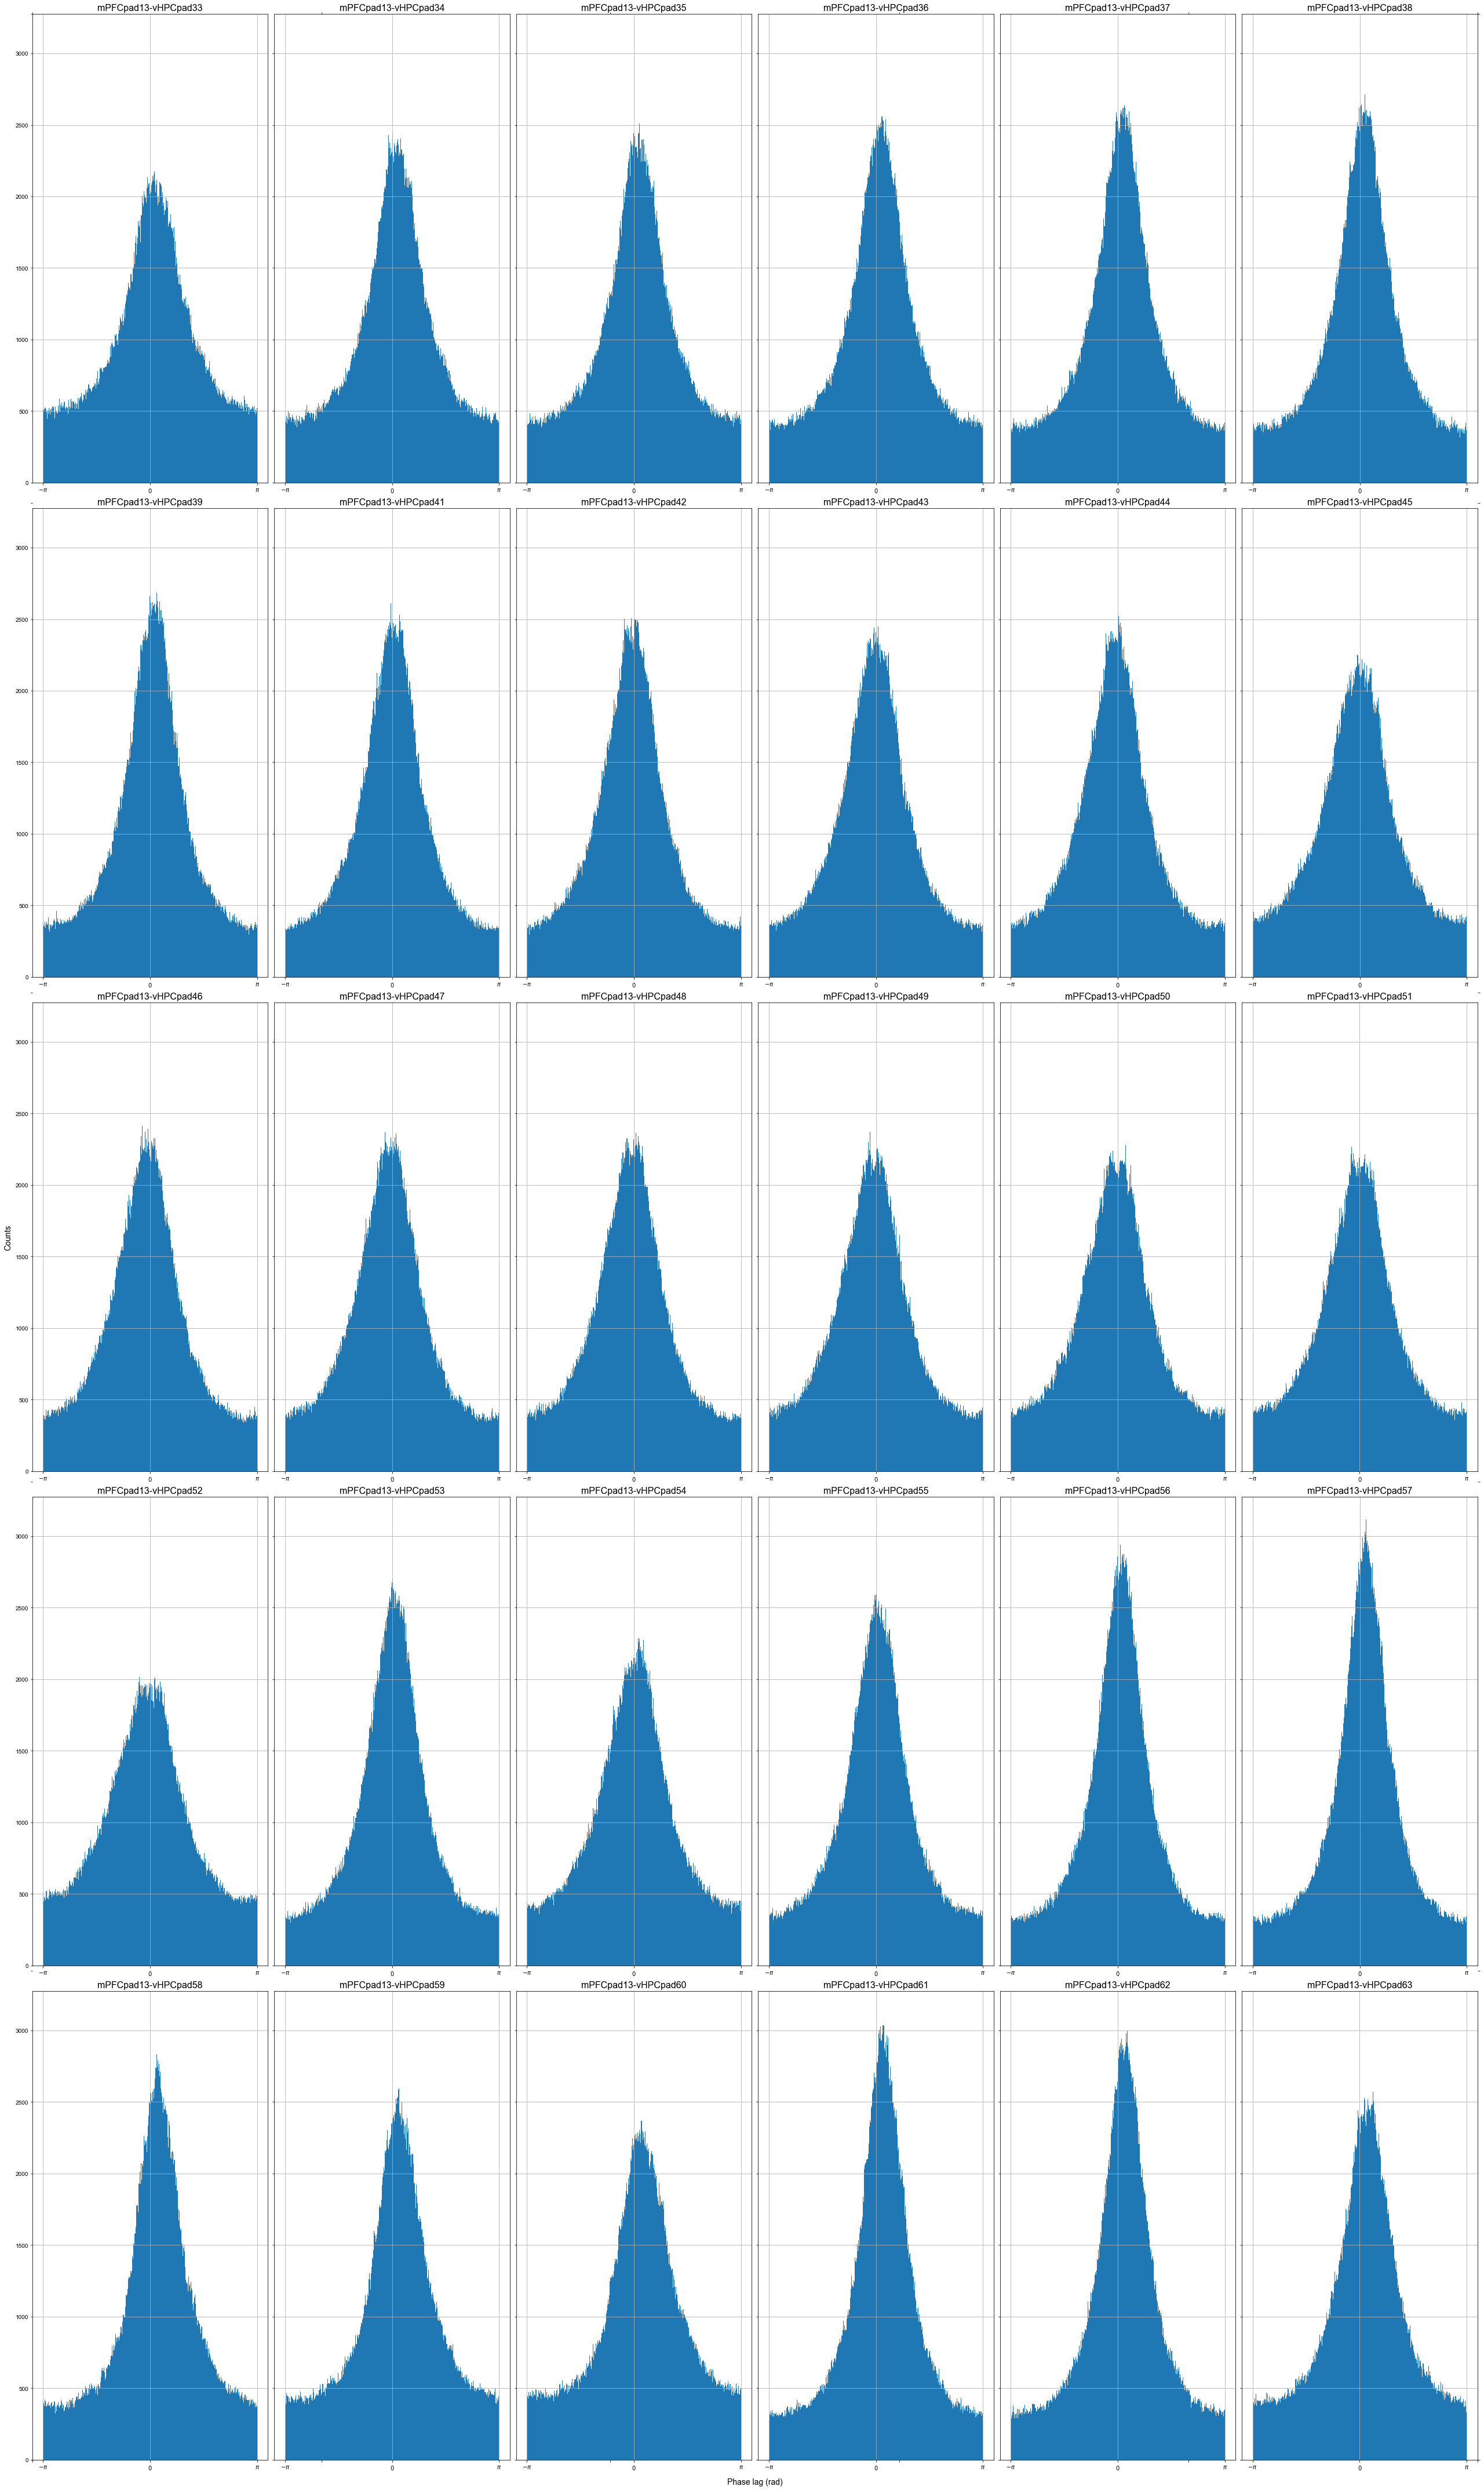

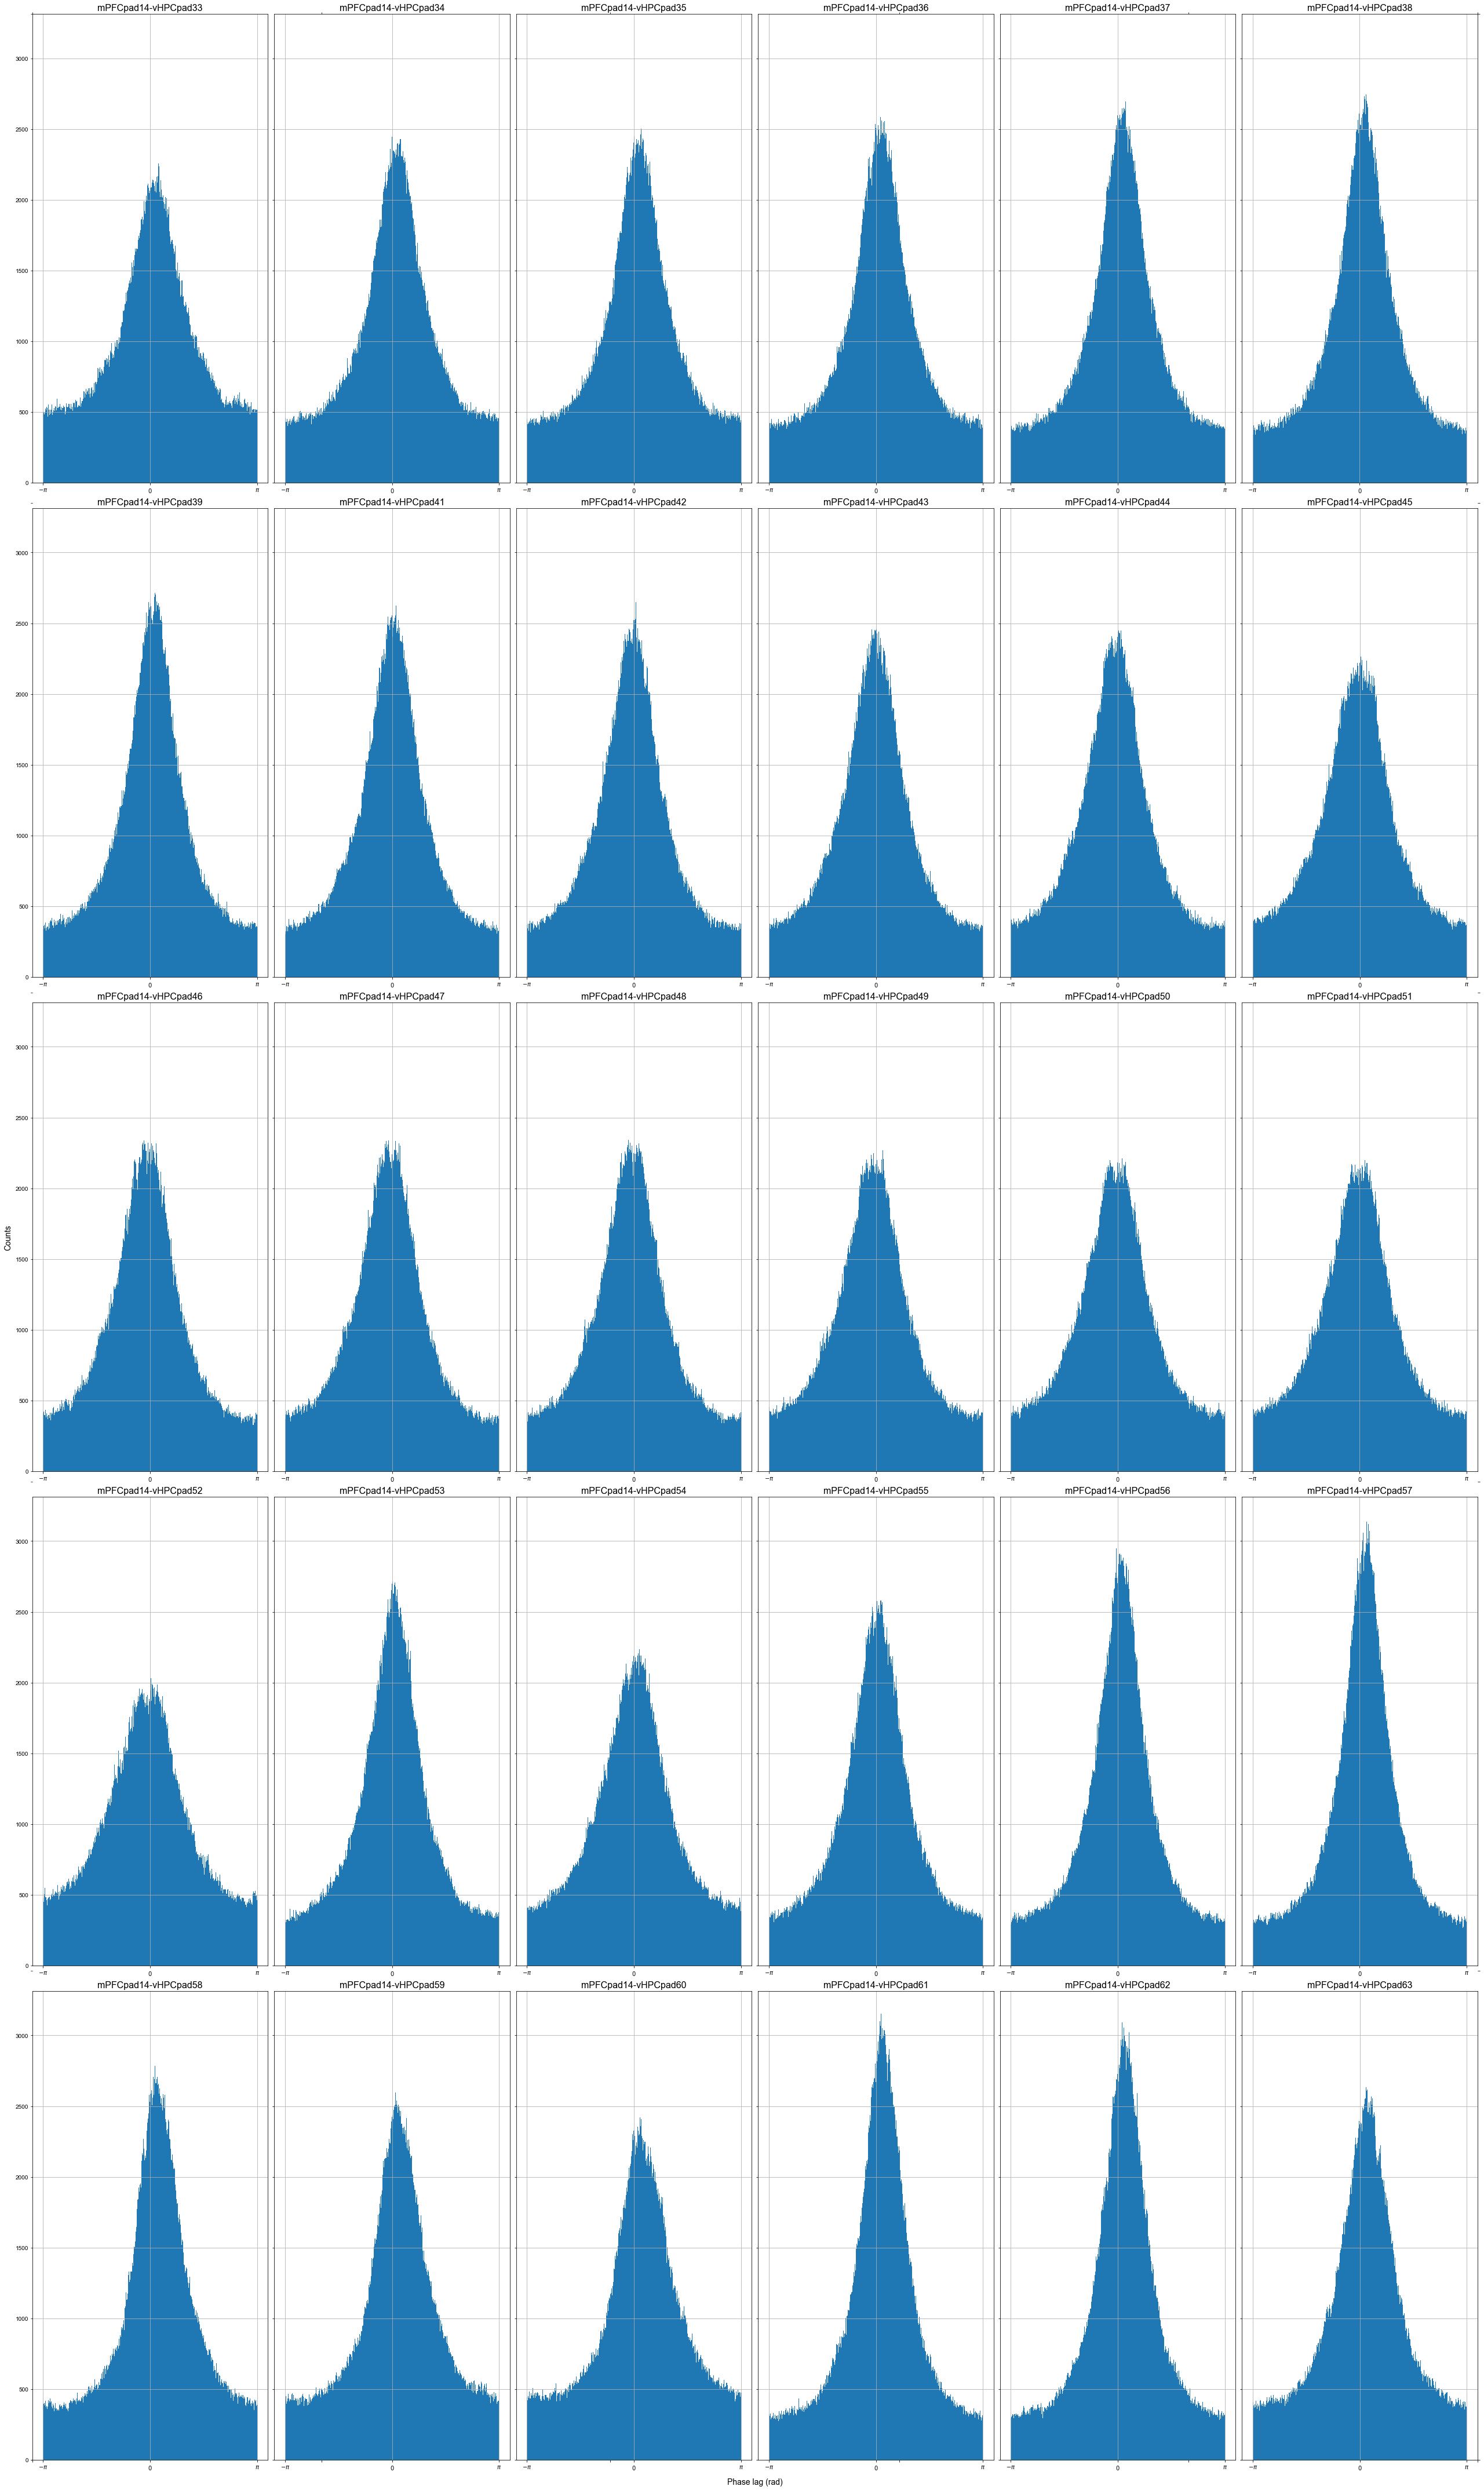

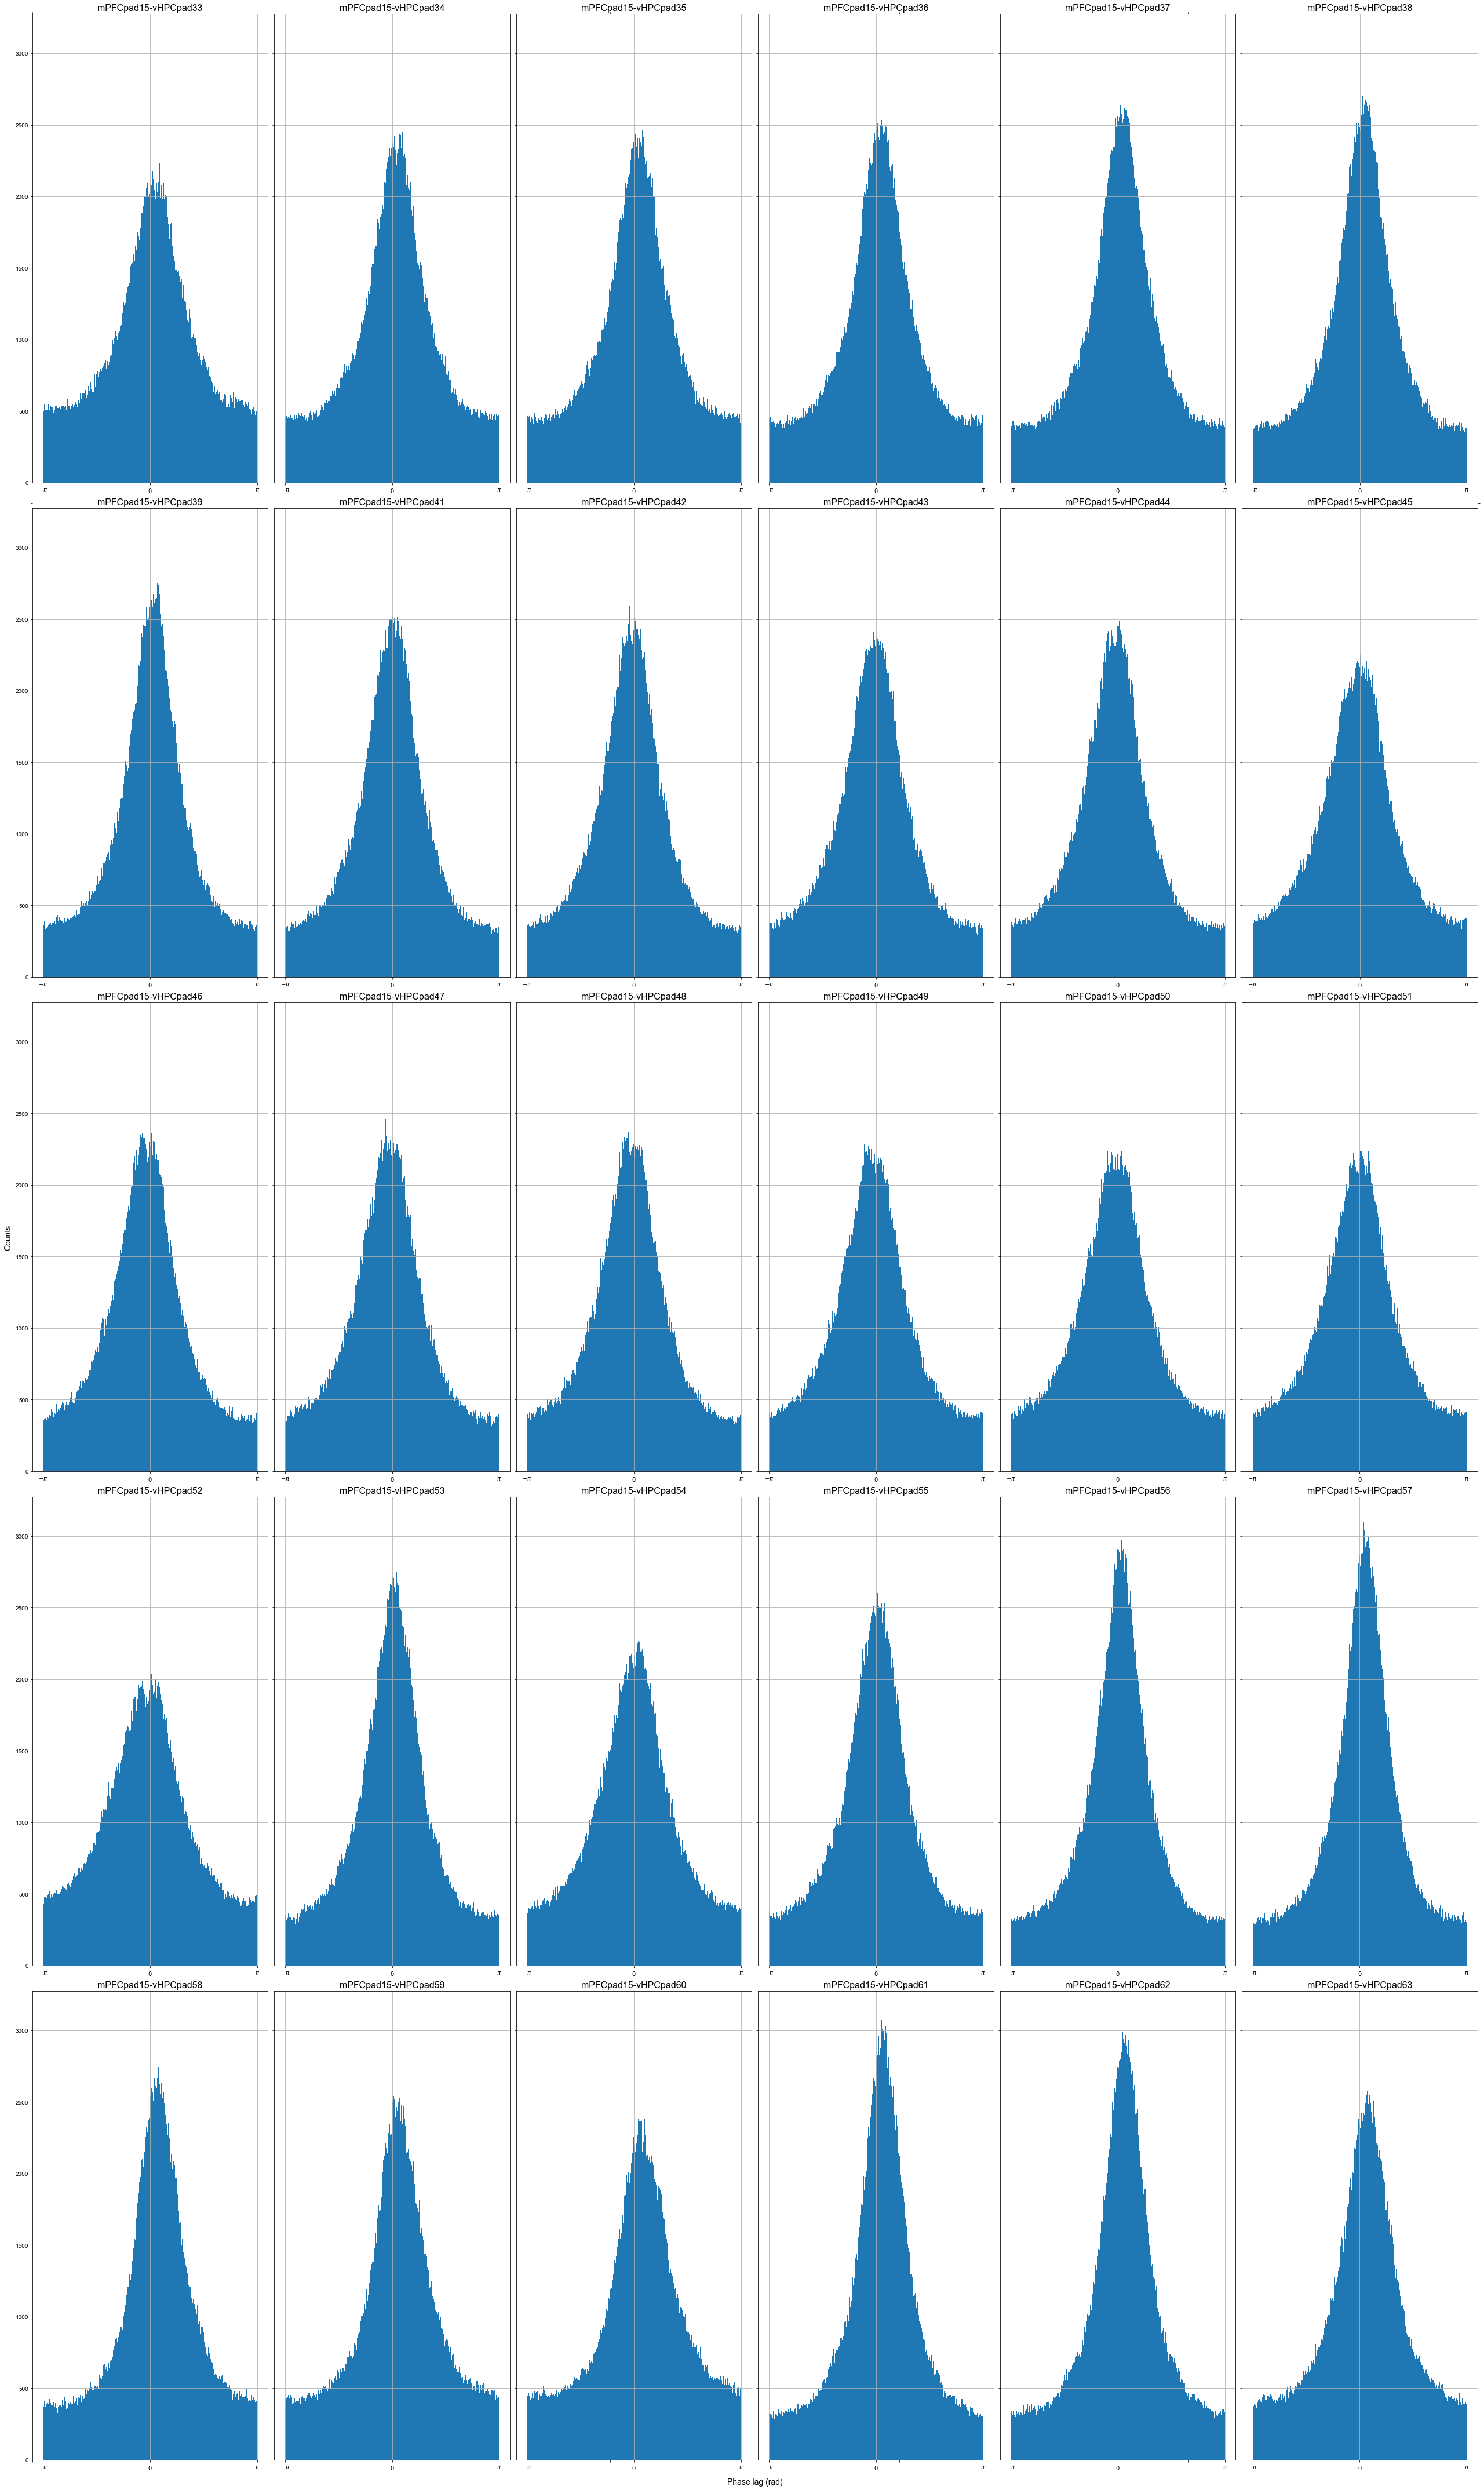

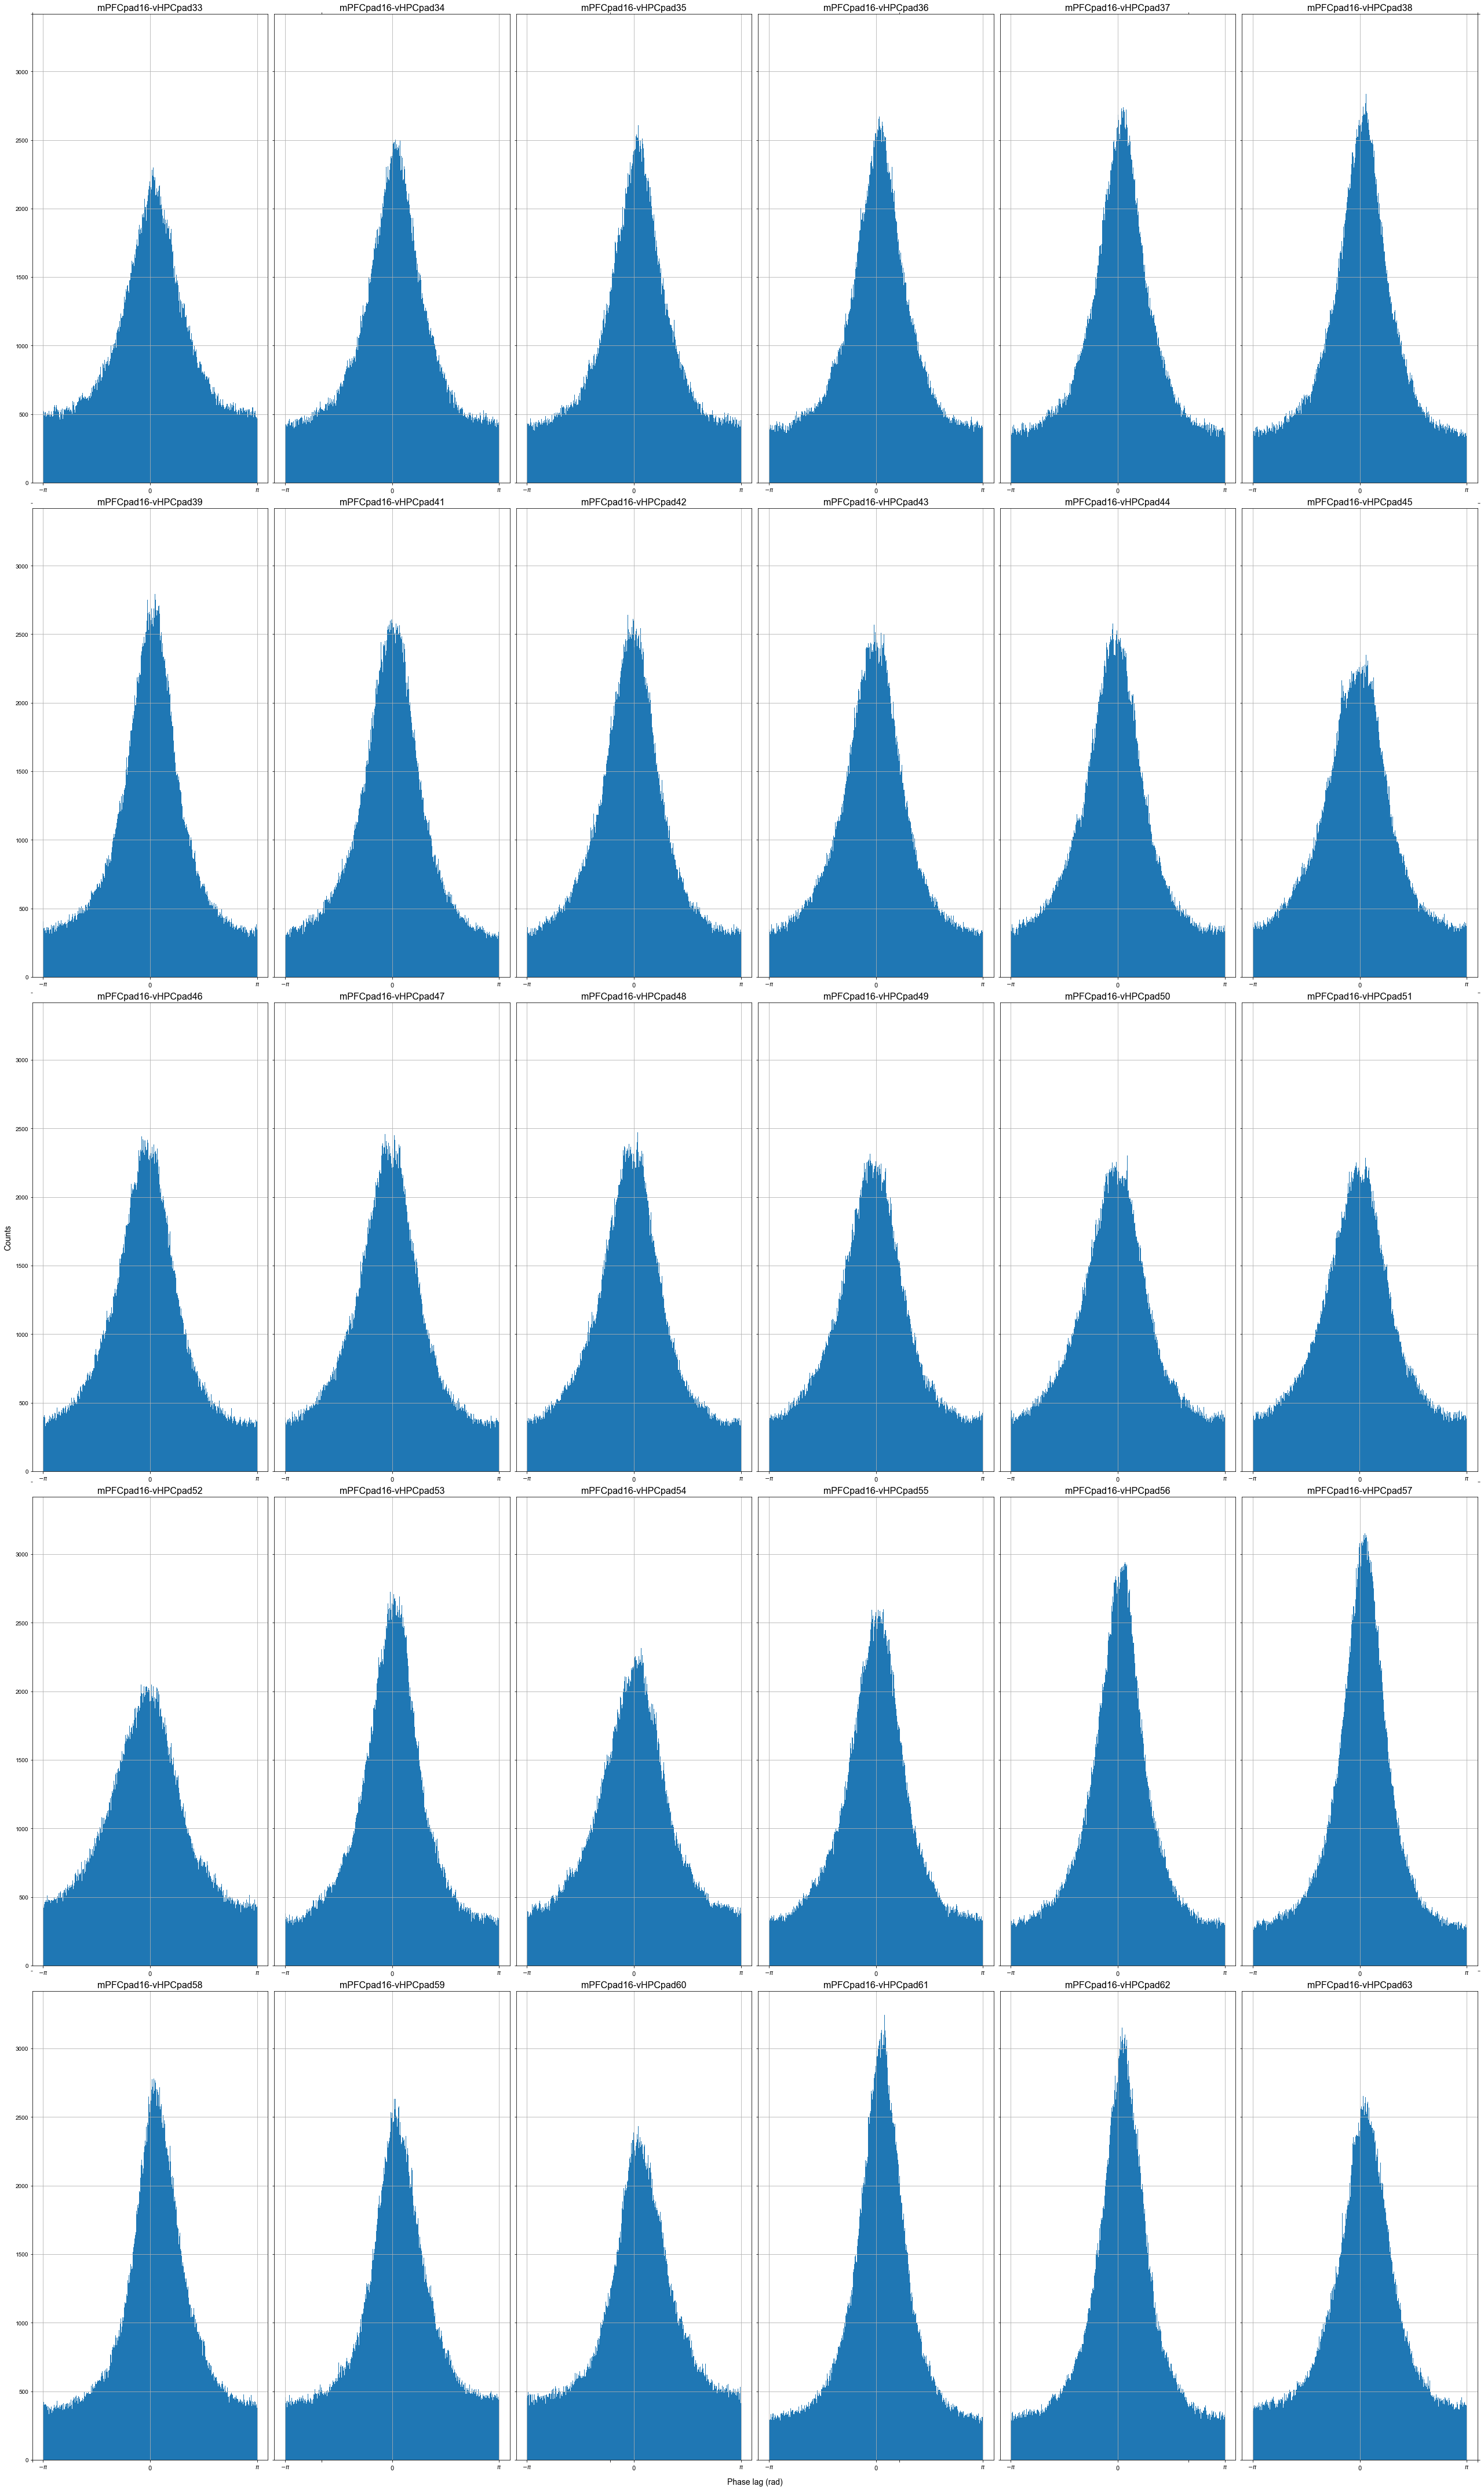

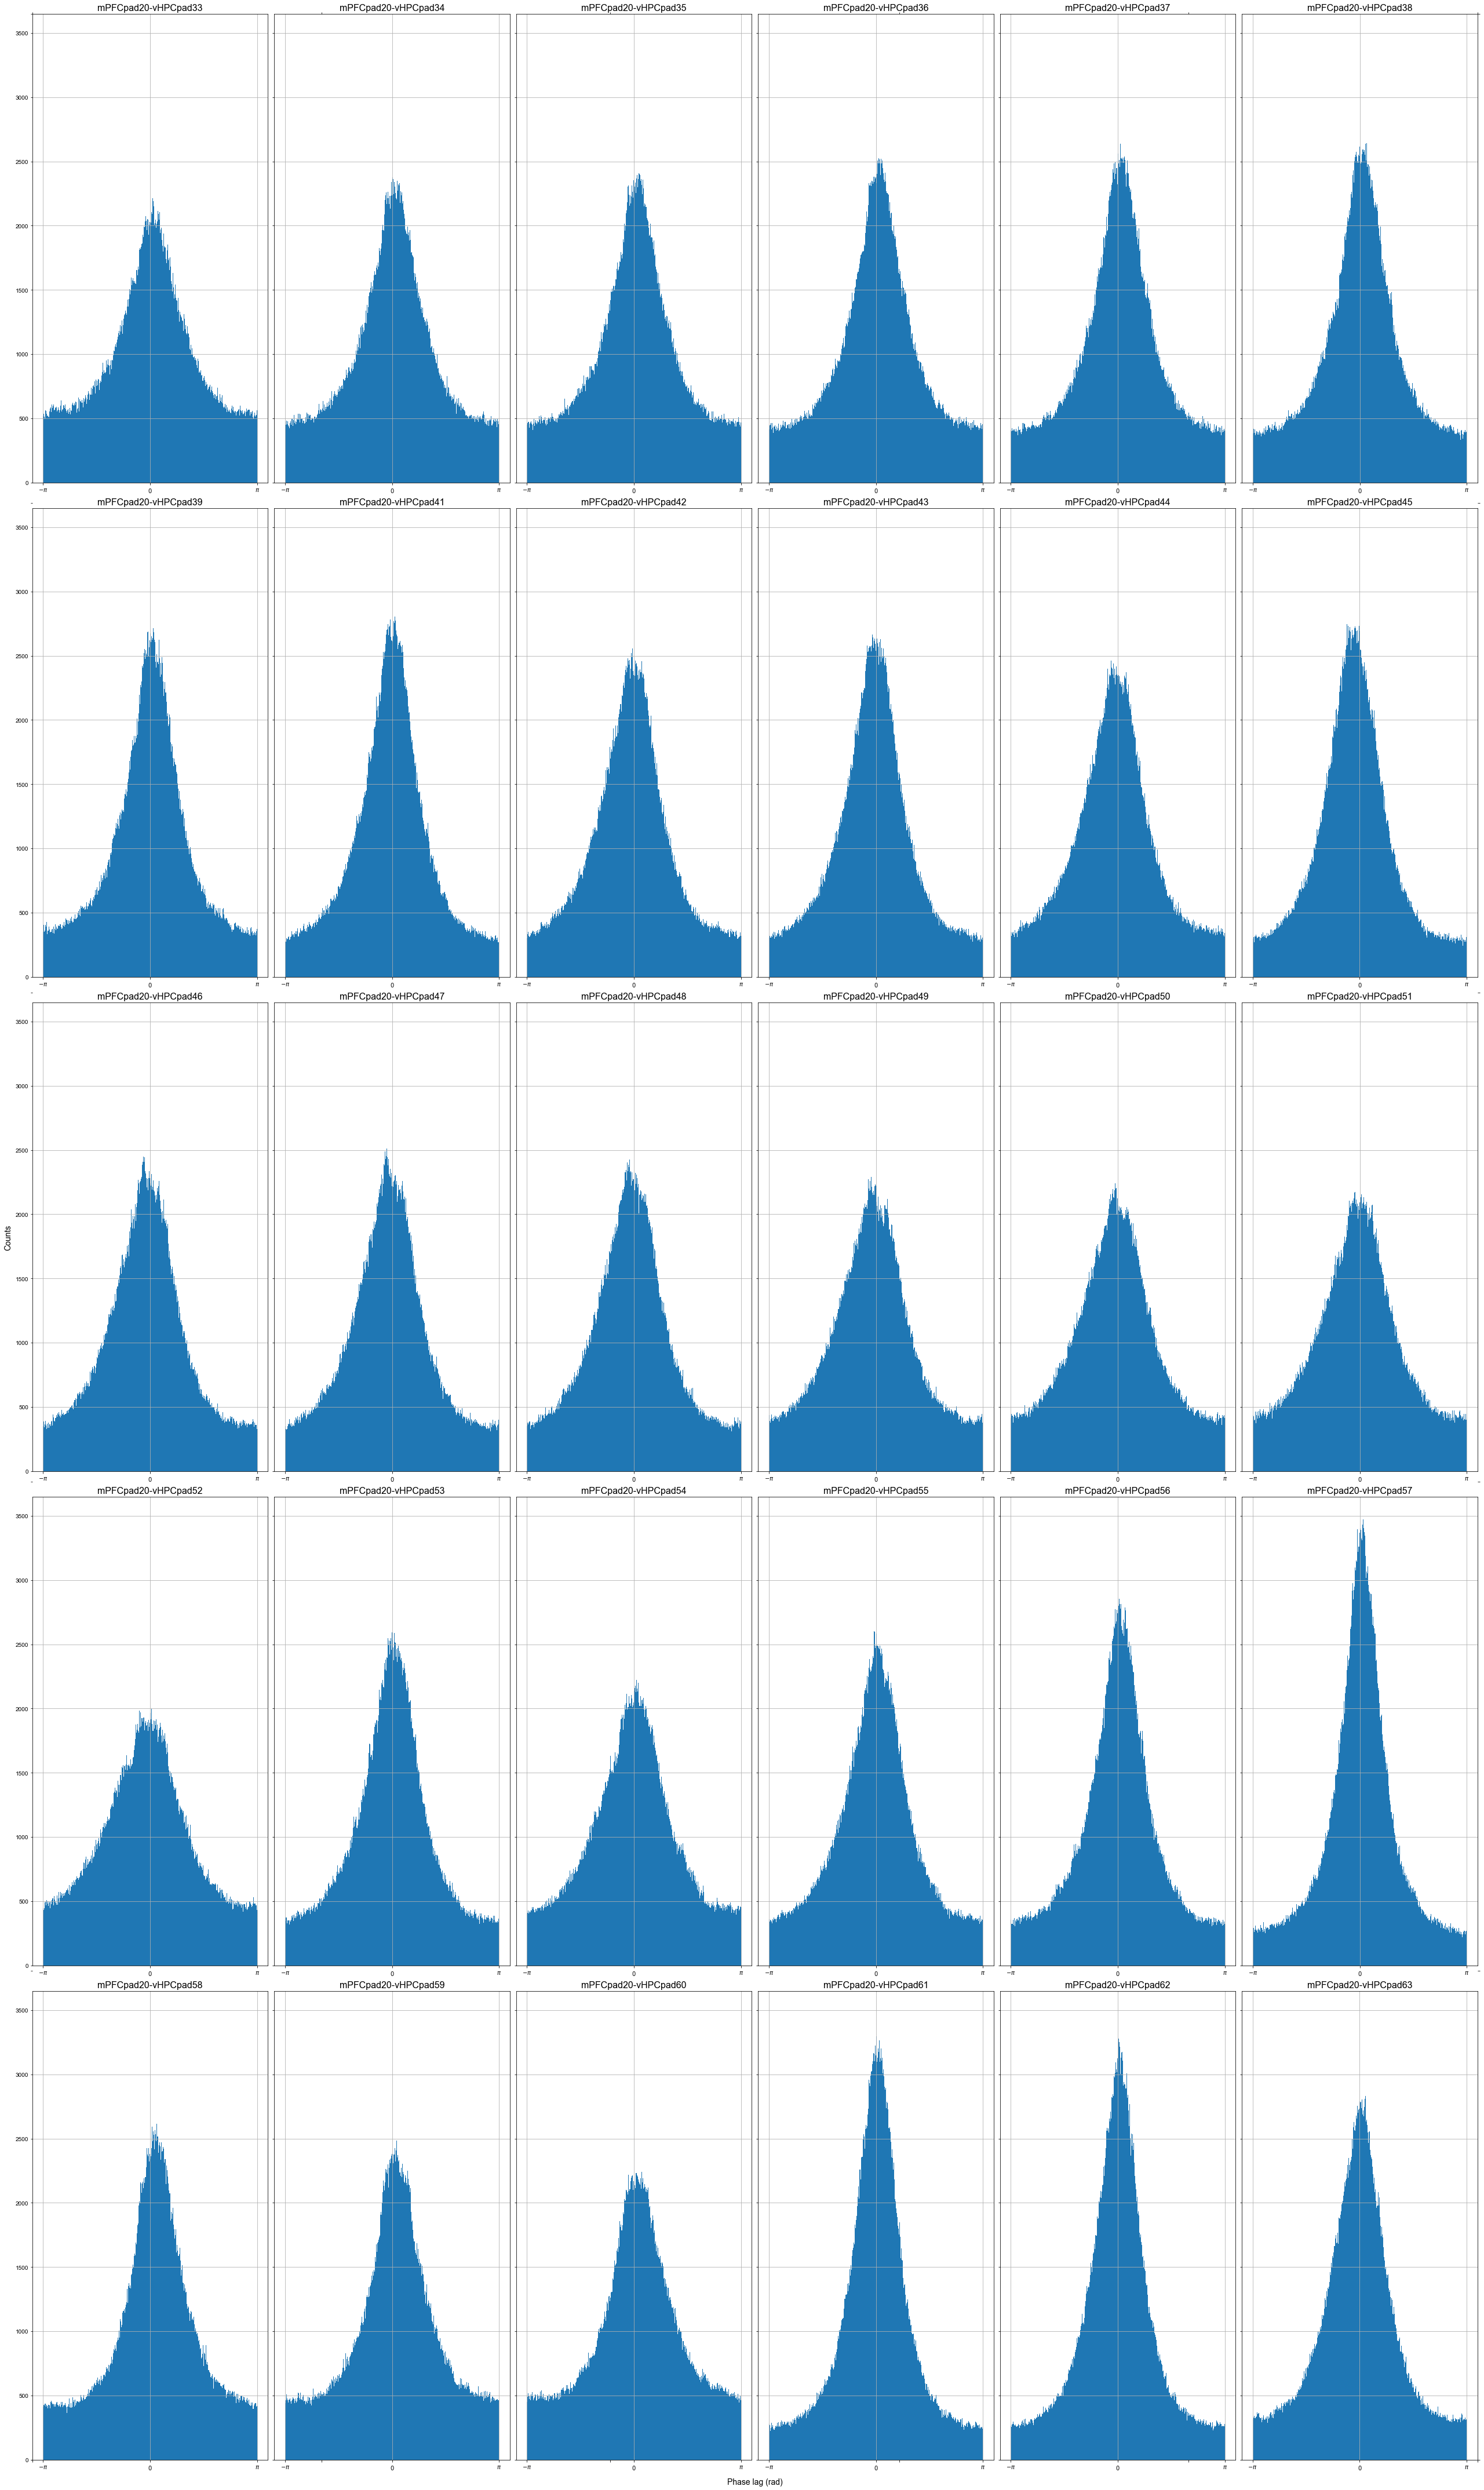

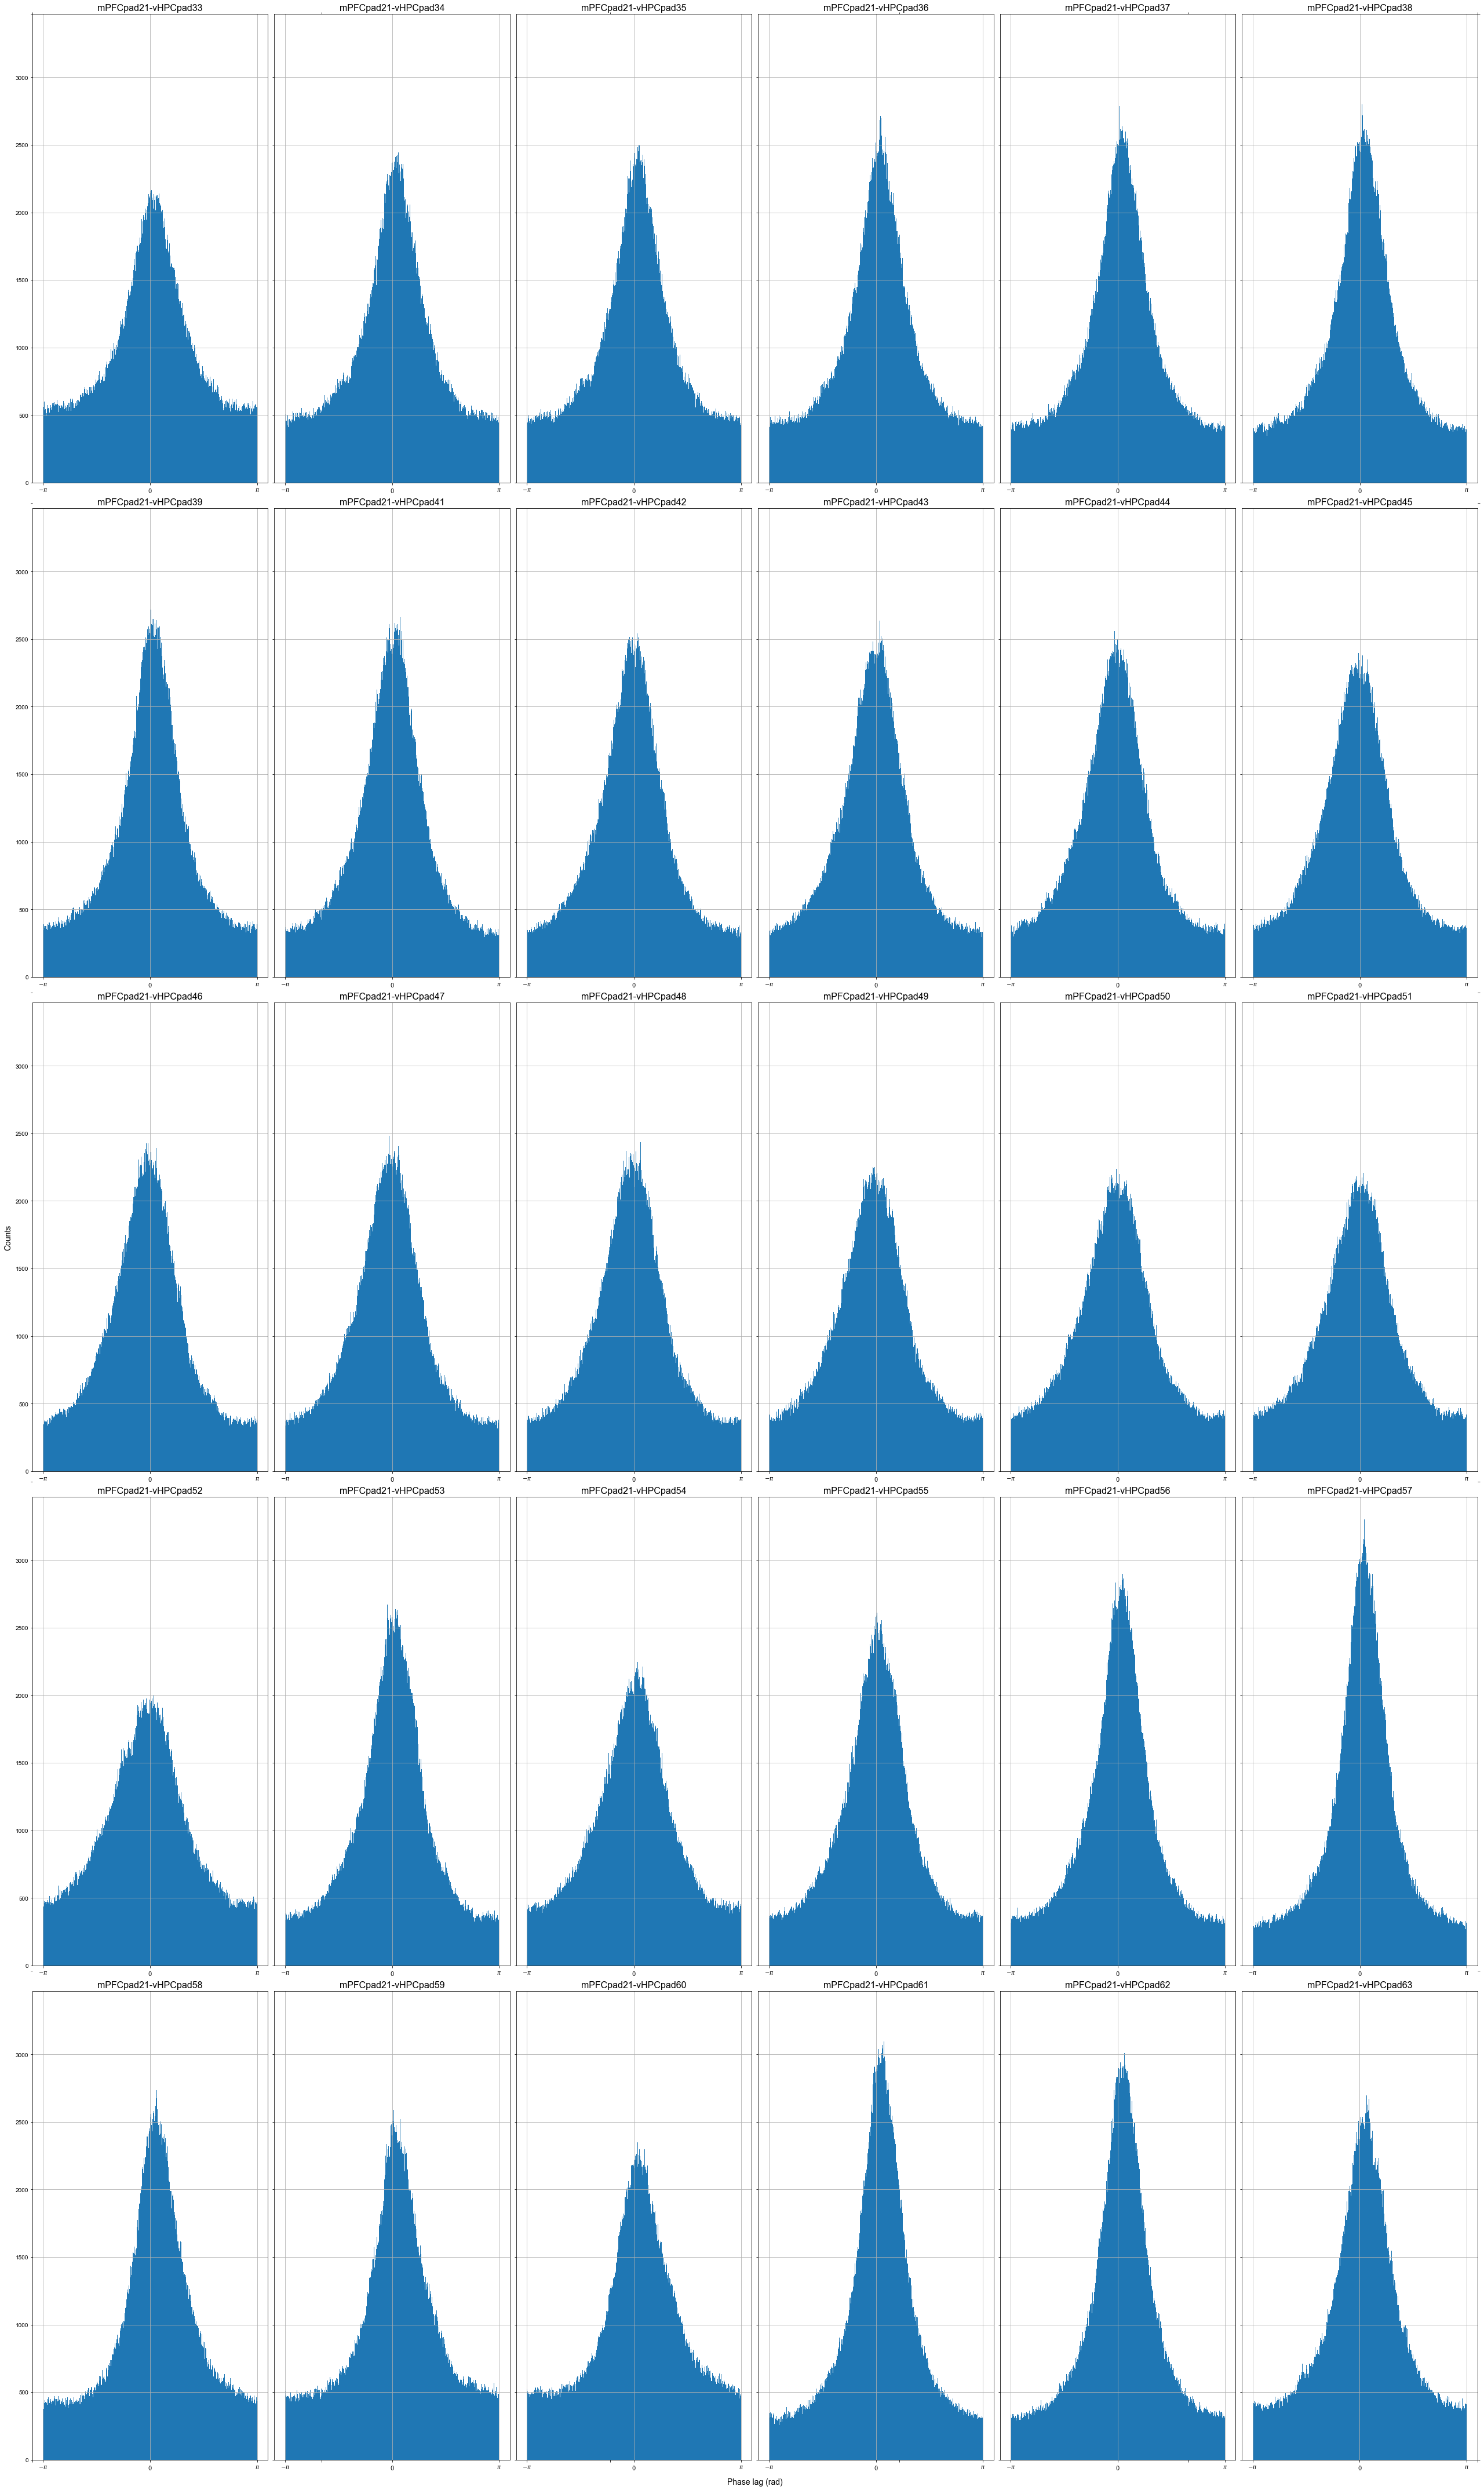

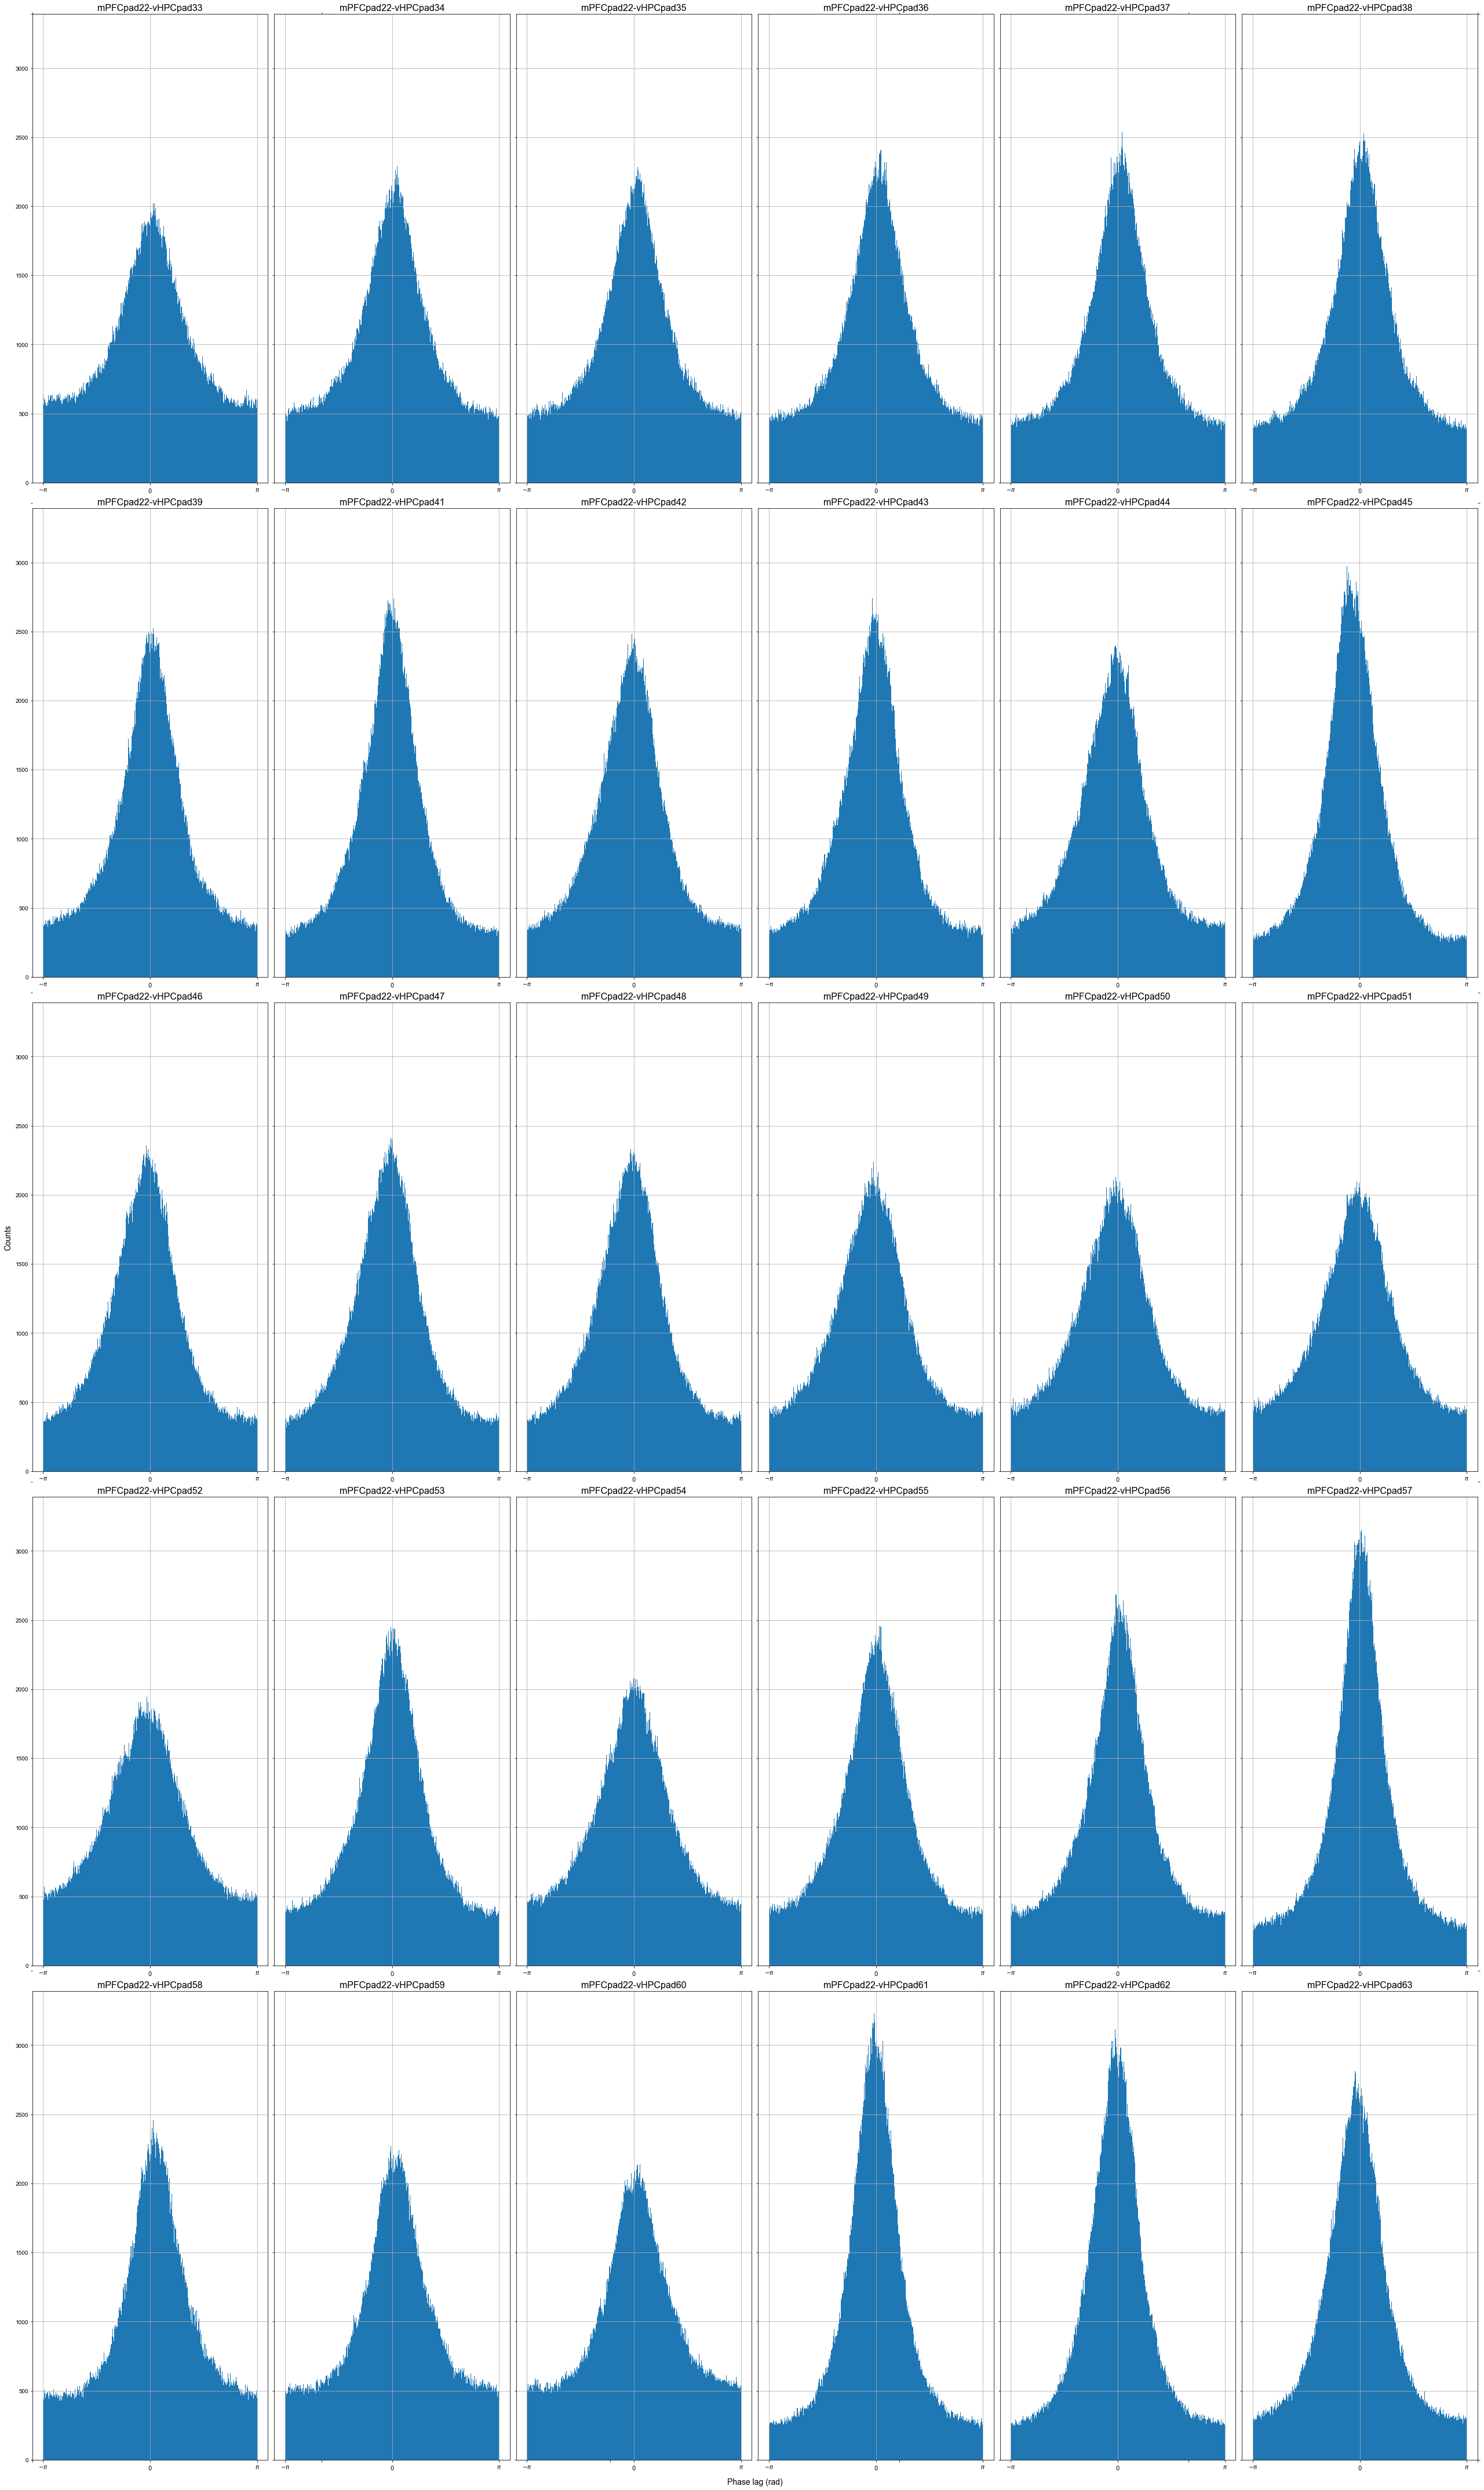

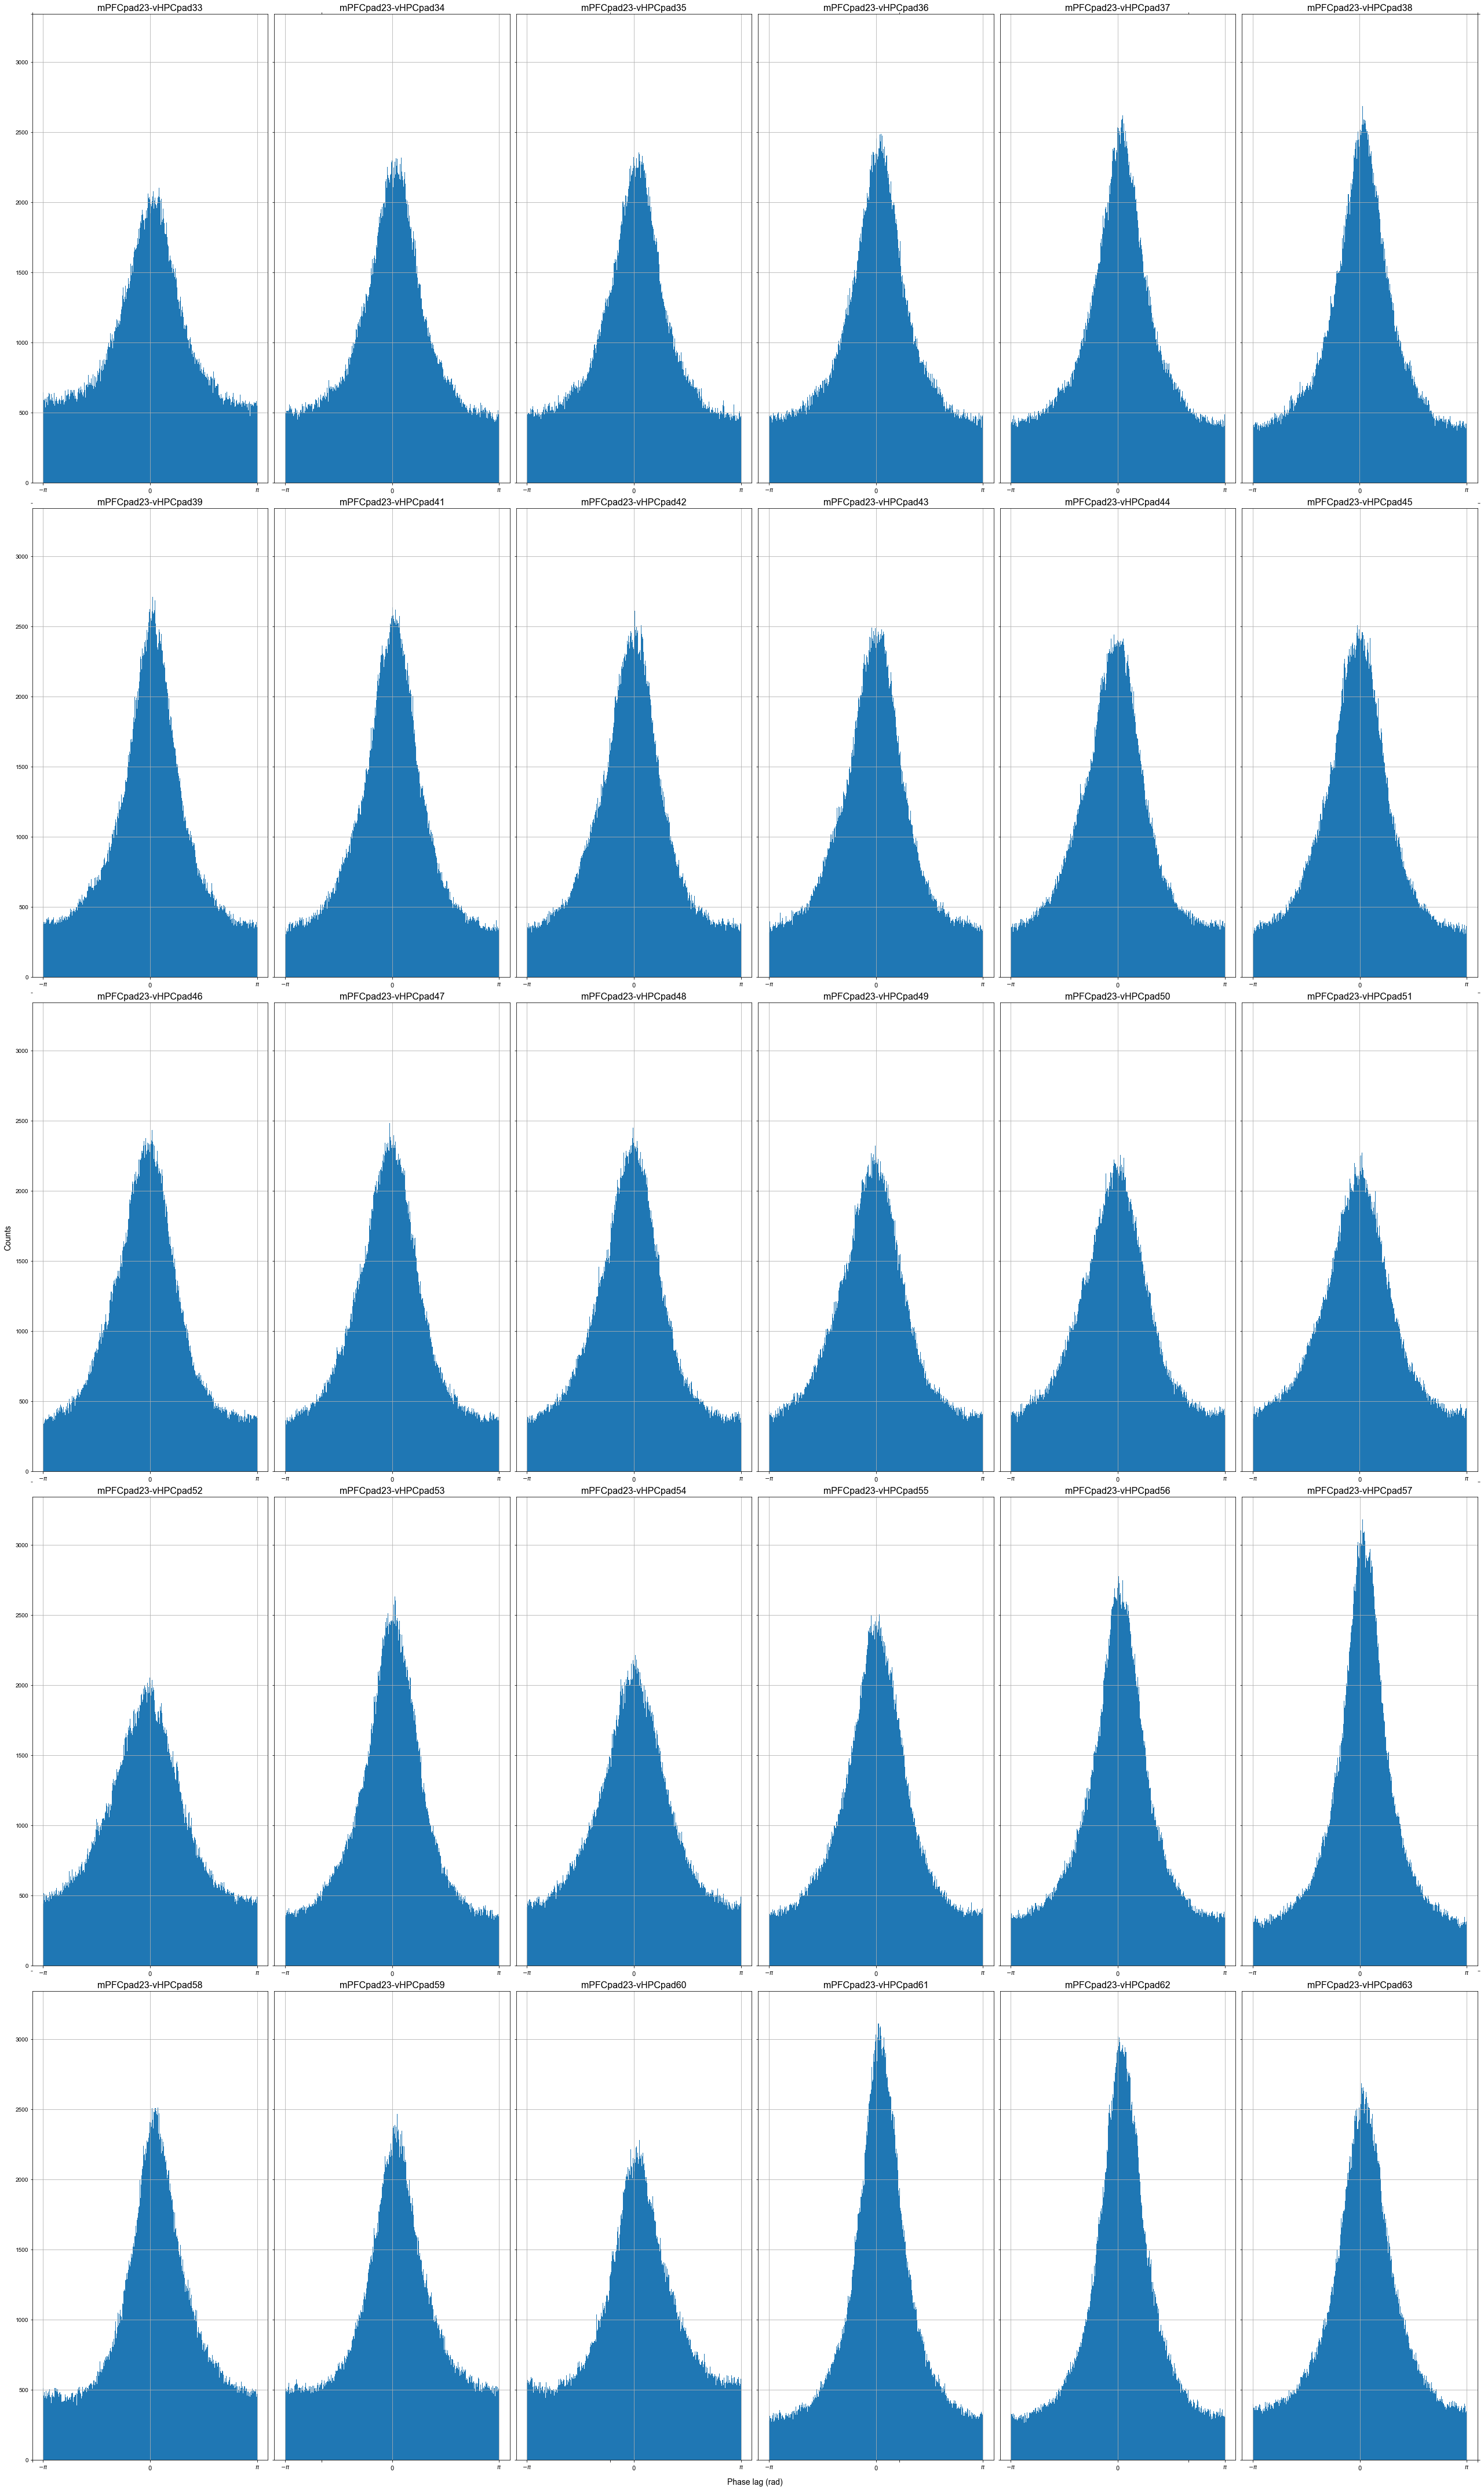

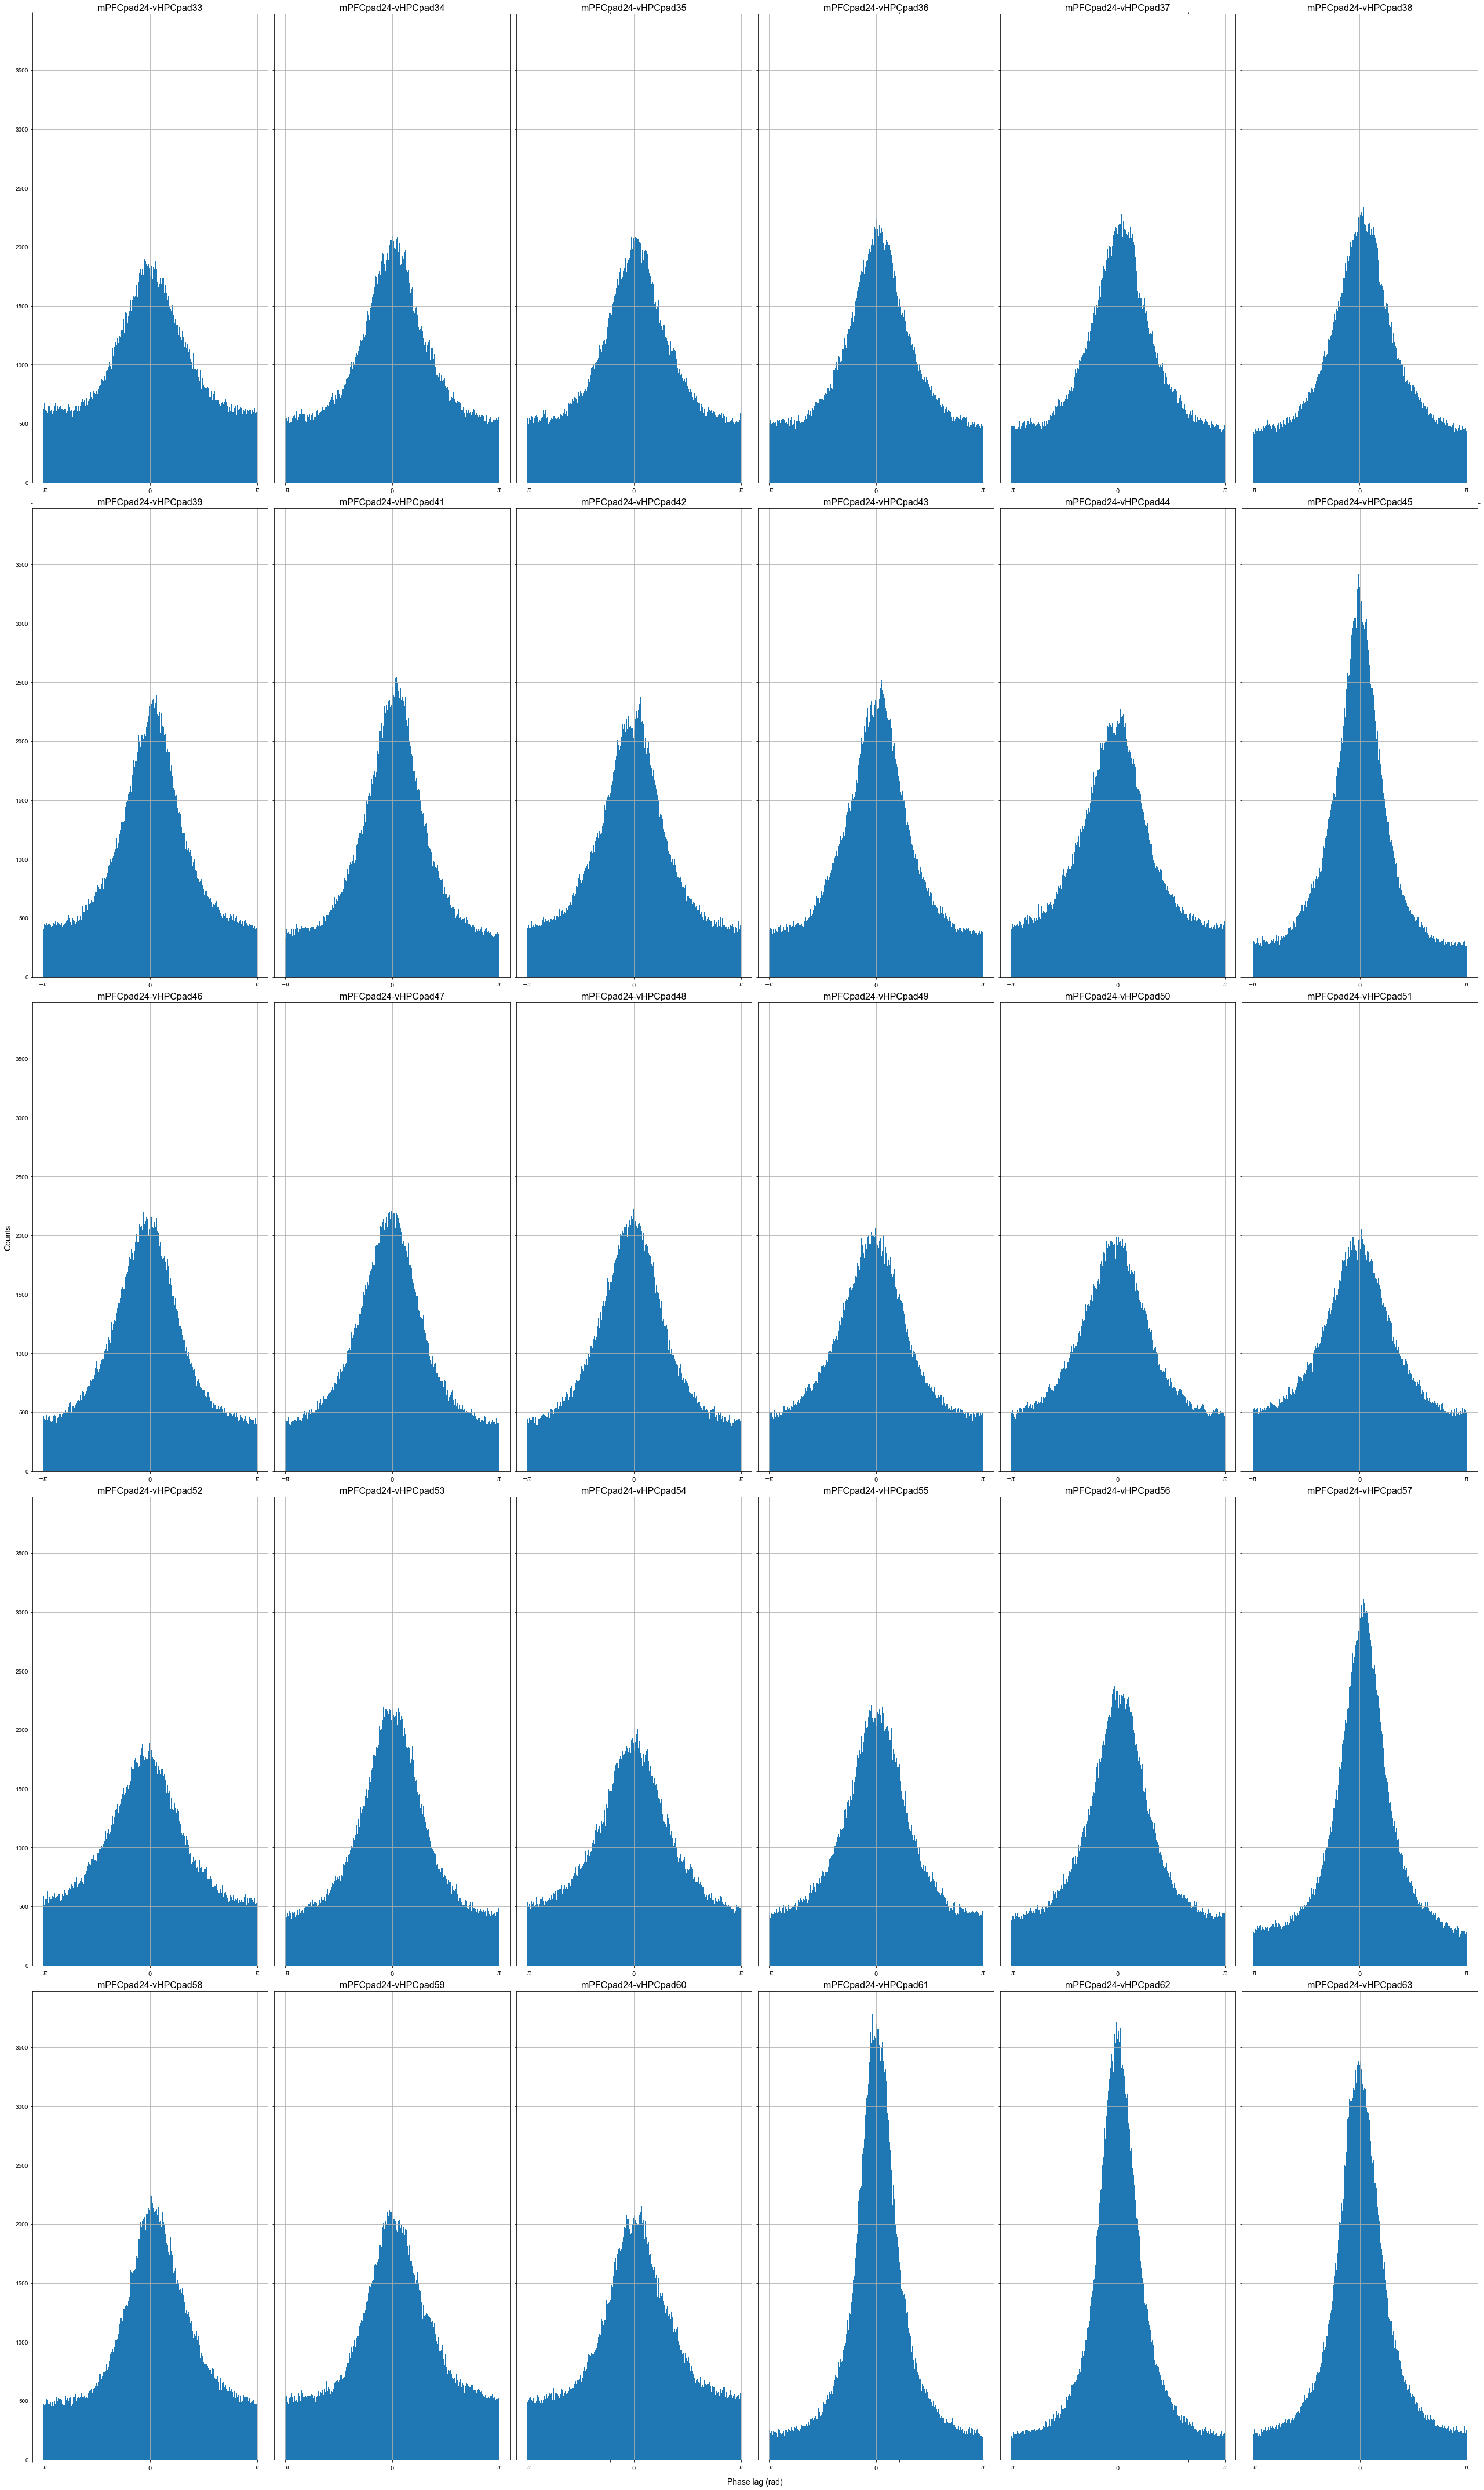

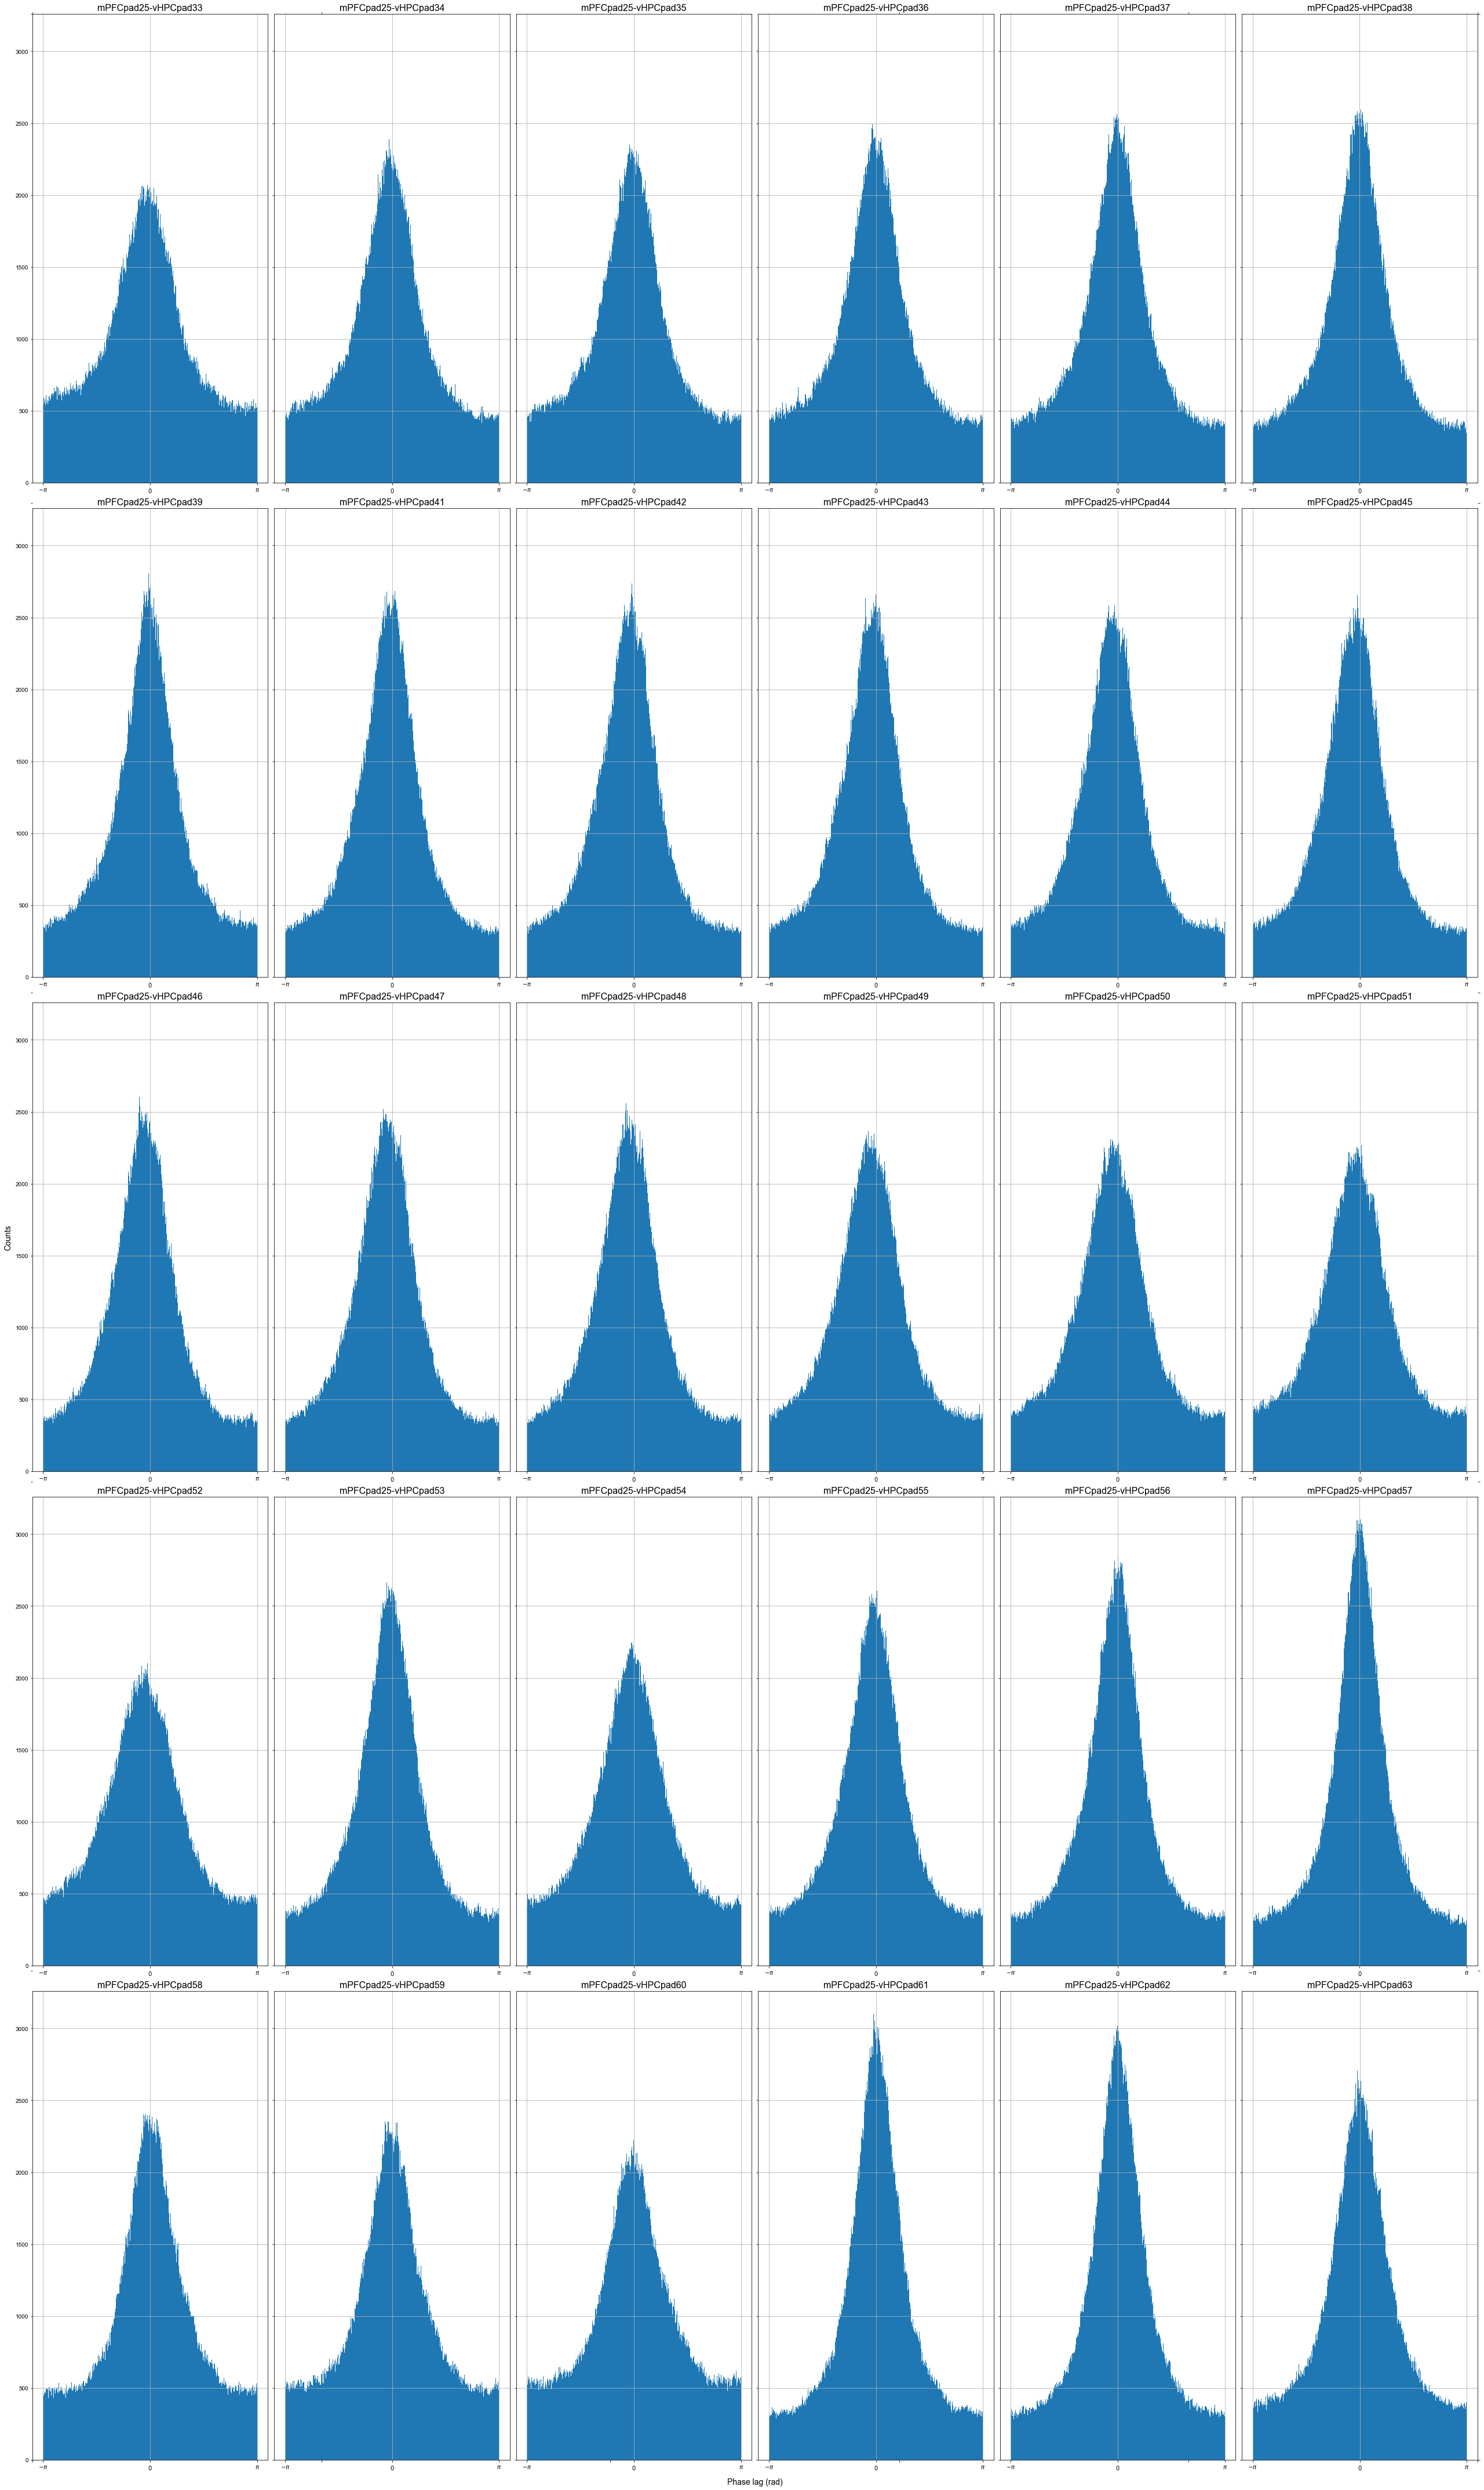

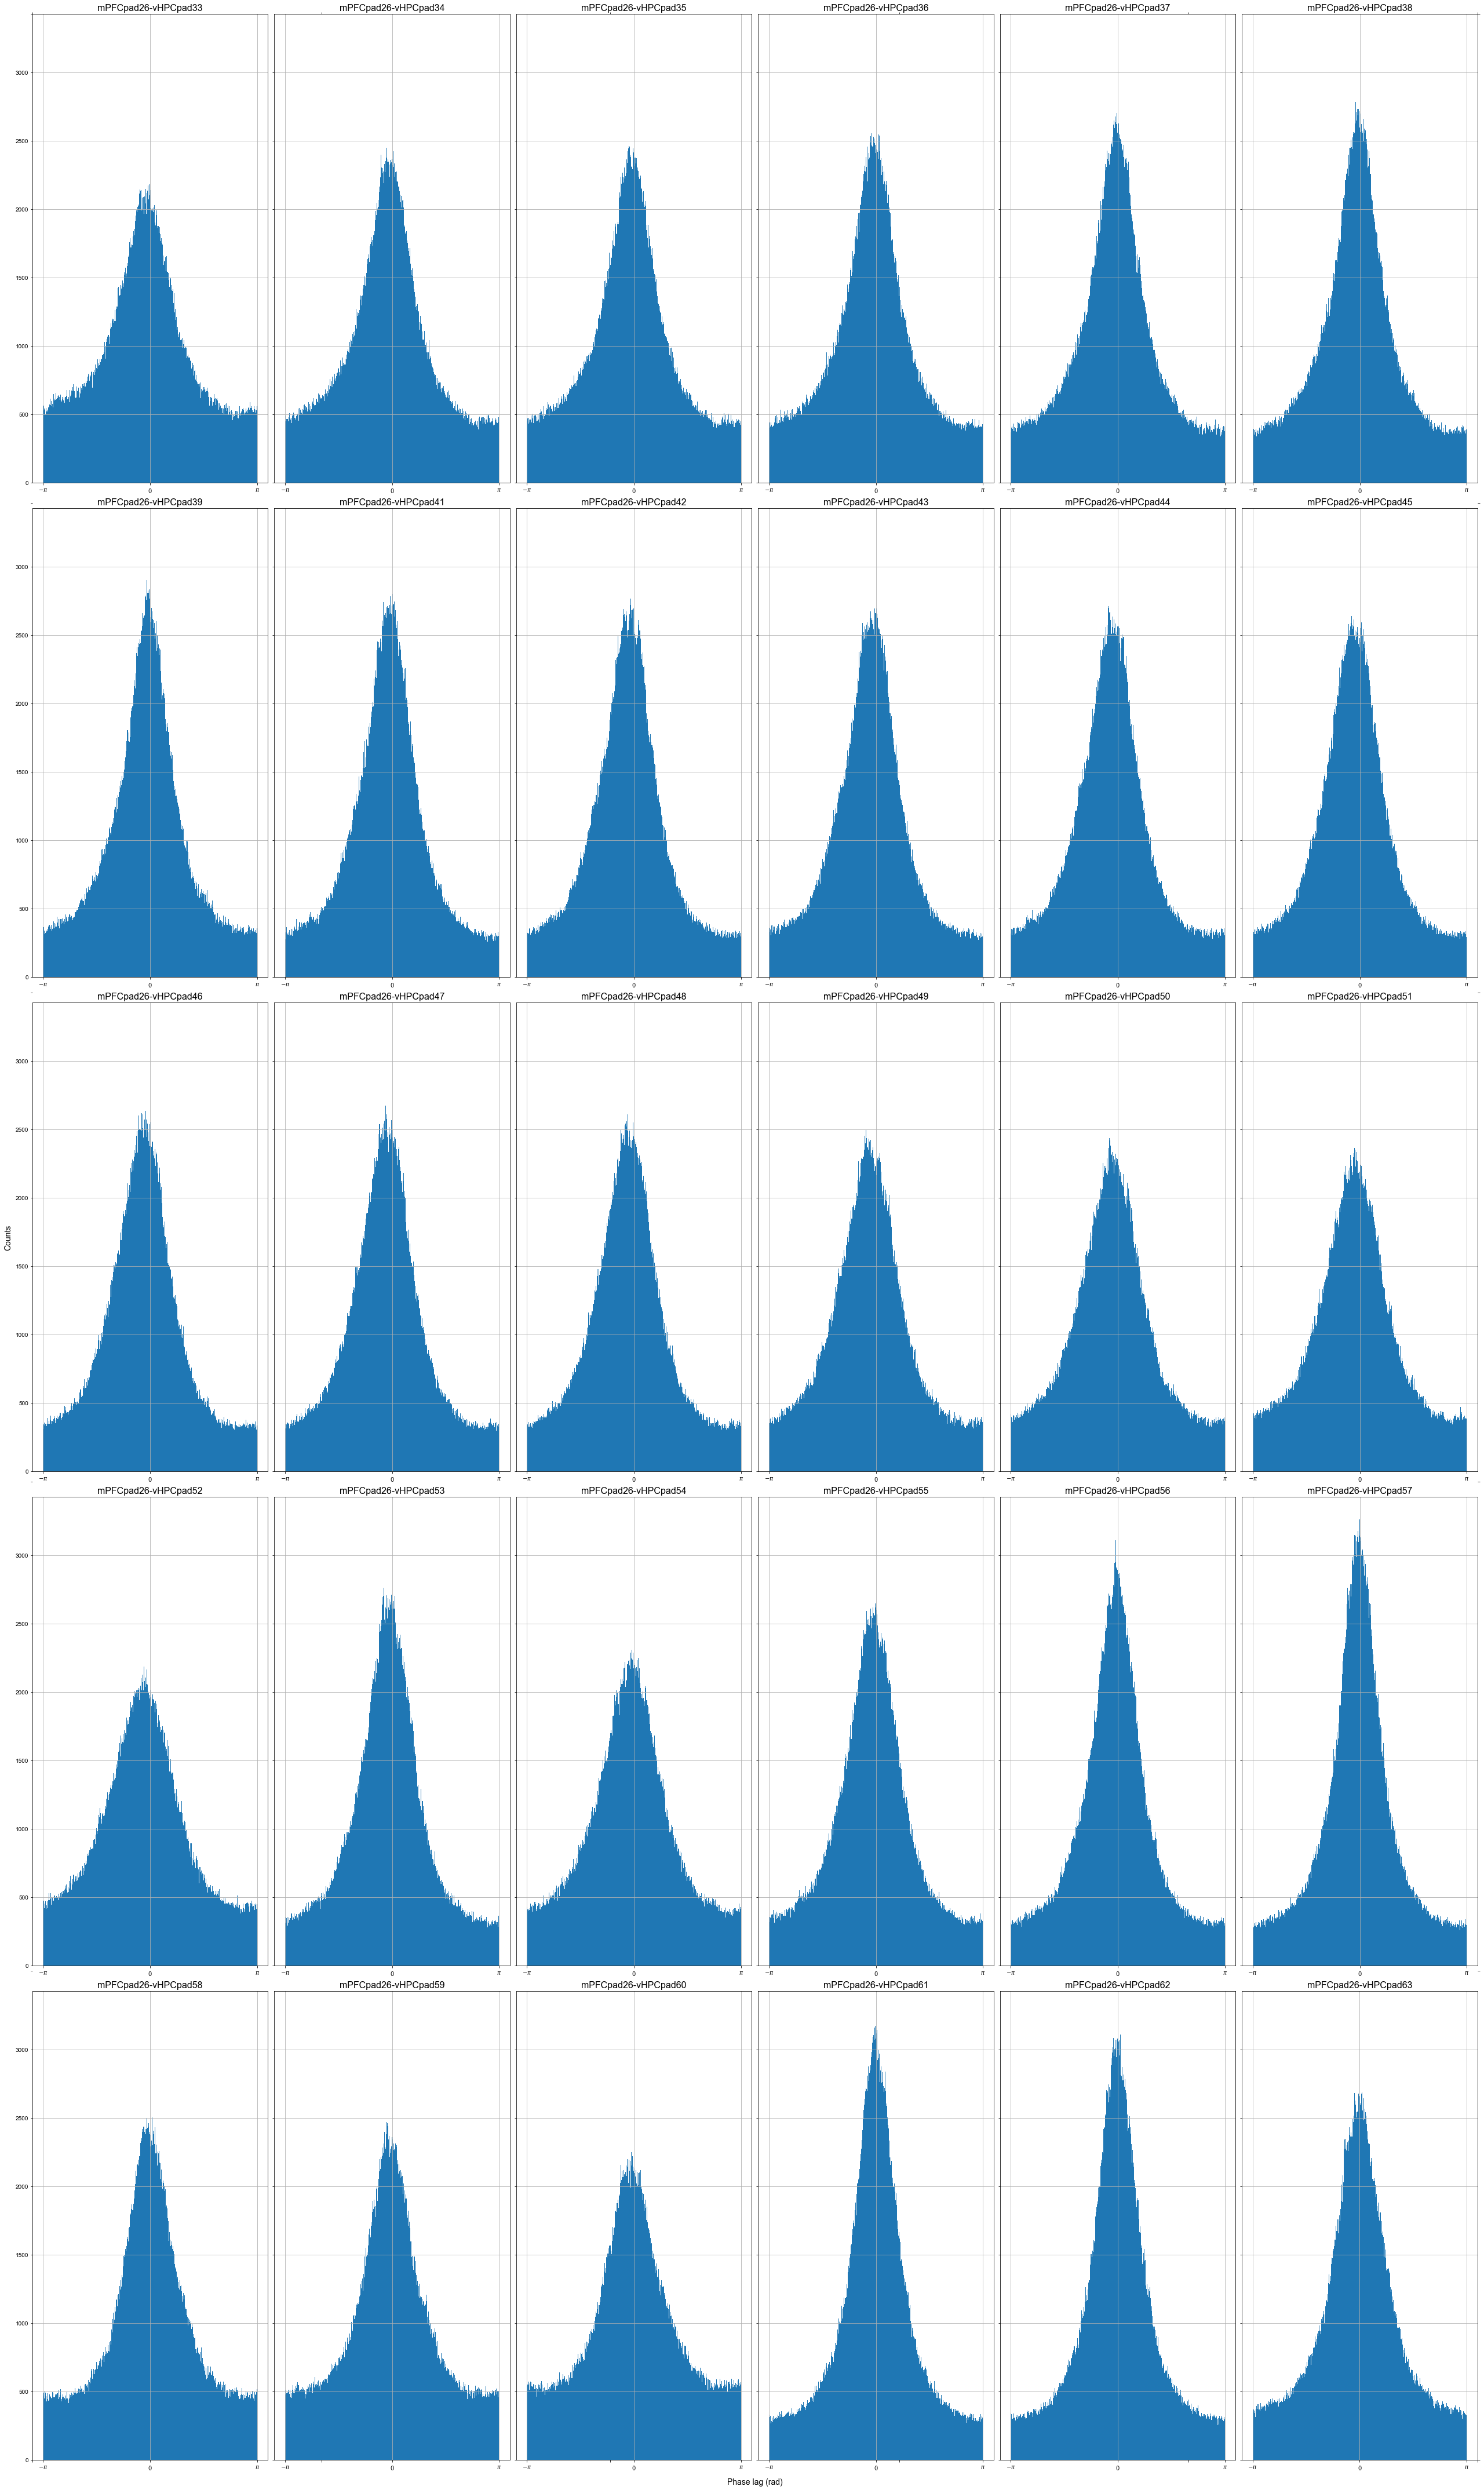

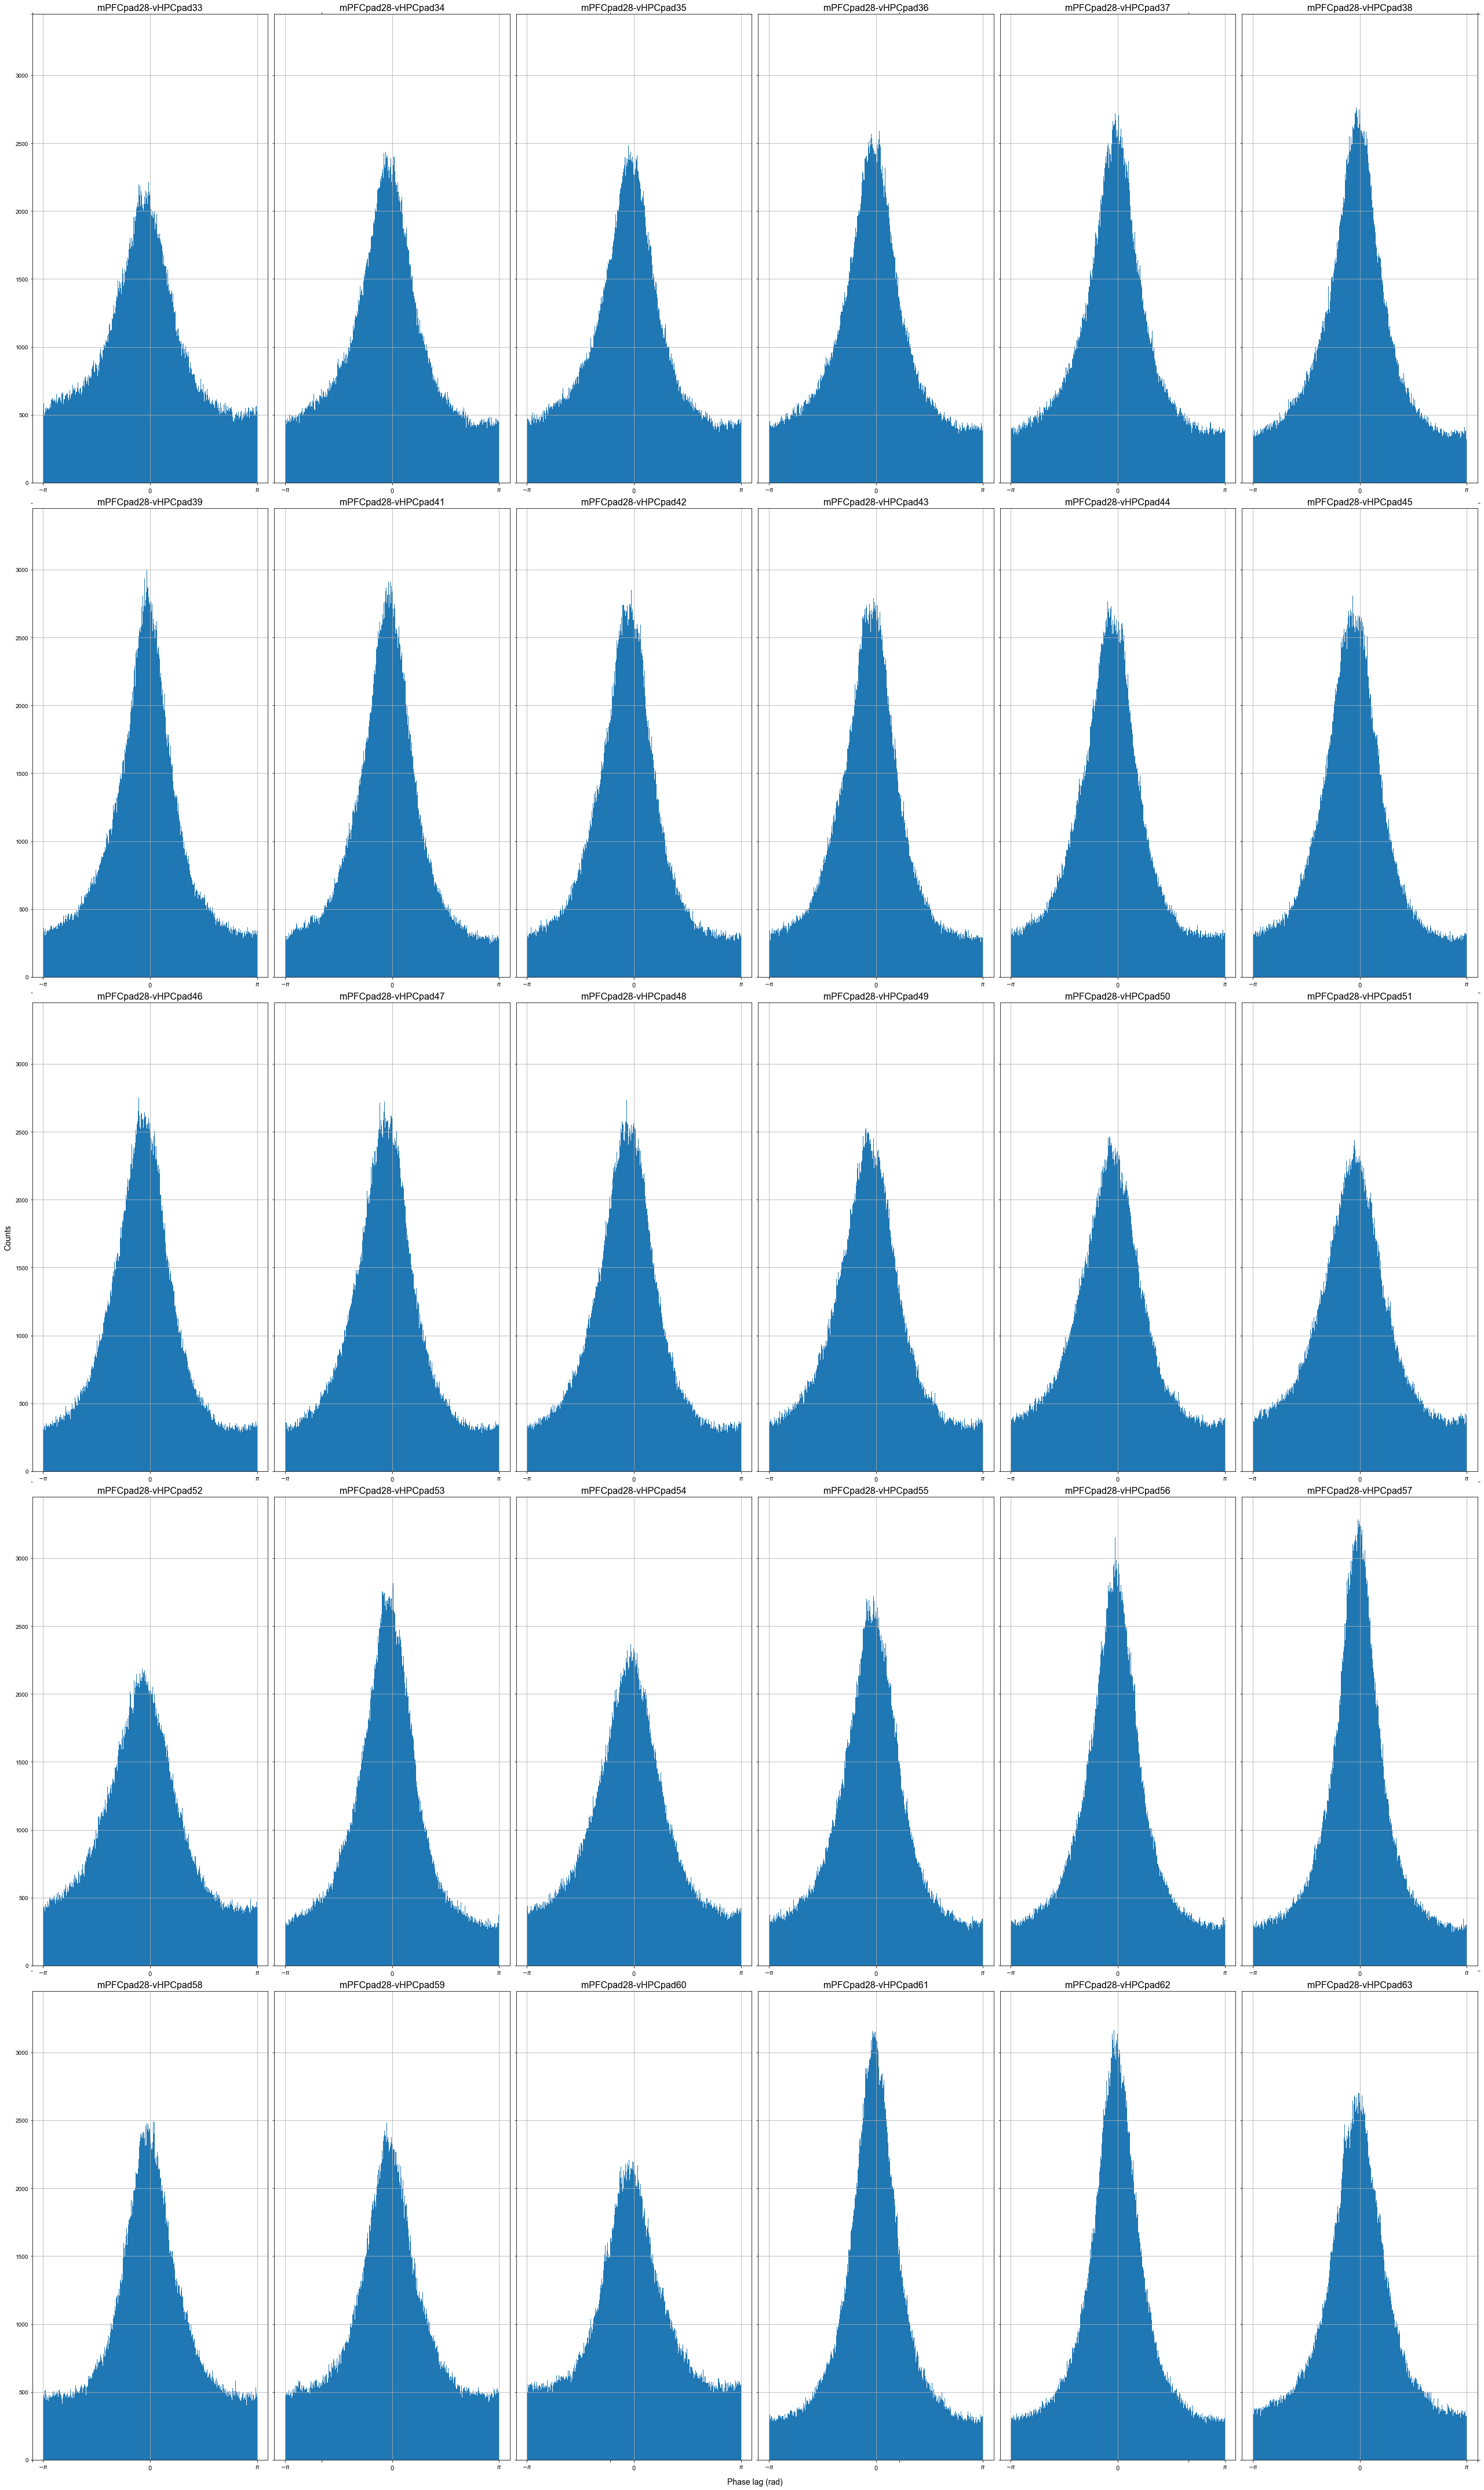

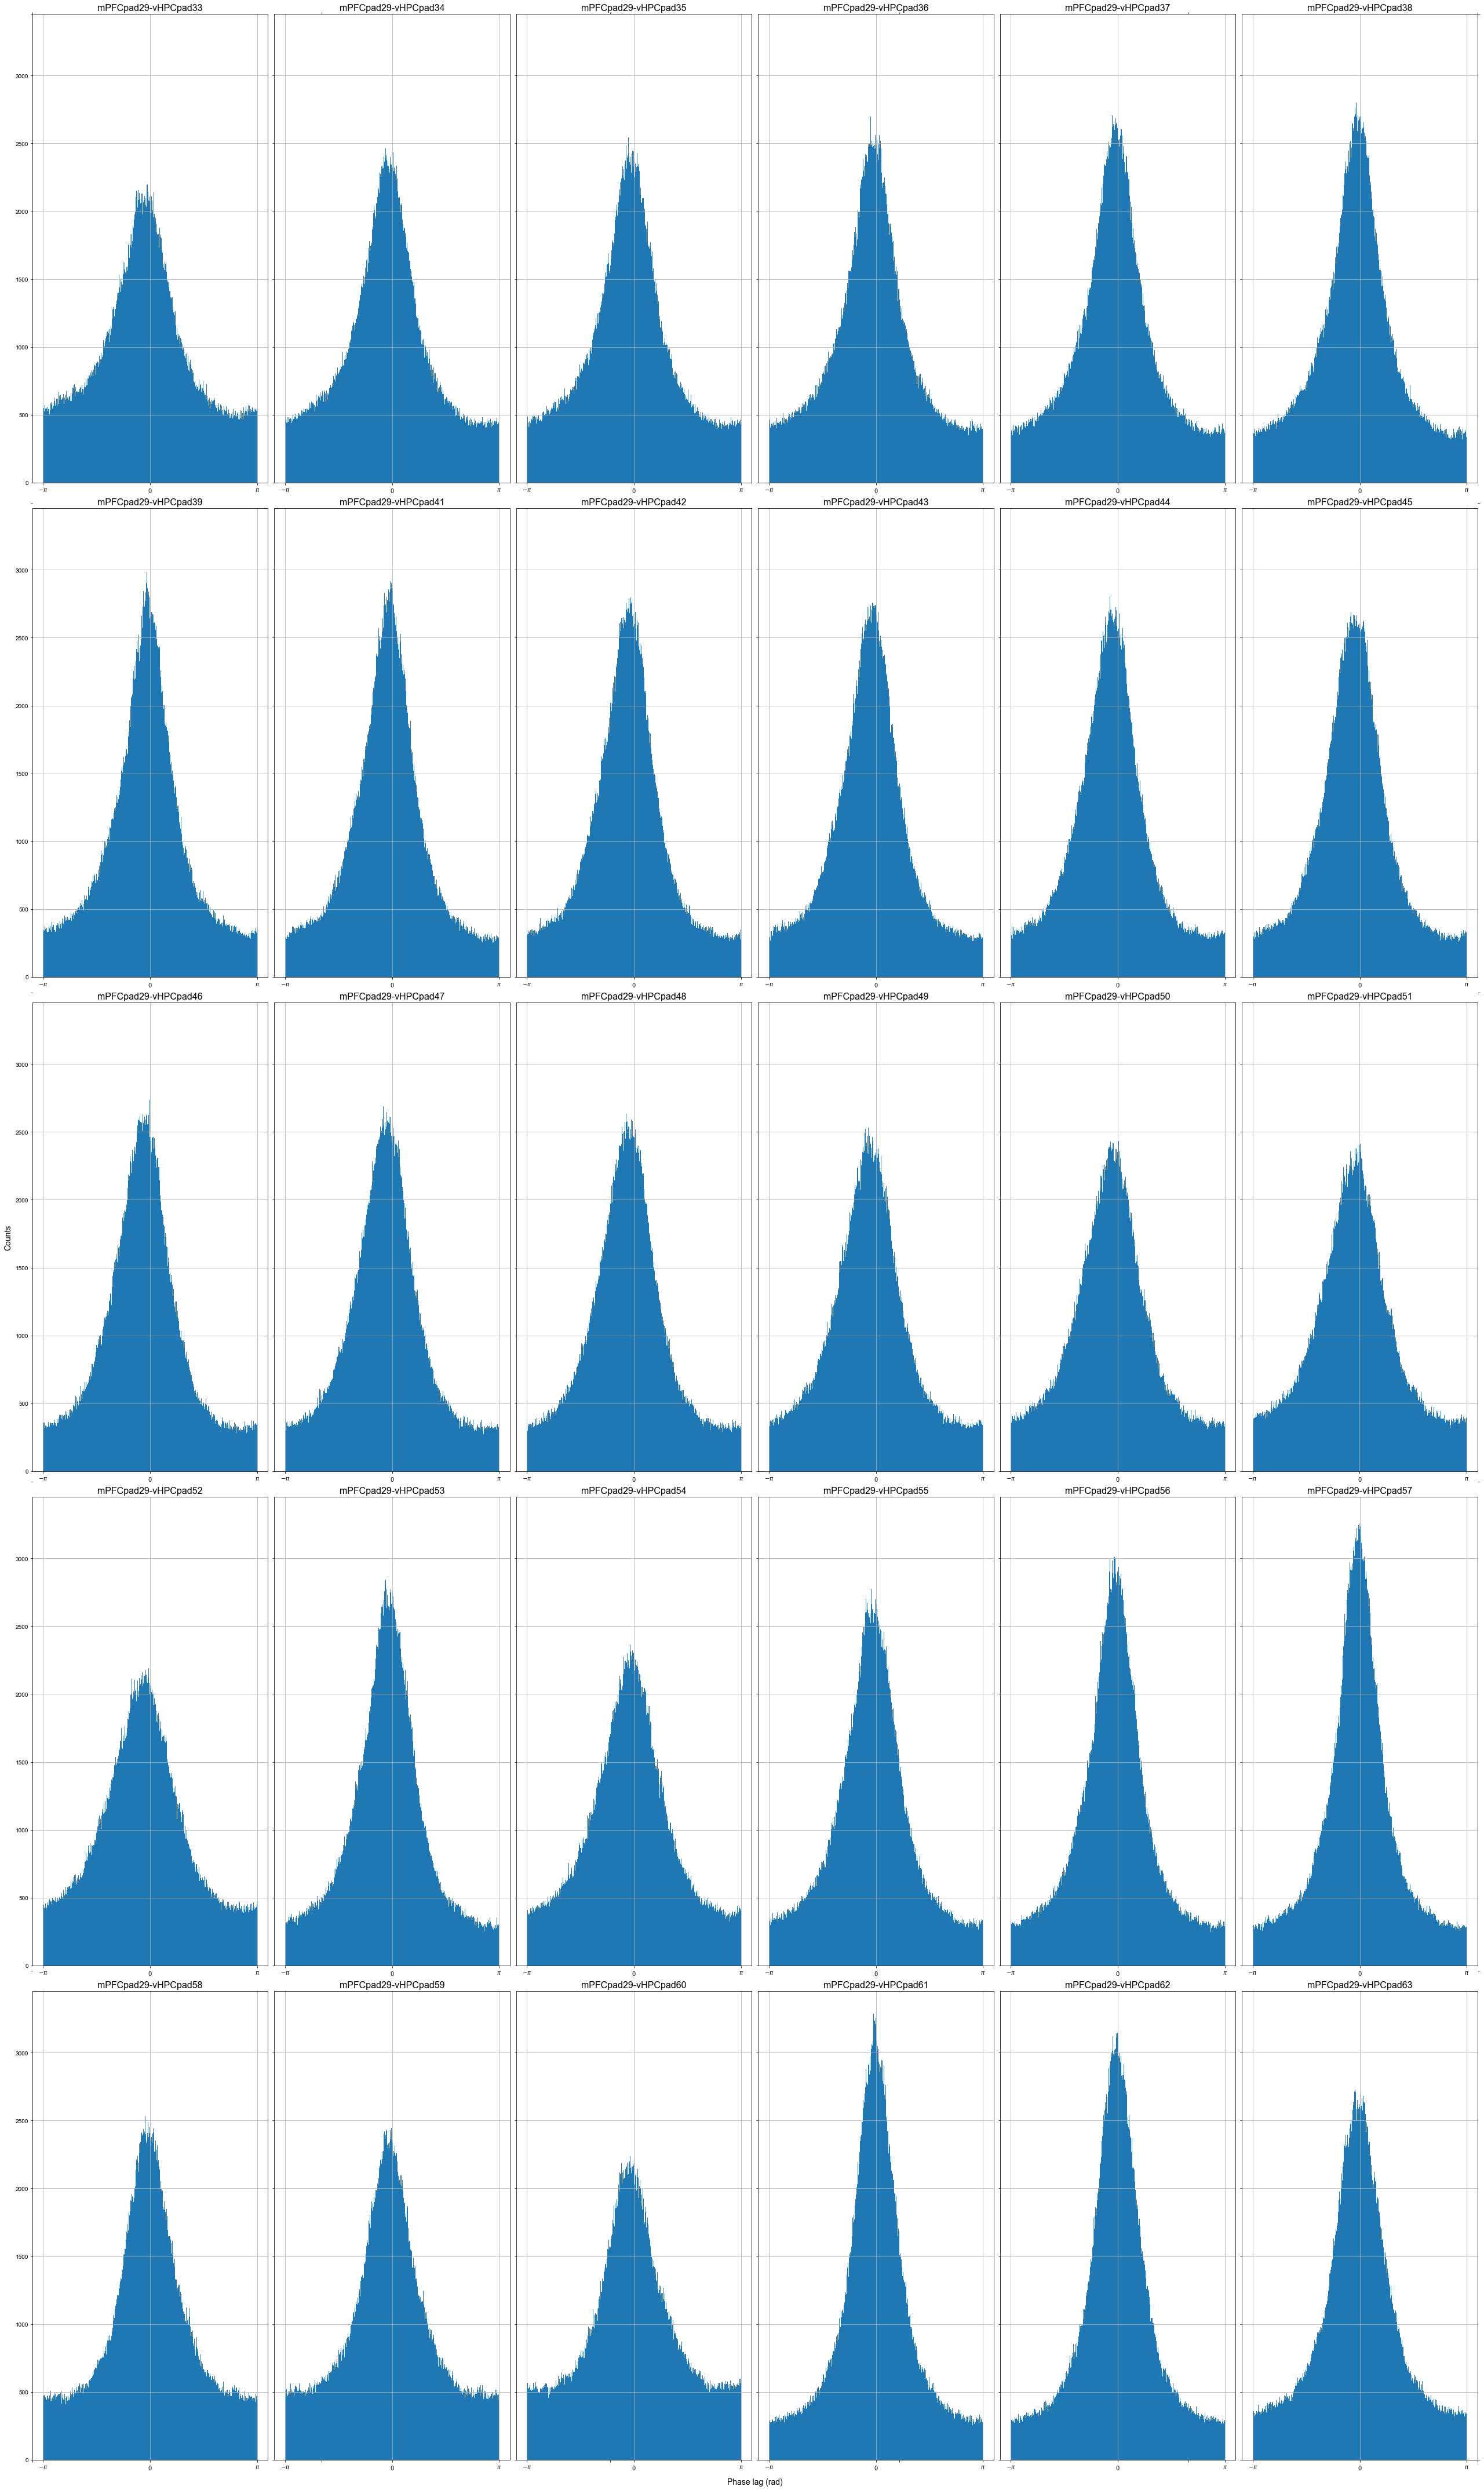

In [6]:
FWHMs = []
for i in range(len(indx_mpfc)):
    FWHM = ephys.plot_phase_coh(dataset, 
                                fname='./phase_coh_plots/'+animal[session]+'_mPFC_'+sorted_pads[indx_mpfc[i]]+'_phasecoh.jpg', 
                                band='theta', mpfc_index=chlist_mpfc.index(sorted_array[indx_mpfc[i]]), srate=f_ephys, 
                                tstart=behavior_trigger, twin=behavior_window_duration)
    FWHMs.append(FWHM)

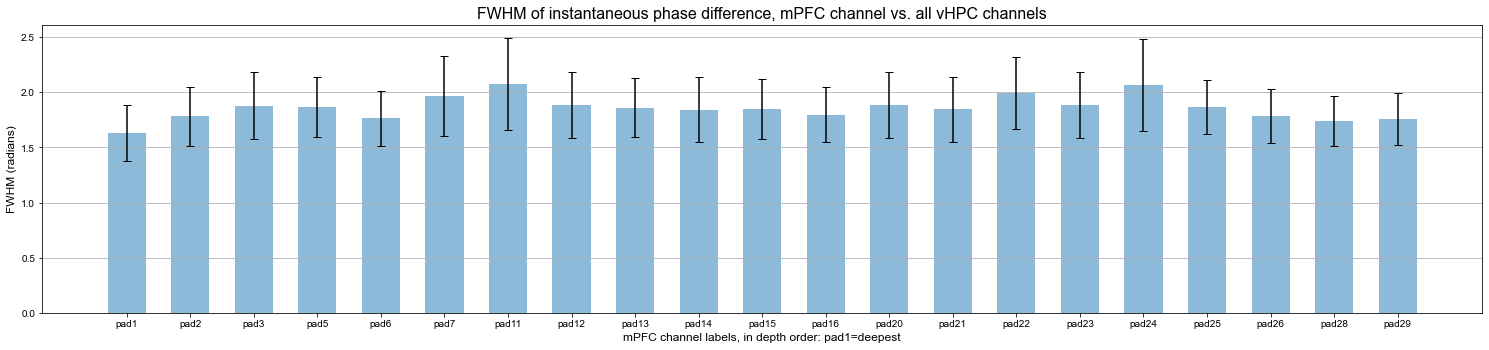

In [7]:
mpfc_ch_labels = [sorted_pads[indx_mpfc[i]] for i in range(len(indx_mpfc))]
vhipp_fwhm_means = [np.mean(FWHMs[i]) for i in range(len(indx_mpfc))]
vhipp_fwhm_stds = [np.std(FWHMs[i]) for i in range(len(indx_mpfc))]


fig = plt.figure(figsize=(20,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(mpfc_ch_labels, vhipp_fwhm_means, width=0.6, yerr=vhipp_fwhm_stds, align='center', alpha=0.5, capsize=4)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.yaxis.grid(True)

plt.title('FWHM of instantaneous phase difference, mPFC channel vs. all vHPC channels', fontsize=16)
plt.ylabel('FWHM (radians)')
plt.xlabel('mPFC channel labels, in depth order: pad1=deepest')
plt.show()